In [1]:
import pandas as pd
import csv
import time 
import pickle
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
from selenium.webdriver import ActionChains
from selenium.webdriver.chrome.options import Options
from metaflow import FlowSpec, IncludeFile, step
import numpy as np
import sys
sys.path.append("/usr/local/lib/python3.9/site-packages")
# I import sys instead of import bs4 
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from time import sleep 
from pandasql import sqldf

pd.set_option('display.max_rows', 10000)

In [2]:
df = pd.read_csv('clean_category.csv')
df = df.drop_duplicates()
df = df.dropna()
df

username  sold_price                   designer  score  \
0              shmoterium        30.0          Nike x Streetwear    5.0   
1      ThreepeatThrifting       165.0                       Nike    5.0   
2          street_weather        89.0          Nike x Streetwear    5.0   
3             Igotsole503       180.0        Jordan Brand x Nike    5.0   
4             usedclothes        51.0              Nike x Stussy    5.0   
...                   ...         ...                        ...    ...   
72205      UNTRUERELIGION        43.0  Calvin Klein x Streetwear    5.0   
72206          Markhamvtg        35.0  Calvin Klein x Streetwear    5.0   
72207        shopluckyboy        40.0  Calvin Klein x Streetwear    5.0   
72208          pottymuoth        24.0               Calvin Klein    5.0   
72209           HypekitCo        80.0      Calvin Klein x Palace    5.0   

       transaction category_1 category_2       category_3  \
0           1393.0    Menwear     Bottom            Short   
1             97.0    Menwear   Footwear  Low Top Sneaker   
2             44.0    Menwear  Outerwear     Light Jacket   
3             49.0    Menwear   Footwear   Hi Top Sneaker   
4           2240.0    Menwear        Top   Short Sleeve T   
...            ...        ...        ...              ...   
72205        283.0    Menwear     Bottom            Denim   
72206         96.0    Menwear     Bottom            Short   
72207        293.0    Menwear     Bottom            Short   
72208        485.0    Menwear  Outerwear     Light Jacket   
72209         11.0    Menwear        Top   Short Sleeve T   

                                             description  \
0      Nike Shorts\nSize L\nConditions not very good\...   
1      Nike Dunk Panda Low Size 10 Good Condtion\nOG ...   
2                   Size L\nCondition 8/10\nNeed washing   
3      Mens size 10 / Has original box\n9/10 conditio...   
4      Brand new with tags\nTagged medium fits oversi...   
...                                                  ...   
72205  In nice worn in condition, accurately represen...   
72206  Vintage Denim Calvin Klein Denim Shorts\nWaist...   
72207  Calvin Klein swim shorts\nWithout defects\nVer...   
72208  Very good color. Only worn a handful of times,...   
72209  Palace x Calvin Klein Logo on Front Chest\nMat...   

                                               sub_title  image_count  \
0                            Vintage Nike Dri Fit Shorts            8   
1              Nike Dunk Panda Low Size 10 Good Condtion            6   
2      NIKE SHOX VINTAGE CENTER LOGO OVERSIZE ANORAK ...            7   
3                        Jordan 6 Electric Green size 10           11   
4               Increase the Peace Tee Nike x Stüssy M/L            7   
...                                                  ...          ...   
72205                   Vintage Calvin Klein Denim Jeans            7   
72206            Vintage Denim Calvin Klein Denim Shorts            4   
72207                     Calvin Klein black swim shorts            6   
72208             Calvin Klein Waterproof Workers Jacket            5   
72209             Palace x Calvin Klein CK1 Grey T-Shirt            4   

                              size         color    condition  feedback_count  
0            Men's / US 34 / EU 50         Green         Used           441.0  
1            Men's / US 10 / EU 43         Black         Used            58.0  
2      Men's / US L / EU 52-54 / 3         White  Gently Used             5.0  
3            Men's / US 10 / EU 43         Black  Gently Used            36.0  
4      Men's / US M / EU 48-50 / 2         White          New           798.0  
...                            ...           ...          ...             ...  
72205        Men's / US 34 / EU 50         Brown         Used            98.0  
72206        Men's / US 34 / EU 50          Blue         Used            27.0  
72207        Men's / US 32 / EU 48         Black  Gently Used    

In [3]:
df['genda'] = df['category_1'].apply(lambda x: 'Men' if "Men" in x else ('Women' if "Women" in x else 'No genda'))
df

username  sold_price                   designer  score  \
0              shmoterium        30.0          Nike x Streetwear    5.0   
1      ThreepeatThrifting       165.0                       Nike    5.0   
2          street_weather        89.0          Nike x Streetwear    5.0   
3             Igotsole503       180.0        Jordan Brand x Nike    5.0   
4             usedclothes        51.0              Nike x Stussy    5.0   
...                   ...         ...                        ...    ...   
72205      UNTRUERELIGION        43.0  Calvin Klein x Streetwear    5.0   
72206          Markhamvtg        35.0  Calvin Klein x Streetwear    5.0   
72207        shopluckyboy        40.0  Calvin Klein x Streetwear    5.0   
72208          pottymuoth        24.0               Calvin Klein    5.0   
72209           HypekitCo        80.0      Calvin Klein x Palace    5.0   

       transaction category_1 category_2       category_3  \
0           1393.0    Menwear     Bottom            Short   
1             97.0    Menwear   Footwear  Low Top Sneaker   
2             44.0    Menwear  Outerwear     Light Jacket   
3             49.0    Menwear   Footwear   Hi Top Sneaker   
4           2240.0    Menwear        Top   Short Sleeve T   
...            ...        ...        ...              ...   
72205        283.0    Menwear     Bottom            Denim   
72206         96.0    Menwear     Bottom            Short   
72207        293.0    Menwear     Bottom            Short   
72208        485.0    Menwear  Outerwear     Light Jacket   
72209         11.0    Menwear        Top   Short Sleeve T   

                                             description  \
0      Nike Shorts\nSize L\nConditions not very good\...   
1      Nike Dunk Panda Low Size 10 Good Condtion\nOG ...   
2                   Size L\nCondition 8/10\nNeed washing   
3      Mens size 10 / Has original box\n9/10 conditio...   
4      Brand new with tags\nTagged medium fits oversi...   
...                                                  ...   
72205  In nice worn in condition, accurately represen...   
72206  Vintage Denim Calvin Klein Denim Shorts\nWaist...   
72207  Calvin Klein swim shorts\nWithout defects\nVer...   
72208  Very good color. Only worn a handful of times,...   
72209  Palace x Calvin Klein Logo on Front Chest\nMat...   

                                               sub_title  image_count  \
0                            Vintage Nike Dri Fit Shorts            8   
1              Nike Dunk Panda Low Size 10 Good Condtion            6   
2      NIKE SHOX VINTAGE CENTER LOGO OVERSIZE ANORAK ...            7   
3                        Jordan 6 Electric Green size 10           11   
4               Increase the Peace Tee Nike x Stüssy M/L            7   
...                                                  ...          ...   
72205                   Vintage Calvin Klein Denim Jeans            7   
72206            Vintage Denim Calvin Klein Denim Shorts            4   
72207                     Calvin Klein black swim shorts            6   
72208             Calvin Klein Waterproof Workers Jacket            5   
72209             Palace x Calvin Klein CK1 Grey T-Shirt            4   

                              size         color    condition  feedback_count  \
0            Men's / US 34 / EU 50         Green         Used           441.0   
1            Men's / US 10 / EU 43         Black         Used            58.0   
2      Men's / US L / EU 52-54 / 3         White  Gently Used             5.0   
3            Men's / US 10 / EU 43         Black  Gently Used            36.0   
4      Men's / US M / EU 48-50 / 2         White          New           798.0   
...                            ...           ...          ...             ...   
72205        Men's / US 34 / EU 50         Brown         Used            98.0   
72206        Men's / US 34 / EU 50          Blue         Used            27.0   
72207        Men's / US 32 / EU 48         Black  Gently

In [4]:
df['color'].replace(['Black', 'Blk', 'Dark gray', 'Leopard white black', 'Blacl', 'Deep black', 'Black colorblock','Puma black','Blackwatch','Graphite black','White/ black','Violet/black','Heather black','Black/dark mocha-university red-sail','Anthracite black','Coated black','Black polka dot','Black patent','Black/phantom-ale','Black / black','Black / in photo','Black glow in the dark','Ivory black','Black white stripes','Violet lilla black white','Black and plaid','Black sail pinstripe','Cloud cream black','Black sail','Asphalt/ outer space/ black','Black/mirror','Black / milk / milk','Black gun metal','Washed out black', 'Black & white', 'Anthracite / black','Black and ivory','Black/egret','Black and white/cream','Ash black','Black /white','Stone washed black','Transparent black', 'Light black','Waxed black','Black/leopard','Glossy black','Black/black-cone-white','Black skulls','Black reflective','Black jeans','Black gucci signature leather','Black and white diagonal cross','Black/washed','Canvas/black','Black white racing jacket','Grime black','Midstone black','Black cotton', 'All black','Black waxed','Black/bone','Dirty light black','Overdye jet black','Ec black','Sequoia black','Wash black denim','White-black','Triple black','Black violet white','Faded black distressed','Speed graffiti black','Black grey white','Black dye','Black-white','Black /','Ainara/black','Black reversible','Tnf black / tnf black','White/black/white','Almost black/white','Black/sail','Black sugar','Sulphur black','Utility black','Black/whit','Black / metallic copper','Deep black','Black polkadot','Black stripes','Black & true white','Black white acetate','Black paisley','Black colorblock', 'Leopard black wood','Black/black', 'Black and milk','Black wool','Black/egret/black','Fading black','Black/polished black','Black stripe','Black/ white','Black rusty waxed','Faded black wash','Black / printed','Black/white suede','Black with floral jacquard','Dark used black','Black white sleeve','Black on black','Black jean','Black&white','Black bleach','Black mineral','Egret/egret/black','Black/3m','Tnf black','Leopard white black','Smoked black','Black (no.15)','Cream/black/white','Black paint splatter','Black / gum','Black vintage wash denim','Black w/translucent rubber sole','Black white and chalk','Black monogram','Sunfaded black','Faded black (as on photo)','Lily white/egret/black','Black metallic', 'Black milk','Black and cream','Destroy black','Vintage wash black','Black python','Black strip','Sun faded black','Double black','Black/canvas','Stressed black and white','Faded black denim','Black white acetate', 'Black/polished black', 'Triple black', 'Faded black', 'Black stripe', 'Heather black', 'Zebra', 'Washed black', 'Blac', 'Black / white', 'Black white', 'Black wash', 'Black/white', 'White/black', 'Black and white', 'White black', 'Black wax', 'Dark', 'Color block', 'Black/cream', 'Vintage black', 'Black multi', 'White / black', 'Black multicolor', 'Faded black', 'Black/white', 'Black white', 'Washed black', 'White/black', 'Black and white', 'Black / white', 'White black','Black/white/cream','Acid wash black','Black 3m','Black and reflective','Used black','Matte black','Whtie/black','Marble black','Black distressed','Black velvet','Blacks','Black ex','Black plaid','Black wax','Black wash','White and black','Black faded','Cream/black','Black/cream','Vintage black','White / black','Black smoke','Black cream','Charcoal black', 'Black pearl','Black violet','Raven black','Translucent black','Rustic black','Black pinstripe','White & black','Core black','Light wash black','Blackwhite stripes','Black/milk','Poetic black'], 'Black', inplace=True)
df['color'].replace(['White', 'Whte', 'Merune white', 'Pearl milk', 'Milky', 'Faded light', 'Bones', 'Marshmallow', 'Bleached', 'Whit', 'Whtie', 'Eggshell', 'Light', 'Marshmellow', 'Cream/cream', 'Vanilla', 'Mlik', 'Faded raw denim', 'Gae white','White', 'Black white', 'Off white', 'Black and white', 'Offwhite', 'White black', 'Off-white', 'White and black', 'White cream', 'Cream white', 'Lily white', 'White mix', 'Whisper white', 'Cloud white', 'White asparagus', 'Milky white', 'White yellowed', 'White powder', 'Ivory white', 'White painted', 'White & black', 'White printed', 'Transparent white', 'Vintage white', 'Black & white', 'White bone', 'Blackwhite stripes', 'Sail white', 'Chalk', 'White paint', 'White denim', 'Light cream white', 'Optic white', 'White rainbow', 'Puma white', 'Leopard white black', 'Gae white', 'Black white racing jacket', 'White striped', 'Black white stripes', 'White and cream', 'Black white sleeve', 'Birch white', 'White-black', 'White chalk', 'Owhite', 'White distressed', 'White regrind', 'Black white and chalk', 'Stressed black and white', 'White sail', 'Triple white', 'Aspen white', 'White line', 'Black and white diagonal cross', 'Classic white', 'White milk', 'White plaid', 'Orchid white', 'White silver black', 'Broken white', 'True white', 'White gold', 'Black white acetate', 'Chalk white', 'Black&white', 'Cwhite', 'Sand white', 'Silver white', 'Off white tour', 'Fuschia white', 'White widow', 'Off white', 'Cream / chalk', 'Chalk white', 'Bleached wash', 'Ivory', 'Natural ivory ', 'Milk', 'Pearl', 'Bleach', 'Bone', 'Whie', 'Cream/white', 'Offwhite', 'Clay', 'White/cream', 'Off-white', 'White multi'], 'White', inplace=True)
df['color'].replace(['Blue', 'Sea', 'Sky', 'Blue slate', 'Heather blue', 'Marine', 'Faded jeans', 'Denim/cream', 'Jean', 'Indigo denim', 'Nav', 'Night marine', 'Distressed faded denim', 'Raw demin', 'Raw denim', 'Mid denim', 'Turqouise', 'Raw indigo', 'Sail', 'Blue sky', 'Océan', 'Dark navy white logo', 'Light wash blue jeans', 'Navy blue dark', 'Satin blue', 'Strong blue', 'Peacot blue', 'Faded denim blue', 'White, blue', 'Navy blues', 'Dress blues', 'Classic navy', 'Navy blue stripes', 'Airforce blue', 'Vintage in tune computer technology blue crewneck', 'Light navy', 'Faded deep blue', 'Rinsed indigo blue', 'Navy blue and white', 'Navy', 'Dark blue', 'Navy blue', 'Light blue', 'Blue denim', 'Baby blue', 'Blue distressed', 'Faded blue', 'Blue black', 'Dark navy', 'Washed blue', 'Blue jean', 'Blue white', 'Light blue wash', 'Black blue', 'Sky blue', 'Blue wash', 'Faded navy', 'Denim blue', 'White blue', 'Indigo blue', 'Deep blue', 'Blue gray', 'Royal blue', 'Blue grey', 'Blue purple', 'Blue jeans', 'Light blue jeans', 'Washed navy', 'Blueblack', 'Soft blue', 'Dark blue denim', 'Blu navy', 'Blues', 'Blue plaid', 'Bleu navy', 'Light blue washed', 'Blue navy', 'Gray blue', 'University blue', 'Brown beige blue', 'Blue and black', 'Aqua blue', 'Midnight blue', 'Black navy', 'Powder blue', 'Pale blue', 'Steel blue', 'Blue and white', 'Dark blue white', 'Blue fade', 'Mid blue', 'Light blue denim', 'Blue faded', 'Grey blue', 'Teal blue', 'Black white blue', 'Blue black distressed', 'Medium blue', 'Navy white', 'Navy faded', 'Navy grey', 'Midnight navy', 'Dirty blue', 'Dark navy black', 'Navy black', 'Raw blue', 'Pastel blue', 'White faded blue', 'Navy cream', 'Tinted blue', 'Jeans blue', 'Sax blue', 'Blue stripe', 'Blue marine', 'Electic blue', 'Gray navy', 'Vintage blue', 'Blue striped', 'Bright blue', 'Sea blue', 'White and blue', 'French navy', 'Blue and purple', 'White navy', 'Washed dark blue', 'Blue navy purple', 'Blue indigo', 'Purple blue abstract floral pattern', 'Shiny blue', 'Plaid blue and black', 'Black & blue', 'Blue navy black', 'Royal blue white', 'Smoky blue', 'Black and navy', 'Blue washed denim', 'Faded black blue', 'Blue - turquoise blue', 'Navy blue white', 'Marble wash blue indigo', 'Navy paisley print', 'Marine blue', 'Washed baby blue', 'Black and blue', 'Teal navy', 'Frozen blue', 'Turquoise blue', 'Navy khaki', 'Blue ripped', 'Deep royal blue', 'Runners blue', 'Stripe blue', 'Blue purple faded', 'Blue ￼', 'Navy denim', 'Og white blue', 'Day blue', 'Blue flannel', 'Blue tartan', 'Iridescent blue', 'Navy beige', 'Carolina blue', 'Dark blue wash', 'Blue beige', 'Striped blue', 'Black , white and sky blue', 'Bark blue', 'Navy tan', 'Powder blue white', 'Rusty faded blue', 'Mid blue trash', 'Blue bleach', 'Beige and blue', 'Blue and grey', 'Blue stripes', 'Blue white stripes', 'Racer blue', 'Dark blue jeans', 'Light stone wash blue', 'Rusty dark blue', 'Obsidian navy', 'Caspian navy', 'Navy & beige', 'Blue navy grey', 'Blue and navy', 'Light blue trash', 'Blue and colorful', 'Dark blue & grey', 'Blue ultramarine', 'Light blue and black', 'Slate blue', 'Surf the web blue', 'Summer blue', 'Navy stripe', 'Olive blue', 'Blue navy gray', 'Shabbyblue', 'Navy indigo', 'Pioneer blue', 'Blue, white', 'Blue tint', 'Columbia blue', 'White black blue', 'Blue ocean', 'Navy blue - refer to picture', 'Deep navy', 'Gold and blue', 'Pearl blue', 'Blue celeste', 'Black or navy', 'Very dark blue', 'Blue zebra', 'Blue silver', 'Blue mix', 'Crazy fades blue black', 'Ombre blue', 'Navy and blue', 'Colonial blue', 'White with royal blue', 'Blue light wash', 'Navy blue, white', 'Puma black - blue turquoise', 'Hi res blue', 'Beige navy', 'Grey blue tan', 'Navy color', 'Navy purple', 'Light blue baby blue', 'Navy gray', 'Blue brown', 'Two tones navy', 'Naval navy', 'Midnighht blue', 'Ivory, blue', 'Blue navy silver', 'Old dark blue', 'Electric blue', 'Blue marble wash', 'Military blue', 'Blue & brown', 'Black brown navy', 'Brown blue flannel', 'Blue & black', 'Light blue & white', 'Navy plaid', 'Navy pinstripe', 'Navy blue burgundy', 'Uniform blue', 'Mid denim blue', 'Clay blue', 'Light gray blue', 'Grey-blue', 'White and navy blue', 'Blue white stripe', 'Grey navy', 'Varsity blue', 'Blue velour', 'Blue delavè', 'Denim blue jeans', 'Medium wash blue', 'Ice blue', 'Black&blue', 'Vintage blue denim', 'Navy with black', 'Blue suede', 'Faded dark blue', 'Blueberry', 'Distressed faded denim blue', 'White turn blue skies', 'Washed light blue', 'White with royal blue', 'Blue black', 'Black denim', 'Dark navy black', 'Puma black - blue turquoise','Black or navy','Crazy fades blue black','Blue navy black','Black / navy','Denim black','Black and blue','Black / teal','Black washed denim','Navy with black','Plaid blue and black','Black&blue','Faded black blue','Teal black','Black indigo','Black and navy','Black denim/leather','Blue / black','Navy black','Light blue and black','Black teal','Black & blue','Dark navy/black','Blue & black','Dark denim and black','Black / royal blue','Black blue','Blue/black','Navy/black','Blue black distressed','Black / blue','Blueblack','Black navy','Blue and black','Black/navy','Black/blue', 'Blue black', 'Bleu marine', 'Denim ocean', 'Black & blue', 'Rustic raw indigo denim', 'Marble wash blue indigo', 'Black and navy', 'Light blue trash', 'Aqua/blue', 'Blue / gray', 'Blue, white', 'Navy/white', 'Uniform blue', 'Blue gray', 'Blu navy', 'Bleu navy', 'Light blue jeans', 'Denim', 'Light denim', 'Blue jeans', 'Blue grey', 'Dark denim', 'Faded denim', 'Black / blue', 'Grey/blue', 'Royal blue', 'Jeans', 'Denim/tan', 'Black denim', 'Washed denim', 'Indigo blue', 'Deep blue', 'White blue', 'White/blue', 'Dark blue', 'Blu', 'Navy blue', 'Indigo', 'Light blue', 'Blue denim', 'Baby blue', 'Blue distressed', 'Faded blue', 'Dark navy', 'Washed blue', 'Blue jean', 'Blue black', 'Charcoal', 'Black/blue', 'Blue/white', 'Light blue wash', 'Blue white', 'Light wash', 'Turqoise', 'Turquoise', 'Aqua', 'Blue/navy', 'Black blue', 'Bleu', 'Sky blue', 'Blue wash', 'Faded navy', 'Denim blue', 'Stonewash', 'Blue/black'], 'Blue', inplace=True)
df['color'].replace(['Grey', 'Gray', 'Ash','Grey', 'Gray', 'Tanish grey', 'Grey striped', 'Feather grey', 'Light heather grey', 'Khaki gray', 'Forge grey', 'Dark grey', 'Bluish grey', 'White and gray', 'Dark grey signature clear gray', 'Metal grey', 'Dark gray grey', 'Washed black', 'Dark gray', 'Black grey', 'Black gray', 'Light grey', 'Heaher gray', 'Light wash', 'Heather gray', 'Washed denim', 'Charcoal gray', 'Stonewash', 'Light gray', 'Heather grey', 'Ash grey', 'Washed gray', 'Black wash', 'Ash gray', 'White grey', 'Faded grey', 'Charcoal grey', 'Grey black', 'Grey white', 'Black white grey', 'Gray white', 'Ash', 'Grey mix', 'Grey marl', 'Fade to grey', 'Ash heather', 'Indigo wash', 'Gray black', 'Washed brown', 'Washed grey', 'Cement grey', 'Slate grey', 'Acid wash black', 'Black ash', 'Grey pearl', 'Mist grey', 'Acid wash', 'Top gray', 'Medium wash', 'Reflective grey', 'Grey brown', 'Vintage washed denim', 'Khaki grey', 'Soft grey', 'Grey gray', 'Graphite grey', 'Purple grey', 'Pearl grey', 'Stone washed black', 'Ash black', 'White gray', 'Melange gray', 'All grey', 'Washed indigo', 'Gray marl', 'Black & gray', 'Smoky gray', 'Gray silver', 'Mud wash', 'Ash tan', 'Stone wash', 'Military grey', 'Stonewashed denim beige brown', 'Dirty wash', 'Anthracite grey', 'Light wash black', 'Milk grey', 'Washed purple', 'Light washed denim', 'Grey off white cream beige gray', 'Grey plaid', 'Grey with black', 'Leopard print grey', 'Silver with grey, cream and black', 'Vintage wash', 'Black dark grey', 'Grey and white', 'Heather grey gray', 'Dark greys', 'Rusty washed', 'Vintage wash denim', 'Burgundy grey', 'Dark grey black', 'Dark grey melange', 'Wash denim', 'Washed out black', 'Marble wash', 'Grey nickel', 'Cool grey', 'Copper wash gold haze', 'Stonewashed brown duck', 'Dark grey white', 'Grey god', 'Steel grey', 'Slate gray', 'Light stone washed', 'Beige grey pale', 'Dusk grey', 'Dark grey tshirt', 'Faded black wash', 'Light brown stonewash', 'Gray transparent', 'Grey or black', 'Dark grey wash', 'Mash eye', 'Ash pearl', 'Palmer grey', 'Wash black denim', 'Ash black denim', 'Light grey glow in the dark', 'White gray dotted', 'Neutral gray', 'Black charcoal grey', 'Greenish grey', 'Vintage gray', 'Grey and beige', 'Iron gray', 'Black, dark grey', 'Gray brige', 'Vintage wash black', 'Dim gray', 'Black grey distressed', 'Light grey-neutral', 'Black washed denim', 'Black grey washed', 'Lightwash denim', 'Warm grey', 'Grey and black', 'Grey neon', 'Washed dark grey', 'Black grey white', 'Wash dark', 'Black and grey', 'Light grey melange', 'Grayish beige', 'Grey stripes', 'Brown grey', 'Grey antracite', 'Silver gray', 'Faded gray', 'Light grey marl', 'Sail neutral grey', 'Grey?', 'Light wash denim', 'Silver grey', 'Melange grey', 'Lightwash', 'Stonewash denim', 'Cream grey', 'Light stone wash', 'Dark brownish grey', 'Athletic grey', 'Purple gray', 'Clay grey', 'Vintage grey', 'Mudwash', 'Grey nylon', 'Grey-black', 'Dove grey', 'Dark wash', 'Ash silver', 'White and grey', 'Suede grey', 'Distressed grey', 'Light grey heather', 'Bleached wash', 'Washed khaki', 'Metallic grey', 'Grey chine', 'Stonewash teal', 'Light grey mix', 'Grey white black', 'Middle gray', 'Washed desert grey', 'Black vintage wash denim', 'Dark grey', 'Black / grey','Black dark grey','Dark gray/black','Black / gray','Marble black / grey','Grey or black','Black charcoal grey','Black grey distressed','Offwhite cream light grey gray black logos','Grey with black','Black grey washed','Grey-black','Double black and grey gray','Black / black grey','Dark grey black','Black, dark grey','Shale / black','Faded black/gray','Faded black/grey','Black & gray','Grey / black','Gray / black','Grey and black','Black and grey','Grey gray black','Black grey','Black/grey','Black white grey','Grey black','Grey/black','Dark grey / black','Gray black','Gray/black','Black ash', 'Black gray', 'Black/gray', 'Washed desert grey', 'Light grey heather', 'Black / gray', 'Ash gray', 'Faded grey', 'Gray/white', 'White grey', 'Ash grey', 'Grey black', 'Dark gray', 'Charcoal grey', 'Black grey', 'Washed gray', 'Black gray', 'Light grey', 'Heather grey', 'Heaher gray', 'White/grey', 'Black/gray', 'Black/grey', 'Heather gray', 'Charcoal gray', 'Light gray'], 'Grey', inplace=True)
df['color'].replace(['Brown', 'Brow', 'Wood', 'Browns', 'Bronze', 'Tobacco', 'Coffee milk', 'Beig', 'Beigie', 'Begie', 'Cream biege', 'Almond milk', 'Bacon', 'Dinge', 'Dark charcoal', 'Light beige cream nude salmon', 'Faded tan', 'Coffee', 'Reverse mocha', 'Light chocolate', 'Tan aztec', 'Black/brown', 'Dark chocolate','Black brown','Black/tan','Black / brown','Beige/brown/black','Black khaki','Black, beige','Black / light brown','Faded black/brown','Brown', 'Beige', 'Khaki', 'Tan', 'Light brown', 'Dark brown', 'Browns', 'Brown tan', 'Light khaki', 'Tan mix', 'Bronze brown', 'Black brown', 'Brown leather', 'Faded brown', 'Mocha brown', 'Light tan', 'Chocolate brown', 'Light beige', 'Beige brown', 'Black beige', 'Tobacco brown', 'Old khaki', 'Havana brown', 'Brown white', 'Red tartan', 'Sand beige', 'Beige khaki', 'Brown faded', 'Cream brown', 'Coffee brown', 'Dark tan', 'Brown orange', 'Coco brown', 'Army khaki', 'Brown monogram', 'British khaki', 'Brown sugar', 'Dark khaki', 'Tan brown', 'Brown nude', 'Golden brown', 'Beige black', 'Camel brown', 'Orange brown', 'Chestnut brown', 'Brown red', 'Clay brown', 'Khaki brown', 'Oak brown', 'White beige', 'Dark beige', 'Brown black', 'Neutral beige', 'Tan aztec', 'Dark birch brown', 'Golden beige', 'Black, beige', 'Brown striped', 'Rare brown', 'Khaki black', 'Beige ebony monogram', 'Yellowish beige', 'Baroque brown', 'Nest brown', 'Fader brown color', 'Brown purple', 'Brown and orange', 'Black white brown', 'Yellow and brown', 'Saturated khaki', 'Black tan', 'Duck brown', 'Brown and turquoise', 'Brown silver', 'Tanish', 'Off white beige tan sand', 'Antique brown', 'Hemp brown', 'Brown suade', 'Archaeo brown', 'Brown ale', 'Brown beige ￼', 'Bleu brown', 'Light brown, tan', 'Tan white', 'Brown sail', 'Tangerine', 'Olive brown', 'Velvet brown', 'Khaki cream', 'Light tartan millerain', 'Whiskey brown', 'Tartan', 'Natural tan', 'Stone khaki', 'White brown', 'Faded brown black', 'Red beige', 'Distressed brown', 'Brown suede', 'Gold natural brown', 'Black brown silver gold', 'Striped beige', 'Olive (close to brown)', 'Choco brown', 'Olive tan', 'Caramel brown', 'Beige and red', 'Mustard brown', 'Chequered brown', 'Birch brown', 'Natural beige', 'Olive khaki', 'Havana honey brown', 'Beige white', 'Burgundy brown', 'Browne', 'Brown corduroy', 'Black khaki', 'Brown & black','Beige/black','Black/ light tan','Black biege','Brown & black','Black coffee','Black / khaki','Black/beige','Cream light beige/black','Brown/black','Black/brown monogram','Khaki black','Faded brown black','Black / burnt sienna','Beige/black glitter','Beige / black','Black/muslin','Black beige','Black / beige','Black tan','Brown / black','Beige black','Black/khaki','Brown black','Fader brown color', 'Black/dark mocha-university red-sail', 'Drab', 'Olive tan', 'Light brown stonewash', 'Mocha br', 'Bianchetto', 'Beige', 'Nipple', 'Nude', 'Beige / brown', 'Black brown', 'Brown / beige', 'Brown leather', 'Bronze brown', 'Tan/beige', 'Mocha', 'Chocolate', 'Leather', 'Tortoise', 'Oatmeal', 'Tan', 'Light khaki', 'Brown tan', 'Taupe', 'Khaki', 'Kaki', 'Light brown', 'Dark brown', 'Black/brown', 'Biege', 'Camel', 'Wheat'], 'Brown', inplace=True)
df['color'].replace(['Green', 'Olive', 'Jade lime', 'Light mint', 'Poison frog', 'Light matcha', 'Forest floor', 'Oliv', 'Matcha', 'Army', 'Dark pine', 'Moss', 'Gree', 'Pistachio green', 'Light green and white floral', 'Clay green', 'Leopard green', 'Bluish green', 'Lincoln green', 'Cream, green', 'Olive', 'Olive green', 'Army green', 'Dark green', 'Teal', 'Forest green', 'Green olive', 'Miltary green', 'Military green', 'Faded green', 'Neon green', 'Black green', 'Sage green', 'Light green', 'Emerald green', 'White and green', 'Mint green', 'Bottle green', 'Dark olive', 'White green', 'Green black', 'Aqua green', 'Green white', 'Olive drab', 'Moss green', 'Mix green', 'Green tartan', 'Green army', 'Pine green', 'Cream green', 'Green purple', 'Acid green', 'Hunter green', 'Seafoam green', 'Green print', 'Dark olive green', 'Teal green', 'Jolly green', 'Light pastel green', 'Gold and green', 'Army olive green', 'Glow green', 'Green plaid', 'Dark teal', 'Green and white', 'Sea green', 'Faded olive', 'Swamp green', 'Light olive', 'Green olive military', 'Pale green', 'Pool green', 'Green croc', 'Milk green army colour', 'Black and green', 'Black olive', 'Olive green.', 'Vintage green', 'Pro green', 'Military olive', 'Old olive', 'Bright green', 'Fluo green', 'Black green purple', 'Deep green corduroy', 'Teal black', 'Green military', 'Fresh green', 'Ivy green', 'Teal vancouver grizzlies', 'Green bay', 'Industrial green', 'Persian green', 'Plaid green', 'Faded military green', 'Light green spark', 'Pea green', 'Blackish green', 'Light teal', 'Soft green', 'Olive green and black', 'White green green', 'Green smoke', 'Green red white', 'Green amired', 'Lime green', 'Dark sage green', 'Turquoise green', 'Faded pine green', 'Faded dark green', 'Some shade of green', 'Black and olive', 'Sun faded green fatigue', 'White & green', 'Deep green', 'Green - refer to picture', 'Red and green', 'Olive plaid', 'Green - neon', 'Light sage green', 'Green with black', 'Cream to green', 'Green zebra', 'Ash green', 'Green cream', 'Kelly green', 'Eucalyptus green', 'Floral green', 'Black teal white', 'Olive mustard', 'Mint green eucalyptus', 'Dark military green', 'Fir green', 'Green,white', 'Alpha green', 'Green neon', 'New olive', 'Deep green corduroy','Black/green','Black green','Black and green','Olive green and black','Black/olive green','Light olive/black','Black/pine green','Black/lime green','Black/olive','Green and black','Pine green/black','Blackish green','Green/black','Green black','Black / green','Green / black','Black and olive','Black olive','Green with black','Black/green striped', 'Black/olive', 'Black and olive', 'Forest', 'Dark olive', 'Lime', 'Gray green', 'Grey green', 'Bottle green', 'White and green', 'Blue green', 'Navy green', 'Mint green', 'Green/brown', 'Brown/multicolor', 'Emerald green', 'Black green', 'Green/black', 'Sage green', 'Olive green', 'Neon green', 'Light green', 'Black/green', 'Army green', 'Faded green', 'Dark green', 'Teal', 'Forest green', 'Green olive', 'Khaki green', 'Greenish wash', 'Mint', 'Gren', 'Military green', 'Miltary green', 'Washed green', 'Green/white'], 'Green', inplace=True)
df['color'].replace(['Red', 'Black/red', 'Deep blood', 'Rose', 'Cherry', 'Marroon', 'Maroon red', 'Red,white', 'Maroon', 'Burgundy', 'Black red', 'Red white', 'Black red white', 'Red black', 'Burgundy red', 'Faded red', 'White red', 'Dark red', 'Black and red', 'Blood red', 'Light red', 'Reds', 'Red velvet', 'Red gold', 'Dark maroon', 'University red', 'Plaid red', 'Red cream', 'Black white red', 'Brick red', 'Cardinal red', 'Red mix', 'Red striped', 'Red white black', 'Bred', 'Red plaid', 'Lava red', 'Lacquered black gold', 'Black red pinstrip', 'Vintage off white classic red hoodie', 'Sun faded red', 'Weathered rock', 'White red black', 'Red cherry white', 'Red faded', 'Burgundy white', 'Rust red', 'Maroon cream', 'Bordeaux red', 'Fire red', 'Cherry red polka dots', 'Siren red', 'Black-eggnog-red', 'Red plum', 'Radish red', 'Red and white', 'Red pinstripe', 'Red maroon', 'White red mint', 'Red orange', 'Red and black', 'Pictured', 'Dyed & dirty red', 'Fade burgundy', 'Red jaw', 'Black red purple white', 'Deep red', 'Purple red', 'White maroon', 'Peach red', 'Engine red', 'Red color', 'Dark maroon wood', 'Drkred', 'Red violet', 'Floral red', 'Red rerrari', 'Red crimson','Black red', 'Deep red', 'Maroon', 'Wine','Maroon/black','Black cordovan','Black-eggnog-red','Red/ black','Core black/red', 'Black maroon','Black red pinstrip', 'Black / og burgundy', 'Red and white','Red/black','Brick red/ black','Red and black','Red / black suede','Black/speed red-clear','Black & oxblood','Red black','Grey red black','Black and red','Black/red stripe','Black / red','Black/ red','Black / burgundy', 'Red orange', 'Cream/red', 'Faded red', 'Dark red', 'White red', 'Gray/red', 'Burgundy red', 'Red black', 'Burgundy', 'Burgandy', 'Red/white', 'Black/red', 'White/red', 'Black red', 'Red white', 'Red/black'], 'Red', inplace=True)
df['color'].replace(['Rainbow', 'Yellow/lime', 'Yellow burgundy', 'Mix colour', 'Pure silver/cotton candy', 'All colors', 'Gold, silver', 'Orange yellow', 'Silver/gold', 'Orange/yellow', 'Colorful', 'Milti', 'Mixe', 'Mult', 'Bicolor', 'Yellow/orange', 'Color', 'Colour', 'Pink yellow', 'Light pink purple', 'Green/red', 'Grey yellow', 'Green purple pink', 'Green orange', 'Green gold', 'White red gray', 'Dark blue and yellow', 'Mix grey khaki white', 'Red,white,blue', 'Pink blue yellow', 'Royal blue neon green', 'Purple blue orange red', 'Red blue green', 'Navy burgundy red', 'Navy blue and gold', 'Grey blue red', 'Navy brown white', 'Navy & gold striped', 'White with red & blue', 'Grey gray navy print', 'Navy orange', 'Navy blue and red', 'Navy white pink', 'Maroon navy', 'White yellow blue', 'Royal blue and gold', 'Teal and navy blue', 'Burgundy navy', 'Black yellow white', 'Black white yellow', 'White/navy/red','Multicolor', 'Multi', 'Tan/brown/yellow', 'Multiple', 'Multicolour', 'Multicoloured', 'White/multi', 'Black/multi', 'White multi', 'Brown/multicolor', 'Multicolored', 'Multi color', 'Blue red', 'Black multi', 'Khaki green', 'Black multicolor', 'Grey multi', 'Gray green', 'Cream/multi', 'Gray/multi', 'Blue multi', 'Green/multi', 'Navy green', 'Grey green', 'Green brown', 'White multicolor', 'Blue multicolor', 'Multi-color', 'Navy red', 'Purple/multi', 'Navy/multi', 'Multicolored inserts', 'Blue green', 'Blue yellow', 'Blue white red', 'Red/multi', 'Yellow green', 'Brown green', 'Blue and red', 'Multi / white', 'Multi/purple', 'Red yellow white', 'Blue/multi', 'Yellow/multi', 'Multi gray', 'Gray to green', 'Red/navy/multicolor', 'Blue/multicolor', 'Multi grey', 'Light beige/multi', 'Green navy', 'Red grey', 'Khaki/multicolor', 'Green red', 'Pink/multi', 'Multi / blue', 'Red yellow green', 'Black/red/white/multi', 'White black red', 'Black orange white', 'Blue orange', 'Black, green, beige', 'Green grey', 'White black orange', 'Photo print muti colored', 'White yellow red', 'Black/sliver/multi', 'Burgundy yellow', 'Grey red white', 'Green and pink', 'Greenish gray/multi', 'Multicolor hawaiian', 'Beige/multi', 'Green & yellow', 'Light greenish blue/multi', 'Black red yellow', 'Blue red white', 'Multicolor/ silver', 'Green blue', 'Blue pink', 'Navy blue white red', 'Orange / multi / floral', 'Brown/multi', 'White blue red', 'Greenish blue metal', 'Multi burgundy wine cream offwhite navy', 'Grey orange', 'Green and brown', 'Multicolor striped', 'Multicolor yellow', 'Multi colour', 'White brown green', 'Multi/tan/black', 'Navy/black/white/multi', 'Red dark blue', 'Black/gray/multi', 'White/teal/multi', 'Yellow and navy blue', 'Blue orange yellow', 'Goji berry multi', 'Floral/multi', 'Green khaki', 'Dark grey and red', 'Grey & red', 'Black/multicolor', 'Multicolor￼', 'Multi/denim', 'Multi/translucent gum', 'Multi pastel', 'Brown olive green khaki', 'Dark khaki green', 'White multicolour', 'Beige navy red', 'White and multicolor', 'Blue/white/multi', 'Multicolor dark', 'Yellow olive green', 'Copper orange/multi', 'White multicolore purple mustard red green blue', 'Forest green orange', 'Cream white/multi', 'Green navy blue', 'White blue pink green', 'Black / multi', 'Navy and green', 'Multi coloured', 'Grey red', 'White grey green', 'Grey red black white', 'Orange,black,grey,silver', 'Grey purple', 'Multicolor black', 'Denim multicolor', 'White red blue', 'White purple multicolor', 'Navy yellow', 'Black/off-white/multi', 'Light gray/multi', 'Multi-color/muted bronze', 'Purple pink blue', 'Green/red/orange/multi', 'Pink grey', 'Orange multi', 'Red / multi color', 'Dark gray / neon multi', 'Gray/navy/multi', 'Green blue yellow', 'Green yellow', '2010 bape multi embroidered denim shorts small nigo asnka', 'Green and navy', 'Blue white green brown black', 'Denim multi', 'Black/red/white/blue/multi', 'Blue red black', 'Grey and blue', 'Cream white blue orange', 'Black purple blue orange', 'Orange gray', 'Cappuccino/maroon/multi-color', 'Grey pink', 'Blue/navy/white/multi','Yellow olive green', 'White/red/multi','Black/multi','Black/white/blue','Orange/blue black','Red/black/white', 'White blue green', 'Green blue red', 'Blue-white red line', 'Red & blue', 'White navy red', 'Orange blue', 'Navy white red', 'Blue black red', 'Green navy red', 'Black blue green', 'Black yellow orange red blue', 'White yellow blue' 'Grey yellow', 'Gray olive', 'Orange dark blue', 'Black red blue white', 'White blue orange', 'Black, gray, blue', 'Yellow blue','Yellow / grey / black','Black / multi', 'Blue black green', 'Forest green yellow blue', 'White blue yellow', 'Pink and navy','Black yellow green blue', 'Yellow and blue','Beige/black/blue','White/black/red','Navy / black / white','Black orange green','Black/off-white/multi','White black red','Bright citron/black-summit white','White/brown/black','Black red blue white','Black/white/heather grey', 'White green blue','Green/brow,black,white','Black/white/gray /blue','White, red & black','Black orange white','Black white brown','Green / black / white','Blue black red', 'Gray yellow', 'Grey red black', 'Grey black blue','Black/sliver/multi','White/red/black','Grey white black', 'Gray blue orange','Black/multicolor','Dark green black beige white burgundy', 'Navy yellow blue','White/blue/pink/black/red', 'White, red, blue, gold','Navy/black/white', 'Red and blue','Ftwwht/cblack/ftwwht','Black, rainbow 🌈','Black , white and sky blue', 'Navy red green','Black/blue/red','Black/egret/white','White silver black','White black orange', 'Blue, yellow, pink, green','Black/gray/white','Turquoise/pink/black','Black/purple-white', 'Black blue red','Black white orange brown beige tan','Faded black/red/blue','Wine/black-white','Black blue green','Black, gray, blue', 'Red navy', 'Navy and red','Black red yellow','Faded black/green/white', 'Grey and blue', 'Red green navy blue', 'Red blue yellow','Black/blue/black','Black/red/blue','Black/red/white/multi','Beige/red/black','Red/white/black', 'Grey black blue', 'Dark blue red','Black/blue/silver','Grey red black white','Green/ black/grey','Black/red/white/blue/multi', 'Blue and yellow','Yellow/black/red/green','Darkblue / black / red / green','White red black','Black smoke violet orang','Perple/yellow/blue/green/black', 'Yellow red blue', 'Black / gray / green','Grey orange black', 'Black/whitenoir fuchsia laser', 'Red yellow navy','Black white red beige and red','Blue/black/white/gray','Blue black green','Black red purple white','Crystal white/core black/bright cyan','Ash black denim','Black/teal/green/grey','Black purple blue orange','White/grey/black/red','Black teal white','Red black white', 'Blue yellow white','Silver with grey, cream and black','Orange,black,grey,silver','Black/green/yellow/red','Black brown navy','Blue white green brown black','Black white yellow','White/black/cone','Blue red black','Black/brown/red', 'Navy blue purple white', 'Gold navy', 'Yellow white navy', 'Pink red blue colorful yellow','Black, green, beige','Blue white black','Black green purple','Blue/black/white','Black/green/yellow','Multicolor black','Black/red/white','Navy/black/white/multi','Brown / beige / white / black','Black / grey / white','White/ gold/ black','Black / grey / green plaid','Black yellow orange red blue',  'Green / black / white / yellow','Multi/tan/black','Black / white/ green','Black/grey/orange','Red/black/tan','Black/green/red','Black / blue / orange','Black/blue pink gradient','Black grey gray blue','Black/yellow/white','White/orange/black','Brown black burgundy white','Grey/white/black/red/blue','Black blue red','Black/grey/white','White/yellow/black','Gray/navy/black', 'Black/bordeaux/navy','Black/gray/multi','Black/white/orange','White/cblack/red','Black yellow white','Black/red/purple', 'Black / blue / pink','White/black/grey','White / black / blue','Gray/black/navy/mult','Black / white / red','White black blue','Black / white / green','Yellow / blue / black','Black/white/blue/red','Red white black','Black purple white','Black white red','Black / white / egret','Black/green/cream/white/green','Black/sport red white','Black/white/yellow','Blue quartz/black/grey','Black / white / pink','Black red white','Black/red/grey','Black multi','Grey/white/black/red','Green/black/white','Black white blue','Black multicolor', 'Black/white/red','Black/blue/white','Black/purple/yellow','Black/white/tan','Black mix','Red/yellow/black', 'Olive / grey', 'Red yellow white', 'Purple/gold', 'Colo', 'Gray/navy/black', 'White blue yellow', 'Navy/grey/red/white', 'Beige and red', 'White/black/cone', 'Tri-color', 'Multicolor hawaiian', 'Barbados cherry / whisper white / beige', 'White red black', 'Black/brown/red', 'French tri colour', 'Cream/green/gum', 'White black orange', 'Faded black/green/white', 'Barbados cherry / whisper white / beige', 'Colourful', 'Blue/white/red', 'Blue/orange', 'Green/yellow', 'Navy red', 'Navy/yellow', 'Multi color', 'Blue yellow', 'Multicolored', 'Navy/red', 'Tan mix', 'Blue/yellow', 'Red/yellow', 'Blue/red/white', 'Black red white', 'Black/multi', 'Monogram', 'Leopard', 'Neon', 'White/multi', 'Red/blue', 'Multicoloured', 'Multicolor', 'Multicolour', 'Multi', 'Mix', 'Multiple', 'Stripe', 'Hickory stripe', 'Striped', 'Plaid', 'Mutli', 'Floral', 'Mixed', 'Blue/red', 'Blue red'], 'Muticolor', inplace=True)
df['color'].replace(['Yellow','Yellow cream', 'Sandstone', 'Very light yellow', 'Amber color', 'Butter', 'Taxi yellow', 'Sunflower yellow', 'Yellow stripe', 'Yellow floral', 'Leopard yellow', 'Lemon yellow', 'Lemon', 'Yellow rose', 'Canary yellow', 'Dark yellow', 'Yellow plaid', 'Oil', 'Honey', 'Yellow ochre', 'Washed yellow', 'Yelo', 'Golden yellow', 'Yellow gold', 'Mustard ?', 'Milky yellow', 'Bright yellow', 'Sun yellow', 'Desert sand', 'Aged yello', 'Desert', 'Pale yellow', 'Soft yellow', 'Highlighter yellow', 'Pastel yellow', 'Mustard yellow', 'Amber', 'Light cream', 'Neon yellow', 'Black/yellow', 'Yellow beige', 'Mustard beige', 'White yellow', 'Cream', 'Multicolor yellow', 'Mustard and creme','Black yellow','Black / yello','Light yellow black','Yellow/black','Black and yellow','Black / yellow','Yellow black','Yellow / black','Black, yellow','Sand/black', 'Yellow/re', 'Sweet creme', 'Sand', 'Yellow gradient', 'Ecru', 'Oil yellow', 'Peach', 'Cheetah', 'Black/yellow', 'White/yellow', 'Mustard', 'Black yellow', 'Light yellow'], 'Yellow', inplace=True)
df['color'].replace(['Pink', 'Light pink', 'Coral', 'Clear salmon rose pink', 'Rust pink white', 'Pink stripe', 'Maroon pink', 'Washed pink','Light pink', 'Baby pink', 'Hot pink', 'Black pink', 'Rose pink', 'Pink white', 'Pale pink', 'Dark pink', 'Soft pink', 'Pink and white', 'Pinks', 'Light peach', 'Pink nectar', 'Pink purple', 'Pink milk', 'Pinky', 'Salmon pink', 'Fleur pink', 'Black and pink', 'White cream pink', 'Black salmon', 'Heather pink', 'White purple pink', 'Orange peach', 'Madras pink', 'Supreme burberry rugby pink', 'Mauve pink', 'Raspberry pink', 'Pink cotton candy', 'Vintage champion spell out white and pink ringer crewneck', 'Blush pink', 'Pink cage', 'Pink records', 'Salmon', 'Black/pink','Black/pink','Black / pink','Pink / black','Black pink', 'Pink/black','Black and pink','Black fuchsia','Black salmon', 'Mauve pink', 'Light peach', 'White cream pink'], 'Pink', inplace=True)
df['color'].replace(['Purple', 'Dull grape', 'Purple acid wash', 'Royal purple', 'Grape','Purple', 'Violet', 'Dark purple', 'Light purple', 'Black purple', 'Lilac', 'White purple', 'Purple yellow', 'Purple black', 'Purple white', 'Black purple white', 'Yellow purple', 'Black violet', 'Violet white', 'Faded purple', 'Faded purple white', 'Light violet', 'Grape', 'Violet iridescent', 'Black smoke violet orang', 'Deep purple', 'White and soft purple', 'Gold and violet', 'Prune purple', 'Violet lilla black white', 'Purple stripe', 'Dull grape', 'Tillandsia purple', 'Yellow lilac glow', 'Black and purple', 'Plum purple', 'Purple taupe', 'Violet faded', 'Court purple', 'Violet', 'Lilac', 'Purple/burgundy','Black/purple','Black and purple','Black plum','Black purple','Black / purple','Purple black','Purple/black','Purple / black', 'Light purple', 'Dark indigo', 'Dark purple', 'Black/purple', 'Purple/white', 'Plum', 'Blue purple', 'Black purple', 'Lavender'], 'Purple', inplace=True)
df['color'].replace(['Orange', 'Ginger orange', 'Orange/taupe', 'Faded orange pop', 'Faded orange', 'Texas orange', 'Organic orange', 'Soft orange', 'Flame orange', 'Orange (f358)', 'Dark orange', 'Carrot', 'Blanch cargo/signal orange', 'Black/orange', 'Total orange', 'Cream/orange', 'Orange mud', 'Black/orange', 'Burnt orange', 'Rust/orange', 'Turaqoise white orange', 'Black orange','Black, orange','Orange/black','Black / orange','Black orange', 'Orange / white', 'Brazen orange', 'Orange white', 'White / orange'], 'Orange', inplace=True)
df['color'].replace(['Silver', 'Azure/sliver', 'Metallic silver', 'Sliver', 'Sterling silver', 'Silve', 'Rusted steel', 'Industrialized silver', 'Shiny silver', 'Silver metal', 'Black/silver', 'Phantom', 'Dark silver', 'Metalic silver', 'Silver tone', 'Steel','Black/silver', 'Black / silver','Silver and black','Black silver','Black and silver','Phantom black','Silver metallic / black','Black, silver', 'Palladium'], 'Silver', inplace=True)
df['color'].replace(['Gold', 'Light gold', 'Mustard gold stripes', 'Golden', 'Gold color', 'Black/gold', 'Dark gold', 'Saturn gold', 'Gold tone', '24k gold', 'Gold sand', 'Black gold', 'Rose gold', 'Black/gold','Lacquered black gold','Black gold','Black / gold','Yellow gold/black','Black and gold','Black, gold','Gold/black','Teal/gold'], 'Gold', inplace=True)
df['color'].replace(['Tie dye', 'Orange tie dye', 'Tie-dye', 'Rainbow tie dye', 'Blue white tiedye', 'Red tie die', 'Tie dye green', 'Tie dye blue', 'Blue tie dye', 'Dark blue tie dye', 'Navy tie dye', 'White tie dye', 'Black tie dye', 'Tye dye black','Black tie dye', 'Blue tie dye', 'Pink tie dye', 'Tye dye'], 'Tie dye', inplace=True)
df['color'].replace(['Camo', 'Red camo','Green camo','Red camo', 'Camouflage','Blue camo','Black camo','Woodland camo','Desert camo','Snow camo','Reed camo brown / green / black','Purple camo','Pink camo','Yellow camo','Tiger camo','Digi camo','Chocolate chip camo','Gray camo','Orange camo','City camo','Reflective camo','Reed camo brown / green / black','Camouflage chocolate chip','Dark camo','Kaki camouflage','Multicamo','Star camo - black/white/olive','Blue chocolate chip camo','Brown camo','White camo','Grey digital camo','Gray/green camo','Black / camo','Camo/neon green','Cow camo','White/camo','Trebark camo','Black/white camo','Black, green camo','Grey/camo','Navy camo / balck','Chocolate camo','Bape line camo','1st camo','Abccamo','Quilted camo','Camouflage army','Tree camo','Black red camo', 'Green camo', 'Black camo', 'Black red camo', 'Star camo - black/white/olive','Black / camo','Black, green camo','Black/white camo','Black camel','Black camo', 'Woodland camo', 'Blue camo', 'Realtree', 'Trebark camo', 'Dark camo',  'City camo', 'Camouflage', 'Woodland camo','Desert camo','Snow camo','Yellow camo','Tiger camo','Digi camo','Chocolate chip camo','Orange camo','Chocolate camo','Camouflage chocolate chip','Dark camo','Abccamo','Trebark camo', 'City camo', 'Kaki camouflage', 'Tree camo', 'Cow camo', '1st camo', 'Camouflage army','Quilted camo', 'Bape line camo', 'Reflective camo'], 'Camo', inplace=True)
df['color'].replace(['Dust', 'Dust grey', 'Dust pink', 'Dusty pink', 'Dust blue', 'Dusty blue', 'Dust/sail', 'Dark dust'], 'Dust', inplace=True)
df['color'].replace(['Checker', 'Green navy nova check', 'Checkerboard', 'Checkered', 'Red check','Black nova check plaid tartan', 'Blue with brown checked', 'Blue check', 'Checkered', 'Navy multi check', 'Novacheck', 'Beige check', 'Nova check', 'Navy checker', 'Brown check','Black/nova check', 'Top blue on navy check frame & dark grey lenses', 'Black nova check plaid tartan','Nova check / black', 'Red white checked', 'Check'], 'Checker', inplace=True)
df['color'].replace(['Other', 'Yellow lilac glow','Raw', 'Knicks', 'Citrus', 'Creamy', 'Felt', 'Spearmint', 'Cream glittering', 'Tarheel', 'Azul', 'Body', 'Colorway', 'Tortoise shell', 'Sai', 'Damier graphite / bléu', 'Oatmeal heather', 'Supreme', 'Egret/egret/cloud cream', 'Navajo', 'Meadowlark', 'Orange island floral', 'Custom', 'Fish print', 'Madras check', 'Carbon', '1ck923', 'Tree bark', 'Archaeo', 'Vintage paint splatter', 'Dark walnut', 'Blur', 'No specific', 'Alpenflage', 'Light eggplant', 'Golden mettalic', 'Metallic/silver/noise aqua', 'Not spesifies', 'Mango', 'Wolf', 'Perpe', 'Denim/louis vuitton', 'Russet', 'Vivid cobalt', 'Distressed denim', 'Fur', 'Magazine', 'Rose tea', 'Faded leather', 'Nova', 'Beat', 'Dust/milk', 'Unspecified', 'Cinder', 'Patch work', 'Maps', 'Dark raisin', 'Rouge', 'Kaki militaire', 'Buffalo plaid', 'Marble', 'Misty light', 'Santau', 'Othe', '5am flight', 'Mountain view', 'Clouds', 'Szary', 'Barbados cherry', 'Orange mandrin', 'Tweed', 'Sage gree', 'Silber', 'M', 'Chilli pepper', 'Dark crimson', 'Mineral', 'Dusky citron', 'Balck', 'Cream/lavender', 'Uk', 'Dark sage', 'Stripe colour', 'Blanc lait', 'Darkdust', 'Lee', 'Moonlight ivory', 'Paste', 'View pictures', 'Clear tint', 'Oren', 'Dark drown', 'Lv monogram', 'Grafitti', 'Leaf all over print', "Pomme d'amour", 'Enflame amber', 'Coyote', 'Analog', 'Gold coast', 'Alvah', 'Dark fuchsia', 'Denim jeans', 'Louis vuitton leather loafer', 'Or', 'Clea', 'Silver chrome', 'Metalic', 'Bright concord', 'Same like the pictures', 'Citrin/citrin/citrin', 'Animal', 'All nude', 'Raisin', 'Birch', 'Fawn orange', 'Cream/neutral', 'Темно-синій', 'Gypsy patch remake', '..', 'Look', 'Blu baltico', 'Lime dye', 'Refer photos given', 'Dirt', 'Clover', 'Bl', 'Fluo', 'Черный серый', 'Iced coffee', 'Rasta', 'Panther', 'Valentino', 'Century', 'Pur', 'Oreo', 'Just like photo', 'Frosted spruce', 'Wheat distressed', 'Cotton candy', 'Refer phot', 'As shown on photos', 'Granate', 'Colourblock', 'Misty', 'Blanc or', 'Panton', 'Zielony', 'Psychdlcflrl', 'Marrone', 'Faded gunmetal', 'Dark heather', 'Gradient', 'Animal print', 'Heather sulfur', 'Havana', 'Tiger stripes', 'Calvin klein', 'Just like the photos', 'Ivoire', 'Gulf stream/ egret', 'Carnation', 'E', 'Macassar', 'Mosaic', 'Mint foam', 'Thermal', 'Blonde', 'Just like phot', 'Fig', 'Louis', 'Digital', 'See top', 'Navu', 'Anthracite', 'Golden sun', 'Фиолетовый', 'Oat', 'Mickey fullprint', 'Aztec', 'Citrin', 'Turquoise mint', 'Rare', 'Nova c', 'See on picture', 'Pic', 'Gingham', 'Wave runner', 'Monterrey pine', 'Static', 'Citron', 'Colorblock', 'Heather', 'All', 'Light aqua', 'School house / american flag print', 'D', 'Cranberry', 'As on photo', 'Like photo', 'Spanish moss/sandalwood', 'Watercolor', 'Cookies and cream', 'Dalmatian', 'Not stated', 'Refer photo detail', 'Flannel', 'Soft ecru', 'Chinchilla', 'Distress/paint splatter', 'Bodily', 'Vintage madea goes to jail movie primo shirt', 'Light orange', 'As shown in pictures', 'Real tree', 'Greg marl', 'Starter', 'Cyan', 'Pistacchio', 'Черный', 'Fireman', 'Neon leopard', 'Vn0a5ee7b7e', 'Passport', 'Dolce', 'Versace', 'Zeeblu', 'Putih', 'Soho', 'Og', 'Light tortoiseshell', 'Dthlhlw/blk', 'Home run/tr', 'Chek photo', 'Topaz', 'Color on photo', 'Galaxy glitter', 'Refer pictur', 'As a picture', 'Melange', 'Мульти', 'Orewood', 'Garnett', 'Verde pistacchio', 'Biały', 'Hickory', 'Scarab', 'Azael', 'Noir', 'M 417849', 'Cerise', 'Ol', 'Clearwater', 'Light pine', 'Refer photo details', 'Chino', 'British', 'Military war', 'Kakishibu', 'Leopard stripe', 'Old gingham', 'You can see at photo', 'Coogi', 'Haki', 'Galaxy', 'Turtledove', 'Mountain print', 'Cachi', 'Petrol', 'Atmosphere', 'Judoe pict', 'Re', 'Natural ivory', 'Solar', 'Java-yabane', 'Viotech', 'Wheat gold', 'Mossy oak', 'Wistful mauve', 'Good', 'Turquoise and gold', 'Semi frozen', 'Sun faded', 'Abstrac', 'See through', 'Beechnut', 'Raspberry', 'Bruise', 'Oyster', 'Nike', 'Orange bitte', 'Camel hair', 'Paint splatter', 'Rock', 'Celeste', 'Paper print', 'Dark/ bord', 'Faded hard', 'Desert sage', 'Dolce & gabbana a/w 2003/2004 archive cargo pants', 'Flames', 'Mahogany', 'Different', 'Fire', 'Darker than the photo', 'Same like picture', 'Lily', 'W', 'S', 'Gildan', 'Mud', 'Antique', 'As pic', 'Glow', 'Toy', 'Cacao rough gree', 'Fair isle', 'Original', 'See pictures detail', 'Vintage resort print', 'Louis vuitton', 'Monochrome fade', 'Dark sulfur', 'Vintage burberry colorway', 'Fora', 'Terracota orange', 'Ice cream', 'Study photos', 'Polka dot', 'Rave', 'Rusty distressed denim', 'Dnadust', 'Onyx', 'Nigo bleu', 'Transpa', 'Dragon', 'Cell', 'Not specific', 'Cords', 'Damier graphite canvas', 'Allover print', 'Buzz city', 'Damier ebene', 'Cactus jack', 'Shrimp', 'Granatowy', 'Ice', 'Butter cream', 'Nylon', 'Mesa', 'Drkshdw', 'Fire brick', 'Sulfer', 'Duck canvas', 'Ivory semi-transparent', 'Tactile rose', 'New wheat', 'Fade dark', 'Satin', 'Bark', 'Distressed/paint splatter', 'Muslin', 'New cigar', 'Refer to pictures', 'Quarry', 'Slate', 'As per picture', 'Oxidized rust', 'Bright citron', 'Full', 'Indigo tie dye', 'Darc carbon', 'Warm', 'See ph', 'As in picture', 'Eroded earth', 'Aquamarine', 'Skylight', 'Hustler', 'All over print', 'Sage', 'Earth', 'Caramel', 'Full print', 'Taupe light', 'Asphalt', 'Burberry', 'Claret', 'Geode', 'Tiger', 'Pure', 'Reflective', 'Bape', 'Gunmetal', 'Turquoise tie dye', 'Бежевый', 'Seafoam', 'Herringbone', 'Stone mauve', 'See at picture', 'Flax', 'Chacoal', 'Flame', 'Paint', ',', 'Military', 'Corduroy', 'Resin', 'Neutral', 'Ochre', 'Same as photo', 'Refer photos', 'Metallic', 'As on pic', 'Dark tortoise', 'Mauve', 'Periwinkle', 'Leopard print', 'As per photo', 'Look photo', 'Solar power', 'Ruthenium', 'As seen in pictures', 'Refer images/message me', 'Crimson', 'Fuschia', 'Nero', 'Tea', 'Emerald', 'A', 'Jade', 'Granite', 'Na', 'See on pict', 'Sun orange', 'Volt', 'Canvas', 'Chambray', 'See the picture', 'Коричневый', 'Rusty', 'Light crem', 'Copper', 'Czarny', 'Magenta', 'Please see the picture', 'Blanc', 'Printed', 'Fossil', 'Pistachio', 'Gre', 'Brick', 'Just like the pictures', 'Ta', 'Cardinal', 'Nut', 'Orchid', 'Blush', 'G', 'Sesame', 'Not specifed', 'Salt', 'As pictures', 'Patchwork', 'Like picture', 'Please see the photos', 'Houndstooth', 'Kinari', 'Deni', 'Damier graphite', 'As photo', 'Use', 'Iridescent', 'Sulfur', 'Gucci', 'Judge pict', 'Pinstripe', 'Mushroom', 'Frozen yellow', 'Smoke', 'Snakeskin', 'American flag', 'Navajo print', 'None', 'Egret', 'See view photos', 'Серый', 'Dior', 'Check pictures', 'Bordeaux', 'Vintage', 'Metal', 'B', 'Paisley', 'Gr', 'Royal', 'As in the picture', 'Chrome', 'Just like picture', 'Rust', 'Stone', 'Print', 'Pattern', 'Oblique', 'N', 'Creme', 'Csmo', 'Graphite', 'Hype','Adidas real madrid 2004-2005 home jersey football soccer', 'At photo', 'Monogram eclipse', 'Rayon silk', 'Gigachadtradprepsexcoreaesthet', 'Jacquard dark', 'Others', '-', '---', 'X', 'N/a', 'No colour', 'As pictured', 'Not specified', 'Transparent', 'Refer', 'All over', '?', 'Refer pic', 'On photo', 'See pictures', 'Picture', 'As the pictures', 'See the pictures', 'Refer pictures', 'As picture', 'Picture to', 'Just like the picture', 'See picture', 'See view photo', 'Fullprint', '.', 'Refer to picture', 'Clear', 'See photos', 'Just like a picture', 'As on picture', 'Faded', 'Refer photo', 'See photo', 'Natural', 'Natrual', 'Refer picture', 'Photo', 'Unknow', 'Unknown', 'As photos'], 'Other', inplace=True)
df


username  sold_price                   designer  score  \
0              shmoterium        30.0          Nike x Streetwear    5.0   
1      ThreepeatThrifting       165.0                       Nike    5.0   
2          street_weather        89.0          Nike x Streetwear    5.0   
3             Igotsole503       180.0        Jordan Brand x Nike    5.0   
4             usedclothes        51.0              Nike x Stussy    5.0   
...                   ...         ...                        ...    ...   
72205      UNTRUERELIGION        43.0  Calvin Klein x Streetwear    5.0   
72206          Markhamvtg        35.0  Calvin Klein x Streetwear    5.0   
72207        shopluckyboy        40.0  Calvin Klein x Streetwear    5.0   
72208          pottymuoth        24.0               Calvin Klein    5.0   
72209           HypekitCo        80.0      Calvin Klein x Palace    5.0   

       transaction category_1 category_2       category_3  \
0           1393.0    Menwear     Bottom            Short   
1             97.0    Menwear   Footwear  Low Top Sneaker   
2             44.0    Menwear  Outerwear     Light Jacket   
3             49.0    Menwear   Footwear   Hi Top Sneaker   
4           2240.0    Menwear        Top   Short Sleeve T   
...            ...        ...        ...              ...   
72205        283.0    Menwear     Bottom            Denim   
72206         96.0    Menwear     Bottom            Short   
72207        293.0    Menwear     Bottom            Short   
72208        485.0    Menwear  Outerwear     Light Jacket   
72209         11.0    Menwear        Top   Short Sleeve T   

                                             description  \
0      Nike Shorts\nSize L\nConditions not very good\...   
1      Nike Dunk Panda Low Size 10 Good Condtion\nOG ...   
2                   Size L\nCondition 8/10\nNeed washing   
3      Mens size 10 / Has original box\n9/10 conditio...   
4      Brand new with tags\nTagged medium fits oversi...   
...                                                  ...   
72205  In nice worn in condition, accurately represen...   
72206  Vintage Denim Calvin Klein Denim Shorts\nWaist...   
72207  Calvin Klein swim shorts\nWithout defects\nVer...   
72208  Very good color. Only worn a handful of times,...   
72209  Palace x Calvin Klein Logo on Front Chest\nMat...   

                                               sub_title  image_count  \
0                            Vintage Nike Dri Fit Shorts            8   
1              Nike Dunk Panda Low Size 10 Good Condtion            6   
2      NIKE SHOX VINTAGE CENTER LOGO OVERSIZE ANORAK ...            7   
3                        Jordan 6 Electric Green size 10           11   
4               Increase the Peace Tee Nike x Stüssy M/L            7   
...                                                  ...          ...   
72205                   Vintage Calvin Klein Denim Jeans            7   
72206            Vintage Denim Calvin Klein Denim Shorts            4   
72207                     Calvin Klein black swim shorts            6   
72208             Calvin Klein Waterproof Workers Jacket            5   
72209             Palace x Calvin Klein CK1 Grey T-Shirt            4   

                              size   color    condition  feedback_count genda  
0            Men's / US 34 / EU 50   Green         Used           441.0   Men  
1            Men's / US 10 / EU 43   Black         Used            58.0   Men  
2      Men's / US L / EU 52-54 / 3   White  Gently Used             5.0   Men  
3            Men's / US 10 / EU 43   Black  Gently Used            36.0   Men  
4      Men's / US M / EU 48-50 / 2   White          New           798.0   Men  
...                            ...     ...          ...             ...   ...  
72205        Men's / US 34 / EU 50   Brown         Used            98.0   Men  
72206        Men's / US 34 / EU 50    Blue         Used            27.0   Men  
72207        Men's / US 32 / EU 48   Black  Gently Used          

In [8]:
df.color.value_counts()

Black                                                                                                                                                                                                                                                                                                                                                                                                                19006
Blue                                                                                                                                                                                                                                                                                                                                                                                                                 10514
White                                                                                                                                                                             

In [6]:
colorlist = df.color.value_counts().index.tolist()
colorlist

['Black',
 'Blue',
 'White',
 'Grey',
 'Brown',
 'Green',
 'Muticolor',
 'Red',
 'Yellow',
 'Other',
 'Purple',
 'Pink',
 'Silver',
 'Orange',
 'Camo',
 'Gold',
 'Tie dye',
 'Checker',
 'Dust',
 'Red/purple',
 'Navy / white',
 'Green/blue',
 'Pink/white',
 'White / red',
 'Gray/blue',
 'White/green',
 'Grey/white',
 'Navy/blue',
 'Denim/grey',
 'White/purple',
 'Olive/navy',
 'Brown/yellow',
 'Blue / green',
 'Gray/orange',
 'Gray/navy',
 'Brown/red',
 'Navy/grey',
 'Green/grey',
 'Red/white/blue',
 'White/brown',
 'Orange/white',
 'White/navy',
 'Gray/purple',
 'Clear / white',
 'Blue/brown',
 'Blue/silver',
 'Blue/navy/white',
 'Red/grey',
 'Gray/beige',
 'Blue/tan',
 'Purple / green',
 'Pink/blue',
 'Green/beige',
 'Blue/green',
 'Navy/white/red',
 'Red / blue',
 'White / blue',
 'Gray/green',
 'Blue/green/yellow',
 'Olive/grey',
 'Navy/purple',
 'Indigo/brown',
 'Grey / brown',
 'Blue / grey',
 'Blue/grey',
 'Blue/yellow/white',
 'Red/navy',
 'White / off-white',
 'Blue/gray',
 'Gr

In [9]:
primary_colors = {
    'camo': [],
    'multicolor': [],
    'blue': [],
    'grey': [],
    'brown': [],
    'green': [],
    'red': [],
    'pink': [],
    'other': [],
    'purple': [],
    'white': []
}


for color in colorlist:
    color_lower = color.lower()
    if 'camo' in color_lower:
        primary_colors['camo'].append(color)    
    elif 'multi' in color_lower:
        primary_colors['multicolor'].append(color)
    elif 'blue' in color_lower or 'navy' in color_lower:
        if len(color) >= 2 and '/' not in color and ' / ' not in color:
            primary_colors['blue'].append(color)
    elif 'grey' in color_lower or 'gray' in color_lower or 'ash' in color_lower:
        if len(color) >= 2 and '/' not in color and ' / ' not in color:
            primary_colors['grey'].append(color)
    elif 'brown' in color_lower or 'beige' in color_lower or 'tan' in color_lower or 'khaki' in color_lower:
        if len(color) >= 2 and '/' not in color and ' / ' not in color:
            primary_colors['brown'].append(color)
    elif 'green' in color_lower or 'olive' in color_lower or 'teal' in color_lower:
        if len(color) >= 2 and '/' not in color and ' / ' not in color:
            primary_colors['green'].append(color)
    elif 'red' in color_lower or 'burgundy' in color_lower or 'maroon' in color_lower:
        if len(color) >= 2 and '/' not in color and ' / ' not in color:
            primary_colors['red'].append(color)
    elif 'pink' in color_lower or 'salmon' in color_lower or 'peach' in color_lower:
        if len(color) >= 2 and '/' not in color and ' / ' not in color:
            primary_colors['pink'].append(color)
    elif 'purple' in color_lower or 'violet' in color_lower or 'lilac' in color_lower or 'grape' in color_lower:
        if len(color) >= 2 and '/' not in color and ' / ' not in color:
            primary_colors['purple'].append(color)
    elif 'white' in color_lower or 'chalk' in color_lower:
        if len(color) >= 2 and '/' not in color and ' / ' not in color:
            primary_colors['white'].append(color)
    else:
#        if len(primary_colors['other']) > 0:
#            primary_colors['other'].pop()
        primary_colors['other'].append(color)

for camo, items in primary_colors.items():
    print(f"{camo}: {items}")

camo: ['Camo']
multicolor: []
blue: ['Blue']
grey: ['Grey']
brown: ['Brown']
green: ['Green']
red: ['Red']
pink: ['Pink']
other: ['Black', 'Muticolor', 'Yellow', 'Other', 'Silver', 'Orange', 'Gold', 'Tie dye', 'Checker', 'Dust']
purple: ['Purple']
white: ['White']


In [5]:
pysqldf = lambda q: sqldf(q, globals())

df = pysqldf("""
    SELECT df.*, TRIM(SUBSTR(designer, 1, INSTR(designer, 'x')-1)) AS brand_a, TRIM(SUBSTR(designer, INSTR(designer, 'x')+1)) AS brand_b,
    case when condition = 'New' then 0 when condition = 'Gently Used' then 1 when condition = 'Used' then 2 else 3 end as condition_encoded
    FROM df
    LEFT JOIN (select category_1 as c_1, category_2 as c_2, category_3 as c_3, COUNT(*) AS count 
        FROM df
        GROUP BY 1, 2, 3
        HAVING COUNT(*) > 100) c
    ON df.category_1 = c.c_1 AND df.category_2 = c.c_2 AND df.category_3 = c.c_3
    WHERE sold_price > 30 and score >= 4.0
""")


df

username  sold_price                               designer  \
0      ThreepeatThrifting       165.0                                   Nike   
1          street_weather        89.0                      Nike x Streetwear   
2             Igotsole503       180.0                    Jordan Brand x Nike   
3             usedclothes        51.0                          Nike x Stussy   
4            cmcctorr2546        64.0                                   Nike   
...                   ...         ...                                    ...   
51943          BloodShoji        60.0  Calvin Klein x Calvin Klein 205W39NYC   
51944      UNTRUERELIGION        43.0              Calvin Klein x Streetwear   
51945          Markhamvtg        35.0              Calvin Klein x Streetwear   
51946        shopluckyboy        40.0              Calvin Klein x Streetwear   
51947           HypekitCo        80.0                  Calvin Klein x Palace   

       score  transaction category_1 category_2       category_3  \
0        5.0         97.0    Menwear   Footwear  Low Top Sneaker   
1        5.0         44.0    Menwear  Outerwear     Light Jacket   
2        5.0         49.0    Menwear   Footwear   Hi Top Sneaker   
3        5.0       2240.0    Menwear        Top   Short Sleeve T   
4        5.0         55.0    Menwear   Footwear  Low Top Sneaker   
...      ...          ...        ...        ...              ...   
51943    5.0        834.0    Menwear        Top   Short Sleeve T   
51944    5.0        283.0    Menwear     Bottom            Denim   
51945    5.0         96.0    Menwear     Bottom            Short   
51946    5.0        293.0    Menwear     Bottom            Short   
51947    5.0         11.0    Menwear        Top   Short Sleeve T   

                                             description  \
0      Nike Dunk Panda Low Size 10 Good Condtion\nOG ...   
1                   Size L\nCondition 8/10\nNeed washing   
2      Mens size 10 / Has original box\n9/10 conditio...   
3      Brand new with tags\nTagged medium fits oversi...   
4      • 8/10 Condition\nMinor dirt but can easily be...   
...                                                  ...   
51943  私の店へようこそ .\nWelcome To My Shop .\nPlease Check...   
51944  In nice worn in condition, accurately represen...   
51945  Vintage Denim Calvin Klein Denim Shorts\nWaist...   
51946  Calvin Klein swim shorts\nWithout defects\nVer...   
51947  Palace x Calvin Klein Logo on Front Chest\nMat...   

                                               sub_title  image_count  \
0              Nike Dunk Panda Low Size 10 Good Condtion            6   
1      NIKE SHOX VINTAGE CENTER LOGO OVERSIZE ANORAK ...            7   
2                        Jordan 6 Electric Green size 10           11   
3               Increase the Peace Tee Nike x Stüssy M/L            7   
4                         Nike Air Max 95 Ying Yang Pack            6   
...                                                  ...          ...   
51943  VINTAGE ‼️ Calvin Klein Spell Out Made In USA Tee            5   
51944                   Vintage Calvin Klein Denim Jeans            7   
51945            Vintage Denim Calvin Klein Denim Shorts            4   
51946                     Calvin Klein black swim shorts            6   
51947             Palace x Calvin Klein CK1 Grey T-Shirt            4   

                              size  color    condition  feedback_count genda  \
0            Men's / US 10 / EU 43  Black         Used            58.0   Men   
1      Men's / US L / EU 52-54 / 3  White  Gently Used             5.0   Men   
2            Men's / US 10 / EU 43  Black  Gently Used            36.0   Men   
3      Men's / US M / EU 48-50 / 2  White          New           798.0   Men   
4             Men's / US 7 / EU 40  White  Gently Used            25.0   Men   
...                            ...    ...          ...             ...   ...   
51943  Men's / US L / EU 52-54 / 3  White         Used           392.0   Men   
5

In [26]:
df.designer.value_counts().index.tolist()

['Maison Margiela',
 'Balenciaga',
 'Gucci',
 'Acne Studios',
 'Bape',
 'Band Tees x Rock T Shirt',
 'Anti Social Social Club',
 'Louis Vuitton',
 'Prada',
 'Off-White',
 'Number (N)ine',
 'Saint Laurent Paris',
 'Polo Ralph Lauren x Ralph Lauren',
 'Palace',
 'Kapital',
 'Rick Owens',
 'Dior',
 'Undercover',
 'Gap x Kanye West',
 'Disney x Mickey Mouse',
 'Dolce & Gabbana',
 'Versace',
 'Burberry',
 'Supreme',
 'Valentino',
 'Travis Scott',
 'Band Tees x Tour Tee',
 'Anima x Japanese Brand',
 'Hysteric Glamour x Japanese Brand',
 'Patagonia',
 'Russell Athletic x Streetwear',
 'Vintage x Ysl Pour Homme',
 'Issey Miyake',
 'Dickies x Streetwear',
 'Hysteric Glamour',
 'Japanese Brand x Seditionaries',
 'Vans',
 'Distressed Denim x Japanese Brand',
 'Hype x Streetwear',
 'Rick Owens x Rick Owens Drkshdw',
 'The North Face',
 'Harley Davidson x Streetwear',
 'Russell Athletic x Vintage',
 'Burberry x Vintage',
 'Kapital x Kapital Kountry',
 'Adidas',
 'Military x Vintage',
 'Adidas x Kan

In [23]:
categorieslist = df.category_3.value_counts().index.tolist()
sorted_list = sorted(categorieslist, reverse=True)
sorted_list

['Watche',
 'Wallet',
 'Vet',
 'Tie Pocketquare',
 'Tank Top Sleevele',
 'Sweatpant Jogger',
 'Sweathirt Hoodie',
 'Sweater Knitwear',
 'Sweater',
 'Sunglae',
 'Sock Underwear',
 'Slip On',
 'Short Sleeve T',
 'Short',
 'Shirt ButtoUp',
 'Sandal',
 'Raincoat',
 'Polo',
 'Parka',
 'Pant',
 'Number (N)ine Sweathirt Hoodie',
 'Number (N)ine Short Sleeve T',
 'Number (N)ine Denim',
 'Micneou',
 'Luggage',
 'Low Top Sneaker',
 'Long Sleeve T',
 'Light Jacket',
 'Jumpuit',
 'Jerey',
 'Jean',
 'Jacket',
 'Hi Top Sneaker',
 'Heavy Coat',
 'Glove Scarve',
 'Glae',
 'Denim Jacket',
 'Denim',
 'Caual Pant',
 'Caual  Shoe',
 'ButtoUp',
 'Boot',
 'Bomber',
 'Blazer',
 'Belt']

In [6]:
m_top = ['Menwear Top Short Sleeve T','Menwear Top Sweathirt Hoodie','Menwear Top Sweater Knitwear','Menwear Top Shirt ButtoUp','Menwear Top Jerey','Menwear Top Long Sleeve T','Menwear Top Polo','Menwear Top Tank Top Sleevele','Menwear Top ButtoUp','Number (N)ine Menwear Number (N)ine Top Number (N)ine Short Sleeve T','Number (N)ine Menwear Number (N)ine Top Number (N)ine Sweathirt Hoodie']
w_top = ['Womenwear Top Short Sleeve T','Womenwear Top Sweater']
m_outerwear = ['Menwear Tailoring Blazer','Menwear Outerwear Light Jacket','Menwear Outerwear Bomber','Menwear Outerwear Heavy Coat','Menwear Outerwear Denim Jacket','Menwear Outerwear Vet','Menwear Outerwear Parka','Menwear Outerwear Raincoat']
w_outerwear = ['Womenwear Outerwear Jacket']
m_footwear = ['Menwear Footwear Low Top Sneaker','Menwear Footwear Hi Top Sneaker','Menwear Footwear Boot','Menwear Footwear Caual  Shoe','Menwear Footwear Slip On','Menwear Footwear Sandal']
m_bottom = ['Menwear Bottom Denim','Menwear Bottom Caual Pant','Menwear Bottom Sweatpant Jogger','Menwear Bottom Short','Menwear Bottom Jumpuit','Menwear Bottom Cropped Pant','Number (N)ine Menwear Number (N)ine Bottom Number (N)ine Denim']
w_bottom = ['Womenwear Bottom Jean','Womenwear Bottom Pant']
accessories = ['Menwear Acceorie Luggage','Menwear Acceorie Micneou','Menwear Acceorie Glove Scarve','Menwear Acceorie Watche','Menwear Acceorie Sunglae','Menwear Acceorie Belt','Menwear Acceorie Wallet','Menwear Acceorie Sock Underwear','Menwear Acceorie Glae','Menwear Acceorie Tie Pocketquare']


In [7]:
group_m_top = df.loc[df['categories'].isin(m_top)]
group_m_top['category_group'] = 'm_top'

group_w_top = df.loc[df['categories'].isin(w_top)]
group_w_top['category_group'] = 'w_top'

group_m_bottom = df.loc[df['categories'].isin(m_bottom)]
group_m_bottom['category_group'] = 'm_bottom'

group_w_bottom = df.loc[df['categories'].isin(w_bottom)]
group_w_bottom['category_group'] = 'w_bottom'

group_m_outerwear = df.loc[df['categories'].isin(m_outerwear)]
group_m_outerwear['category_group'] = 'm_outerwear'

group_w_outerwear = df.loc[df['categories'].isin(w_outerwear)]
group_w_outerwear['category_group'] = 'w_outerwear'

group_m_footwear = df.loc[df['categories'].isin(m_footwear)]
group_m_footwear['category_group'] = 'm_footwear'


group_accessories = df.loc[df['categories'].isin(accessories)]
group_accessories['category_group'] = 'accessories'

frames = [group_m_top, group_w_top, group_m_bottom, group_w_bottom, group_m_outerwear, group_w_outerwear, group_m_footwear, group_accessories]

df = pd.concat(frames)

<ipython-input-7-bfb8a90484d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_m_top['category_group'] = 'm_top'
<ipython-input-7-bfb8a90484d7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_w_top['category_group'] = 'w_top'
<ipython-input-7-bfb8a90484d7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [17]:
pysqldf = lambda q: sqldf(q, globals())

start1 = pysqldf("""
            select category_group,size, count(size)
            from df
            group by 2
            order by 1
""")

start1

category_group                                size  count(size)
0      accessories                                  26           29
1      accessories                                  28           37
2      accessories                                  30           32
3      accessories                                  32           66
4      accessories                                  34           38
5      accessories                                  36           36
6      accessories                                  38           29
7      accessories                                  40           20
8      accessories                                  42            7
9      accessories                                  44            4
10     accessories                                  46            1
11     accessories                            ONE SIZE         3576
12        m_bottom               Men's / US 26 / EU 42           45
13        m_bottom                       Men's / US 27           54
14        m_bottom               Men's / US 28 / EU 44          339
15        m_bottom                       Men's / US 29          355
16        m_bottom               Men's / US 30 / EU 46         1425
17        m_bottom                       Men's / US 31          668
18        m_bottom               Men's / US 32 / EU 48         2059
19        m_bottom                       Men's / US 33          604
20        m_bottom               Men's / US 34 / EU 50         1322
21        m_bottom                       Men's / US 35          112
22        m_bottom               Men's / US 36 / EU 52          631
23        m_bottom                       Men's / US 37           24
24        m_bottom               Men's / US 38 / EU 54          204
25        m_bottom                       Men's / US 39            7
26        m_bottom               Men's / US 40 / EU 56           54
27        m_bottom                       Men's / US 41            2
28        m_bottom               Men's / US 42 / EU 58           24
29        m_bottom               Men's / US 44 / EU 60           16
30      m_footwear               Men's / US 10 / EU 43          888
31      m_footwear          Men's / US 10.5 / EU 43-44          424
32      m_footwear               Men's / US 11 / EU 44          711
33      m_footwear          Men's / US 11.5 / EU 44-45          203
34      m_footwear               Men's / US 12 / EU 45          415
35      m_footwear          Men's / US 12.5 / EU 45-46           26
36      m_footwear               Men's / US 13 / EU 46          184
37      m_footwear               Men's / US 14 / EU 47           19
38      m_footwear               Men's / US 15 / EU 48            5
39      m_footwear                Men's / US 5 / EU 37           20
40      m_footwear              Men's / US 5.5 / EU 38           18
41      m_footwear                Men's / US 6 / EU 39           53
42      m_footwear           Men's / US 6.5 / EU 39-40           41
43      m_footwear                Men's / US 7 / EU 40          141
44      m_footwear           Men's / US 7.5 / EU 40-41          101
45      m_footwear                Men's / US 8 / EU 41          406
46      m_footwear           Men's / US 8.5 / EU 41-42          292
47      m_footwear                Men's / US 9 / EU 42          755
48      m_footwear           Men's / US 9.5 / EU 42-43          445
49     m_outerwear                         Men's / 34R            1
50     m_outerwear                         Men's / 36R            7
51     m_outerwear                         Men's / 36S            1
52     m_outerwear                         Men's / 38L            1
53     m_outerwear                         Men's / 38R            8
54     m_outerwear                         Men's / 38S            4
55     m_outerwear                         Men's / 40L            1
56     m_outerwear                         Men's / 40R            3
57     m_outerwear                         Men's / 40S      

In [6]:
#Dealing with other string categories.
df['size'].replace(['26', '28', '30'], 'xs', inplace=True)
df['size'].replace(['32', '34'], 's', inplace=True)
df['size'].replace(['36', '38'], 'm', inplace=True)
df['size'].replace(['40', '42'], 'l', inplace=True)
df['size'].replace(['44', '46'], 'xl', inplace=True)

In [7]:
#Dealing with shoe size.
df['size'].replace(['Men\'s / US 5 / EU 37'], 'xs', inplace=True)
df['size'].replace(['Men\'s / US 5.5 / EU 38'], 'xs', inplace=True)
df['size'].replace(['Men\'s / US 6 / EU 39'], 'xs', inplace=True)
df['size'].replace(['Men\'s / US 6.5 / EU 39-40'], 'xs', inplace=True)
df['size'].replace(['Men\'s / US 7 / EU 40'], 's', inplace=True)
df['size'].replace(['Men\'s / US 7.5 / EU 40-41'], 's', inplace=True)
df['size'].replace(['Men\'s / US 8 / EU 41'], 's', inplace=True)
df['size'].replace(['Men\'s / US 8.5 / EU 41-42'], 's', inplace=True)
df['size'].replace(['Men\'s / US 9 / EU 42'], 'm', inplace=True)
df['size'].replace(['Men\'s / US 9.5 / EU 42-43'], 'm', inplace=True)
df['size'].replace(['Men\'s / US 10 / EU 43'], 'm', inplace=True)
df['size'].replace(['Men\'s / US 10.5 / EU 43-44'], 'm', inplace=True)
df['size'].replace(['Men\'s / US 11 / EU 44'], 'l', inplace=True)
df['size'].replace(['Men\'s / US 11.5 / EU 44-45'], 'l', inplace=True)
df['size'].replace(['Men\'s / US 12 / EU 45'], 'l' , inplace=True)
df['size'].replace(['Men\'s / US 12.5 / EU 45-46'], 'xl', inplace=True)
df['size'].replace(['Men\'s / US 13 / EU 46'], 'xl', inplace=True)
df['size'].replace(['Men\'s / US 14 / EU 47'], 'xxl', inplace=True)
df['size'].replace(['Men\'s / US 15 / EU 48'], 'xxl', inplace=True)

In [8]:
# grouping the size.outwear.
df['size'].replace(['34S', "Men's / 34R", '34L'], 's', inplace=True)
df['size'].replace(["Men's / 36S", "Men's / 36R", '36L'], 's', inplace=True)
df['size'].replace(["Men's / 38S", "Men's / 38R", "Men's / 38L"], 'm', inplace=True)
df['size'].replace(["Men's / 40S", "Men's / 40R", "Men's / 40L"], 'm', inplace=True)
df['size'].replace(["Men's / 42S", "Men's / 42R", "Men's / 42L"], 'l', inplace=True)
df['size'].replace(['44S', "Men's / 44R", "Men's / 44L"], 'l', inplace=True)
df['size'].replace(['46S', "Men's / 46R", "Men's / 46L"], 'xl', inplace=True)
df['size'].replace(["Men's / 48S", "Men's / 48R", "Men's / 48L"], 'xl', inplace=True)
df['size'].replace(["Men's / 50S", "Men's / 50R", "Men's / 50L"], 'xxl', inplace=True)
df['size'].replace(["Men's / 52S", "Men's / 52R", '52L'], 'xxl', inplace=True)
df['size'].replace(['54S', "Men's / 54R", '54L'], 'xxl', inplace=True)

In [9]:
#bottom
df['size'].replace(["Men's / US 44 / EU 60"], 'xxl', inplace=True)
df['size'].replace(["Men's / US 42 / EU 58"], 'xxl', inplace=True)
df['size'].replace(["Men's / US 40 / EU 56"], 'xl', inplace=True)
df['size'].replace(["Men's / US 38 / EU 54"], 'xl', inplace=True)
df['size'].replace(["Men's / US 36 / EU 52"], 'l', inplace=True)
df['size'].replace(["Men's / US 34 / EU 50"], 'l', inplace=True)
df['size'].replace(["Men's / US 32 / EU 48"], 'm', inplace=True)
df['size'].replace(["Men's / US 30 / EU 46"], 's', inplace=True)
df['size'].replace(["Men's / US 28 / EU 44"], 'xs', inplace=True)
df['size'].replace(["Men's / US 26 / EU 42"], 'xs', inplace=True)
df['size'].replace(["Men's / US 27", "Women's / 24\" / US 00 / IT 34"], 'xs', inplace=True)
df['size'].replace(["Men's / US 29", "Women's / 25\" / US 0 / IT 36", "Women's / 26\" / US 2 / IT 38"], 's', inplace=True)
df['size'].replace(["Men's / US 31", "Women's / 27\" / US 4 / IT 40"], 's', inplace=True)
df['size'].replace(["Men's / US 33", "Women's / 28\" / US 6 / IT 42", "Women's / 29\""], 'm', inplace=True)
df['size'].replace(["Men's / US 35", "Women's / 30\" / US 8 / IT 44","Women's / 31\""], 'l', inplace=True)
df['size'].replace(["Men's / US 37", "Women's / 32\" / US 10 / IT 46","Women's / 33\""], 'xl', inplace=True)
df['size'].replace(["Men's / US 39", "Women's / 34\" / US 12 / IT 48","Women's / 35\""], 'xl', inplace=True)
df['size'].replace(["Men's / US 41", "Women's / 36\" / US 14 / IT 50"], 'xxl', inplace=True)
df['size'].replace(["Women's / 38\" / US 16 / IT 52", "Women's / 42\" / US 20"], 'xxl', inplace=True)

In [10]:
#top
df['size'].replace(["Men's / US XXL / EU 58 / 5"], 'xxl', inplace=True)
df['size'].replace(["Men's / US XL / EU 56 / 4"], 'xl', inplace=True)
df['size'].replace(["Women's / XL / US 12-14 / IT 48-50"], 'xl', inplace=True)
df['size'].replace(["Men's / US L / EU 52-54 / 3"], 'l', inplace=True)
df['size'].replace(["Women's / L / US 10 / IT 46"], 'l', inplace=True)
df['size'].replace(["Men's / US M / EU 48-50 / 2"], 'm', inplace=True)
df['size'].replace(["Women's / M / US 6-8 / IT 42-44"], 'm', inplace=True)
df['size'].replace(["Men's / US S / EU 44-46 / 1"], 's', inplace=True)
df['size'].replace(["Women's / S / US 4 / IT 40"], 's', inplace=True)
df['size'].replace(["Men's / US XS / EU 42 / 0"], 'xs', inplace=True)
df['size'].replace(["Women's / XS / US 0-2 / IT 36-38"], 'xs', inplace=True)
df['size'].replace(["Men's / US XXS / EU 40"], 'xxs', inplace=True)
df['size'].replace(["Women's / XXS / US 00 / IT 34"], 'xxs', inplace=True)
df['size'].replace(["Women's / ONE SIZE"], 'one', inplace=True)

In [11]:
# we have two categories in the name of a number, like '40' and 40. The string one is accessory and the int one is clothings. Exception of the string one is 
# Belts, it is an accessory but using the clothing size system.

# Dealing with Belts.
mask = (df['category_3'].str.lower().str.contains('belts')) & (df['size'] == '26')
df.loc[mask, 'size'] = 'xs'
mask = (df['category_3'].str.lower().str.contains('belts')) & (df['size'] == '28')
df.loc[mask, 'size'] = 'xs'
mask = (df['category_3'].str.lower().str.contains('belts')) & (df['size'] == '30')
df.loc[mask, 'size'] = 's'
mask = (df['category_3'].str.lower().str.contains('belts')) & (df['size'] == '32')
df.loc[mask, 'size'] = 'm'
mask = (df['category_3'].str.lower().str.contains('belts')) & (df['size'] == '34')
df.loc[mask, 'size'] = 'm'
mask = (df['category_3'].str.lower().str.contains('belts')) & (df['size'] == '36')
df.loc[mask, 'size'] = 'l'
mask = (df['category_3'].str.lower().str.contains('belts')) & (df['size'] == '38')
df.loc[mask, 'size'] = 'l'
mask = (df['category_3'].str.lower().str.contains('belts')) & (df['size'] == '40')
df.loc[mask, 'size'] = 'xl'
mask = (df['category_3'].str.lower().str.contains('belts')) & (df['size'] == '42')
df.loc[mask, 'size'] = 'xl'
mask = (df['category_3'].str.lower().str.contains('belts')) & (df['size'] == '44')
df.loc[mask, 'size'] = 'xxl'
mask = (df['category_3'].str.lower().str.contains('belts')) & (df['size'] == '46')
df.loc[mask, 'size'] = 'xxl'

In [12]:
df

username  sold_price                               designer  \
0      ThreepeatThrifting       165.0                                   Nike   
1          street_weather        89.0                      Nike x Streetwear   
2             Igotsole503       180.0                    Jordan Brand x Nike   
3             usedclothes        51.0                          Nike x Stussy   
4            cmcctorr2546        64.0                                   Nike   
...                   ...         ...                                    ...   
51943          BloodShoji        60.0  Calvin Klein x Calvin Klein 205W39NYC   
51944      UNTRUERELIGION        43.0              Calvin Klein x Streetwear   
51945          Markhamvtg        35.0              Calvin Klein x Streetwear   
51946        shopluckyboy        40.0              Calvin Klein x Streetwear   
51947           HypekitCo        80.0                  Calvin Klein x Palace   

       score  transaction category_1 category_2       category_3  \
0        5.0         97.0    Menwear   Footwear  Low Top Sneaker   
1        5.0         44.0    Menwear  Outerwear     Light Jacket   
2        5.0         49.0    Menwear   Footwear   Hi Top Sneaker   
3        5.0       2240.0    Menwear        Top   Short Sleeve T   
4        5.0         55.0    Menwear   Footwear  Low Top Sneaker   
...      ...          ...        ...        ...              ...   
51943    5.0        834.0    Menwear        Top   Short Sleeve T   
51944    5.0        283.0    Menwear     Bottom            Denim   
51945    5.0         96.0    Menwear     Bottom            Short   
51946    5.0        293.0    Menwear     Bottom            Short   
51947    5.0         11.0    Menwear        Top   Short Sleeve T   

                                             description  \
0      Nike Dunk Panda Low Size 10 Good Condtion\nOG ...   
1                   Size L\nCondition 8/10\nNeed washing   
2      Mens size 10 / Has original box\n9/10 conditio...   
3      Brand new with tags\nTagged medium fits oversi...   
4      • 8/10 Condition\nMinor dirt but can easily be...   
...                                                  ...   
51943  私の店へようこそ .\nWelcome To My Shop .\nPlease Check...   
51944  In nice worn in condition, accurately represen...   
51945  Vintage Denim Calvin Klein Denim Shorts\nWaist...   
51946  Calvin Klein swim shorts\nWithout defects\nVer...   
51947  Palace x Calvin Klein Logo on Front Chest\nMat...   

                                               sub_title  image_count size  \
0              Nike Dunk Panda Low Size 10 Good Condtion            6    m   
1      NIKE SHOX VINTAGE CENTER LOGO OVERSIZE ANORAK ...            7    l   
2                        Jordan 6 Electric Green size 10           11    m   
3               Increase the Peace Tee Nike x Stüssy M/L            7    m   
4                         Nike Air Max 95 Ying Yang Pack            6    s   
...                                                  ...          ...  ...   
51943  VINTAGE ‼️ Calvin Klein Spell Out Made In USA Tee            5    l   
51944                   Vintage Calvin Klein Denim Jeans            7    l   
51945            Vintage Denim Calvin Klein Denim Shorts            4    l   
51946                     Calvin Klein black swim shorts            6    m   
51947             Palace x Calvin Klein CK1 Grey T-Shirt            4    l   

       color    condition  feedback_count genda       brand_a  \
0      Black         Used            58.0   Men                 
1      White  Gently Used             5.0   Men          Nike   
2      Black  Gently Used            36.0   Men  Jordan Brand   
3      White          New           798.0   Men          Nike   
4      White  Gently Used            25.0   Men                 
...      ...          ...             ...   ...           ...   
51943  White         Used           392.0   Men  Calvin Klein   
51944  Brown         Used            98.0   Men  Calvin Klein

In [15]:
df.category_2.value_counts()

Top                            25075
Bottom                          8238
Outerwear                       7484
Footwear                        5493
Acceorie                        4235
Number (N)ine Top                588
Luggage                          267
Number (N)ine Bottom             189
Tailoring                        139
Number (N)ine Acceorie            80
Number (N)ine Outerwear           59
Dree                              37
Prorum Outerwear                  23
Prorum Top                        14
Number (N)ine Footwear             9
Prorum Acceorie                    4
Prorum Bottom                      2
Shirt Top                          2
Wip Outerwear                      2
Drkhdw Top                         1
Prorum Tailoring                   1
Rugby Acceorie                     1
Yankee Outerwear                   1
Mill Bottom                        1
Le Grande Bleu (L.G.B.) Top        1
Prorum  Luggage                    1
Sunglae Acceorie                   1
N

In [19]:
select_group = df.loc[df['category_2'].str.lower().str.contains('top')]
select_group = select_group.reset_index()
price_range = pd.DataFrame(select_group.groupby('category_3')['sold_price'].describe())
group_price = price_range.iloc[[5]]
group_price

count       mean        std   min   25%   50%    75%    max
category_3                                                             
Hoodie       71.0  99.267606  79.124848  31.0  52.5  80.0  115.0  460.0

In [12]:
def get_top_price_group():
    select_group = df.loc[df['category_2'].str.lower().str.contains('top')]
    select_group = select_group.reset_index()
    price_range = pd.DataFrame(df.groupby('category_2')['sold_price'].describe())
    group_price = price_range.iloc[[5]]
    low = int(group_price['25%'])
    middle = int(group_price['50%'])
    high = int(group_price['75%'])
    num = len(select_group)

    for b in range(num):
        acc_price = int(select_group.iloc[[b]].sold_price)
        if acc_price <= low:
            select_group.at[b, 'product_class'] = low 
        elif acc_price <= middle:
            select_group.at[b, 'product_class'] = middle        
        elif acc_price <= high:
            select_group.at[b, 'product_class'] = high        
        elif acc_price > high:
            select_group.at[b, 'product_class'] = high*1.2  
    
        
    return select_group
    

In [13]:
def get_bottoms_price_group():
    select_group = df.loc[df['category_2'].str.lower().str.contains('bottom')]
    select_group = select_group.reset_index()
    price_range = pd.DataFrame(df.groupby('category_2')['sold_price'].describe())
    group_price = price_range.iloc[[1]]
    low = int(group_price['25%'])
    middle = int(group_price['50%'])
    high = int(group_price['75%'])
    class_list = []
    num = len(select_group)
    for b in range(num):
        acc_price = int(select_group.iloc[[b]].sold_price)
        if acc_price <= low:
            select_group.at[b, 'product_class'] = low 
        elif acc_price <= middle:
            select_group.at[b, 'product_class'] = middle        
        elif acc_price <= high:
            select_group.at[b, 'product_class'] = high        
        elif acc_price > high:
            select_group.at[b, 'product_class'] = high*1.2  
            

    return select_group

In [14]:
def get_accessories_price_group():
    select_group = df.loc[df['category_2'].str.lower().str.contains('Acceorie')] | df.loc[df['category_2'].str.lower().str.contains('Luggage')]
    select_group = select_group.reset_index()
    price_range = pd.DataFrame(df.groupby('category_2')['sold_price'].describe())
    group_price = price_range.iloc[[0]]
    low = int(group_price['25%'])
    middle = int(group_price['50%'])
    high = int(group_price['75%'])
    class_list = []
    num = len(select_group)
    for b in range(num):
        acc_price = int(select_group.iloc[[b]].sold_price)
        if acc_price <= low:
            select_group.at[b, 'product_class'] = low 
        elif acc_price <= middle:
            select_group.at[b, 'product_class'] = middle        
        elif acc_price <= high:
            select_group.at[b, 'product_class'] = high        
        elif acc_price > high:
            select_group.at[b, 'product_class'] = high*1.2  
    
    return select_group

In [15]:
def get_footwear_price_group():
    select_group = df.loc[df['category_2'].str.lower().str.contains('footwear')]
    select_group = select_group.reset_index()
    price_range = pd.DataFrame(df.groupby('category_2')['sold_price'].describe())
    group_price = price_range.iloc[[2]]
    low = int(group_price['25%'])
    middle = int(group_price['50%'])
    high = int(group_price['75%'])
    class_list = []
    num = len(select_group)
    for b in range(num):
        acc_price = int(select_group.iloc[[b]].sold_price)
        if acc_price <= low:
            select_group.at[b, 'product_class'] = low 
        elif acc_price <= middle:
            select_group.at[b, 'product_class'] = middle        
        elif acc_price <= high:
            select_group.at[b, 'product_class'] = high        
        elif acc_price > high:
            select_group.at[b, 'product_class'] = high*1.2  

    return select_group

In [16]:
def get_outerwear_price_group():
    select_group = df.loc[df['category_2'].str.lower().str.contains('Outerwear')]
    select_group = select_group.reset_index()
    price_range = pd.DataFrame(df.groupby('category_2')['sold_price'].describe())
    group_price = price_range.iloc[[3]]
    low = int(group_price['25%'])
    middle = int(group_price['50%'])
    high = int(group_price['75%'])
    class_list = []
    num = len(select_group)
    for b in range(num):
        acc_price = int(select_group.iloc[[b]].sold_price)
        if acc_price <= low:
            select_group.at[b, 'product_class'] = low 
        elif acc_price <= middle:
            select_group.at[b, 'product_class'] = middle        
        elif acc_price <= high:
            select_group.at[b, 'product_class'] = high        
        elif acc_price > high:
            select_group.at[b, 'product_class'] = high*1.2  

    return select_group

In [17]:
def get_tailoring_price_group():
    select_group = df.loc[df['category_2'].str.lower().str.contains('Tailoring')]
    select_group = select_group.reset_index()
    price_range = pd.DataFrame(df.groupby('category_2')['sold_price'].describe())
    group_price = price_range.iloc[[4]]
    low = int(group_price['25%'])
    middle = int(group_price['50%'])
    high = int(group_price['75%'])
    class_list = []
    num = len(select_group)
    for b in range(num):
        acc_price = int(select_group.iloc[[b]].sold_price)
        if acc_price <= low:
            select_group.at[b, 'product_class'] = low 
        elif acc_price <= middle:
            select_group.at[b, 'product_class'] = middle        
        elif acc_price <= high:
            select_group.at[b, 'product_class'] = high        
        elif acc_price > high:
            select_group.at[b, 'product_class'] = high*1.2  

    return select_group

In [18]:
df1 = get_top_price_group()
df2 = get_accessories_price_group()
df3 = get_bottoms_price_group()
df4 = get_footwear_price_group()
df5 = get_outerwear_price_group()
df6 = get_tailoring_price_group()

In [19]:
frames = [df1, df2, df3, df4, df5, df6]

df = pd.concat(frames)
'Yohji Yamamoto' in df['designer'].values

True

In [28]:
df

index             username  sold_price  \
0         3          usedclothes        51.0   
1        15             wavyduds       114.0   
2        16  vintagestorecompany        90.0   
3        17             ODINSHOP        69.0   
4        21          billiestore        50.0   
...     ...                  ...         ...   
5497  51869            bwoodhall        70.0   
5498  51886                  sic        44.0   
5499  51896             kass2112       125.0   
5500  51926         kimchilove98        40.0   
5501  51940        BeyondScenery       234.0   

                                   designer  score  transaction category_1  \
0                             Nike x Stussy    5.0       2240.0    Menwear   
1                              Drake x Nike    5.0        148.0    Menwear   
2                            Nike x Vintage    5.0         12.0    Menwear   
3                         Nike x Streetwear    5.0        106.0    Menwear   
4                         Nike x Streetwear    5.0        381.0    Menwear   
...                                     ...    ...          ...        ...   
5497                           Calvin Klein    5.0        213.0    Menwear   
5498                           Calvin Klein    5.0         49.0    Menwear   
5499                           Calvin Klein    5.0         79.0    Menwear   
5500                           Calvin Klein    5.0          7.0    Menwear   
5501  Calvin Klein x Calvin Klein 205W39NYC    5.0        150.0    Menwear   

     category_2        category_3  \
0           Top    Short Sleeve T   
1           Top    Short Sleeve T   
2           Top  Sweathirt Hoodie   
3           Top    Short Sleeve T   
4           Top              Polo   
...         ...               ...   
5497   Footwear       Caual  Shoe   
5498   Footwear       Formal Shoe   
5499   Footwear   Low Top Sneaker   
5500   Footwear    Hi Top Sneaker   
5501   Footwear              Boot   

                                            description  \
0     Brand new with tags\nTagged medium fits oversi...   
1     🌊FOLLOW US ON INSTAGRAM @wavyduds🌊\n🔹🔸🔹🔸🔹🔸🔹🔸🔹🔸...   
2     Nike Vintage Small Swoosh Hoodie\nCondition: 4...   
3     I will consider any offers !!!\nSize: L\nCondi...   
4     Hi friend Size:XL Condition 5/5 Excellent vint...   
...                                                 ...   
5497  Calvin Klein Patent Loafer in white\nMens US8....   
5498  Men’s size 9.5\nWorn a few times\nStill perfec...   
5499  worn but good condition , i have 3 models of t...   
5500  Deadstock Calvin Klein Jeans lacopo canvas hig...   
5501  From calvin klein collection, the collection t...   

                                              sub_title  image_count size  \
0              Increase the Peace Tee Nike x Stüssy M/L            7    m   
1                                             NOCTA Tee            3    l   
2                         90’s Nike Small Swoosh Hoodie           10    l   
3     Nike 🔥 Big Logo T-shirt Embroidered Y2K Drill ...            5    l   
4                       Vintage Polo Nike Golf Size: XL           10   xl   
...                                                 ...          ...  ...   
5497                  Calvin Klein Chunky Patent Loafer            6    s   
5498              Calvin Klein Blue Suede Penny Loafers            5    m   
5499                           dellen chunky 90s runner            4    l   
5500  Calvin Klein Jeans Lacopo canvas high top sneaker            7    l   
5501              Calvin Klein collection boots size 45            6    l   

      color    condition  feedback_count genda      c_1       c_2  \
0     White          New           798.0   Men  Menwear       Top   
1     Black  Gently Used            80.0   Men  Menwear       Top   
2      Blue         Used             1.0   Men  Menwear       Top   
3     Black  Gently Used            40.0   Men  Menwear       Top   
4     Brown  Gently Used           134.0   Men  Menwear       Top   

In [23]:
df.designer.value_counts()

Maison Margiela                                            716
Balenciaga                                                 716
Acne Studios                                               671
Bape                                                       667
Band Tees x Rock T Shirt                                   659
Anti Social Social Club                                    645
Gucci                                                      611
Off-White                                                  595
Saint Laurent Paris                                        568
Prada                                                      550
Polo Ralph Lauren x Ralph Lauren                           550
Palace                                                     531
Louis Vuitton                                              523
Kapital                                                    495
Rick Owens                                                 457
Gap x Kanye West                                       

In [119]:
pysqldf = lambda q: sqldf(q, globals())

start2 = pysqldf("""
            select designer, 
                    case when sold_price >= 2000 then 0 
                    when sold_price < 2000 and sold_price >=1000 then 1
                    when sold_price < 1000 and sold_price >= 500 then 2
                    when sold_price < 500 and sold_price >= 200 then 3
                    when sold_price < 200 and sold_price >= 160 then 4
                    when sold_price < 160 and sold_price >= 110 then 5
                    when sold_price < 110 then 6 end as price_group,
                    count(*)
            from df
            where price_group = 5
            group by 1
            order by 2 desc
""")

brand_7 = start2.designer.value_counts().index.tolist()
brand_7

['Lee x Luxury',
 'Black x Dickies',
 'Champion x Off-White',
 'Babylon x Off-White',
 'Kiko Kostadinov x Military',
 'Louis Vuitton x Luxury',
 'Custom x Distressed Denim',
 'Calvin Klein x Designer',
 'Brooks Brothers x Varsity Jacket',
 'The North Face',
 'Champion x Supreme',
 'Gap x Kanye West',
 'Skulls x Winter Session',
 'Distressed Denim x Helmut Lang',
 'Gianni x Versace',
 'Kurt Cobain x Made In Usa',
 'Crazy Shirts x Hawaiian Shirt',
 'Hanes x Racing',
 'Dickies x Vintage',
 'Bag x Seditionaries',
 'Fear of God x NBA',
 'Honor the Gift x NBA',
 "Guetta Bros./Too Cute x Levi's",
 'Archival Clothing x Bershka',
 'The North Face x Winter Session',
 'Movie x Tour Tee',
 'Mickey Mouse',
 'Crocs x Disney',
 'Jordan Brand x Soccer Jersey',
 'Adidas x Japanese Brand',
 'Coogi x Tundra Canada',
 'Nike x Rap Tees',
 'Fila x Miharayasuhiro',
 'Patagonia x Supreme',
 'Rare x Schott',
 'American College x Hanes',
 'Fila x Soccer Jersey',
 'Military x Nigel Cabourn',
 'Y-3 x Yohji Yamamo

In [20]:
brand_0 = ['Kapital x Kapital Kountry',
 'Made In Usa x Rap Tees',
 'Chrome Hearts x Converse',
 'Dior',
 'Issey Miyake',
 'Louis Vuitton x Mickey Mouse',
 'Louis Vuitton x Virgil Abloh',
 'Saint Laurent Paris x Yves Saint Laurent',
 'Jordan Brand x Off-White',
 'Jun Takahashi x Undercover',
 'Undercover',
 'Moncler x Rick Owens',
 'Louis Vuitton',
 'Dior x Jordan Brand',
 'Saint Laurent Paris',
 'Bomber Jacket x Louis Vuitton',
 'Balenciaga',
 'Hedi Slimane x Saint Laurent Paris',
 'Louis Vuitton x Nigo',
 'Avant Garde',
 'Prada',
 'Gucci',
 'Rick Owens',
 'Distressed Denim x Louis Vuitton',
 'Disney x Gucci',
 'Louis Vuitton x Supreme']
brand_1 = ['Polo Ralph Lauren',
 'Off-White',
 "Distressed Denim x Levi's",
 'Adidas x Kanye West',
 'Kapital',
 'Black x Louis Vuitton',
 'Stone Island x Supreme',
 'Yves Saint Laurent',
 'Balenciaga x Designer',
 "DENIM TEARS x Levi's",
 'Rap Tees x Vintage',
 'Ev Bravado x Off-White',
 'Birkenstock x Dior',
 'Gucci x The North Face',
 'Supreme x The North Face',
 'Gap x Kanye West',
 'Jordan Brand x Travis Scott',
 'Dior x Hedi Slimane',
 'Goretex x Palace',
 'Maison Margiela',
 'Distressed Denim x Kapital',
 'Distressed Denim x Streetwear',
 'Burberry x Supreme',
 'Dior x Stussy',
 'Kurt Cobain x Nirvana',
 'Nike x Off-White',
 'Dolce & Gabbana',
 'Comme des Garcons x Stussy',
 'Canada Goose x NBA',
 'Versace',
 'Bape x MCM',
 'Prada x Raf Simons',
 'Ralph Lauren',
 'Gucci x Tom Ford',
 'Daniel Arsham x Dior',
 'Kansai Yamamoto x Vintage',
 'Christian Dior Monsieur x Dior',
 'Dior x Vintage',
 'Nike x Travis Scott',
 'Bape x Canada Goose',
 'Anima x Pokemon',
 'Avant Garde x Rick Owens',
 'Louis Vuitton x Whites',
 "Arc'Teryx x Palace",
 'Archival Clothing x Moncler',
 'Dior x Rimowa',
 'Adidas x Gucci',
 'Rick Owens x Rick Owens Drkshdw',
 'Kim Jones x Louis Vuitton']
brand_2 = ['Bape x Kid Cudi',
 'Hermes x Maison Margiela',
 'Dolce & Gabbana x Vintage',
 'Tommy Hilfiger x Vetements',
 'Gianni Versace x Versace',
 'Louis Vuitton x Takashi Murakami',
 'C.P. Company x Palace',
 'Palace',
 'Louis Vuitton x Vintage',
 'Bape x Mastermind Japan',
 'Stone Island x Stone Island Shadow Project',
 'Off-White x Timberland',
 'Nike x Rap Tees',
 'Band Tees x Tour Tee',
 'Rap Tees x Snoop Dogg',
 'Enfants Riches Deprimes x Vans',
 'Asics x Hysteric Glamour',
 "Levi's x Vetements",
 'Maison Margiela x Reebok',
 'Disney',
 'Jordan Brand x Nike',
 'Yohji Yamamoto',
 'Nike',
 'Goretex x Prada',
 'Joy Division x Jun Takahashi',
 'Supreme x Swarovski',
 'Off-White x Undercover',
 'NBA x Starter',
 'Band Tees x Rap Tees',
 'Comme des Garcons x Junya Watanabe',
 'Canada Goose x Hype',
 'Issey Miyake x Issey Miyake Pleats Please',
 'Issey Miyake x Kiko Kostadinov',
 'Designer x Saint Laurent Paris',
 'Off-White x Post Archive Faction',
 'Travis Scott',
 'Acne Studios',
 'Military',
 'Electric Visual Sunglasses x Louis Vuitton',
 'Calvin Klein x Calvin Klein 205W39NYC',
 'Versace x Versace Jeans Couture',
 'Adidas x Wales Bonner',
 'Bape x Kaws',
 'Archival Clothing x Maison Margiela',
 'Rap Tees x Rare',
 'Ralph Lauren x Ralph Lauren Purple Label',
 'Balenciaga x Gap',
 'Supreme',
 'Golf le Fleur x Golf Wang',
 'Archival Clothing x Jun Takahashi',
 'Maison Margiela x Vintage',
 'Buckle x Leather',
 'Converse',
 'Band Tees x Hanes',
 'Bape',
 'Adidas x Palace',
 'Hysteric Glamour',
 'Club Sorayama x Dior',
 'Bag x Prada',
 'Balenciaga x Kanye West',
 'Clot x Nike',
 'Nike x Supreme',
 'Dior x Kim Jones',
 'Tour Tee x Very Rare',
 'Fear of God x FOG',
 'Adidas x Vintage',
 'Versace x Vintage',
 'Issey Miyake x Tsumori Chisato',
 'Anima x Movie',
 'Malcolm X x Rap Tees',
 'Saint Laurent Paris x Schott',
 'Hype x Jordan Brand',
 'Hysteric Glamour x Japanese Brand',
 'Gucci x MLB',
 'Amiri x Designer',
 'Hype x Japanese Brand',
 'Fendi x Versace',
 'Malcolm McLaren x Seditionaries',
 'Japanese Brand x Kapital',
 'Dior x Kris Van Assche',
 'Andy Warhol x Calvin Klein',
 'Kaws x The North Face',
 'Reebok x Vetements',
 'Converse x Maison Margiela',
 'Anima x Fashion Victim',
 'Acronym x Archival Clothing',
 "Levi's x Levi's Vintage Clothing",
 'Jordan Brand x Supreme',
 'Black x Electric Visual Sunglasses',
 'Converse x Off-White',
 'Prada x Streetwear',
 'Golf le Fleur x Lacoste',
 'Archival Clothing x Yohji Yamamoto',
 'MLB x New Era',
 'Anima x Fruit Of The Loom',
 'Dior x Kaws',
 'Kith x Versace',
 'Birkenstock x Rick Owens',
 'Jun Takahashi x Nike',
 'Dior x Galliano',
 'Band Tees x Very Rare',
 'Outdoor Life x The North Face',
 'Number (N)ine x Takahiromiyashita The Soloist.',
 'Chrome Hearts x Off-White',
 'Harley Davidson x Streetwear',
 'Designer x Dior',
 'Band Tees x Rock Band',
 'Adidas x Raf Simons',
 '1017 ALYX 9SM x Dior',
 'Band Tees x Rock T Shirt',
 'Archival Clothing x Hood By Air',
 'Designer x Seditionaries',
 'Band Tees x Drain Gang',
 'Archival Clothing x Prada',
 'Bape x Lacoste',
 'Patagonia',
 'Anima x Very Rare',
 'Designer x Issey Miyake',
 'Balenciaga x Crocs',
 'Designer x Valentino',
 'Moncler x Winter Session',
 'Polo Ralph Lauren x Ralph Lauren',
 'Fear of God x Vans',
 'Bape x Marvel Comics',
 'Reebok x Vintage',
 'Archival Clothing x Rick Owens',
 'Bape x Puma',
 'Dior x Travis Scott',
 'Archival Clothing x Undercover',
 'Avant Garde x Rare',
 'Anima x Vintage',
 "Junya Watanabe x Levi's",
 'Archival Clothing x Japanese Brand',
 'Hype x Nike',
 'MLB x Supreme',
 'Engineered Garments x Palace',
 'Mickey Mouse x Number (N)ine',
 'Anima x Japanese Brand',
 'Adidas x Balenciaga',
 'Archival Clothing x Issey Miyake',
 'Palace x Ralph Lauren',
 'Jjjjound x Vans',
 'Burberry',
 'Bape x Ugg',
 'Evisu x Palace',
 'Dr. Martens x Rick Owens',
 'Issey Miyake x Japanese Brand',
 'Valentino',
 'Lacoste',
 'Number (N)ine',
 'Archival Clothing x Kansai Yamamoto',
 'Maison Margiela x Salomon',
 'Archival Clothing x Helmut Lang']
brand_3 = ['Gianni x Versace',
 'Combat Boots x Hedi Slimane',
 'Distressed Denim x Helmut Lang',
 'Band Tees',
 'The North Face',
 'Bape x Neighborhood',
 'Louis Vuitton x Luxury',
 'Dior x Distressed Denim',
 'Champion x Off-White',
 'The North Face x Winter Session',
 'Lee x NBA',
 'Chicago Bulls x Rap Tees',
 'Band Tees x Joy Division',
 'Issey Miyake x Issey Miyake Bao Bao',
 'Kurt Cobain x Made In Usa',
 'Calvin Klein x Palace',
 'Rock T Shirt x Tour Tee',
 'Saint Laurent Paris x Ysl Rive Gauche By Hedi Slimane',
 'Military x Surplus',
 'Anima x Jun Takahashi',
 'Marni x Uniqlo',
 'Band Tees x Guns N Roses',
 'Hideaways x Hysteric Glamour',
 'Helmut Lang x Military',
 'Maison Margiela x Replica',
 'Gucci x IDEA',
 'Dolce & Gabbana x Vibram',
 'Fear of God x NBA',
 'Mindseeker x Vans',
 'Avant Garde x Final Home',
 'Fila',
 'Designer x Gucci',
 'Fruit Of The Loom x Marvel Comics',
 'Rap Tees x Very Rare',
 'Kith x Tommy Hilfiger',
 'Champion x Vintage',
 'Band Tees x Other',
 'Designer x Prada',
 'Archival Clothing x FDMTL',
 'Hype x Mickey Mouse',
 'Chalk Line x San Francisco 49ers',
 'Japanese Brand x Mickey Mouse',
 'Disney x Number (N)ine',
 'Adidas x Soccer Jersey',
 'MLB x Off-White',
 'Just Don x Mitchell & Ness',
 '20471120 x Japanese Brand',
 'Japanese Brand x MLB',
 'Japanese Brand x The North Face',
 'Hysteric Glamour x Vintage',
 'Avant Garde x Dolce & Gabbana',
 'Converse x Leather Jacket',
 'Lacoste x Soccer Jersey',
 "Hypebeast x Levi's",
 'Polo Ralph Lauren x Ralph Lauren Sport',
 'Christian Dior Monsieur x Designer',
 'Valentino x Vintage',
 'Archival Clothing x Jean Paul Gaultier',
 'Hype x Siberia Hills',
 'Lacoste x Mastermind Japan',
 'Travis Scott x Virgil Abloh',
 'Band Tees x Nirvana',
 'Japanese Brand x Winter Session',
 "Custom x Levi's",
 'Spyder x Supreme',
 'Distressed Denim x Oakley',
 'Hype x New Balance',
 'Custom x Vintage',
 'Balmain x Puma',
 'Palace x Rare',
 'Palace x Streetwear',
 'Advisory Board Crystals x Guess',
 'Avant Garde x Gildan',
 'Acne Studios x Designer',
 'Archival Clothing x Carhartt',
 'Dolce & Gabbana x Military',
 'Final Home x General Research',
 'Bata x Military',
 "Arc'Teryx x Arc'Teryx Veilance",
 'Heliot Emil x Seditionaries',
 'Nike x Streetwear',
 'Dolce & Gabbana x Mickey Mouse',
 'Archival Clothing x Balmain',
 'Designer x Italian Designers',
 'Made In Usa x Patagonia',
 'Harley Davidson x Varsity Jacket',
 'Girls Dont Cry x Undercover',
 'Jean Charles De Castelbajac x Varsity Jacket',
 'Kurt Cobain x Streetwear',
 "Evisu x Levi's",
 '999 Club x Vans',
 'Nike x Sacai',
 'Bape x Eric Emanuel',
 'Avant Garde x Maison Margiela',
 'In The Attic x Seditionaries',
 'G Shock x Supreme',
 'Dolce & Gabbana x Very Rare',
 'Fendi x Fila',
 'Acronym x Nike',
 'Beauty Beast x Japanese Brand',
 'Avant Garde x Issey Miyake',
 'Japanese Brand x Ski',
 'Brand x Rare',
 'Fragment Design x Louis Vuitton',
 'Kani x Vintage',
 'Adidas x Streetwear',
 'Polo Ralph Lauren x RRL Ralph Lauren',
 'Gap x Yeezy Season',
 'Archival Clothing x Stone Island',
 'Miu Miu x Prada',
 'Luxury x Saint Laurent Paris',
 'Japanese Brand x Marithe Francois Girbaud',
 'Anti Social Social Club x Dickies',
 'Japanese Brand x Military',
 'Jil Sander x Uniqlo',
 'Rap Tees x Streetwear',
 'Skategang x Streetwear',
 'Loveless x Number (N)ine',
 'Supreme x Varsity Jacket',
 'Hawaiian Shirt x Sugar Cane',
 'Archival Clothing x Mizuno',
 'Avant Garde x H&M',
 'Avant Garde x The North Face',
 'Gucci x Vintage',
 'New Balance x Palace',
 'Hysteric Glamour x Supreme',
 'Band Tees x Kurt Cobain',
 'Burberry x Luxury',
 'New York Yankees x Varsity Jacket',
 'Authentic x Gucci',
 'Anima x Rare',
 'Racing x Varsity Jacket',
 'Puma',
 'Agnes B. x Issey Miyake',
 'Converse x Number (N)ine',
 'Japanese Brand x Malcolm McLaren',
 'Advisory Board Crystals x Kapital',
 'Alpha Industries x Military',
 'Japanese Brand x Number (N)ine',
 'Guess',
 'Adidas x Hype',
 'Luxury x Mickey Mouse',
 'Archival Clothing x Supreme',
 'Supreme x Vintage',
 'Issey Miyake x Junko Shimada',
 'Streetwear x Varsity Jacket',
 'Japanese Brand x Undercover',
 'A.P.C. x Supreme',
 'Van x Vans',
 'Archival Clothing x Our Legacy',
 'Number (N)ine x Vintage',
 'Vintage x Yves Saint Laurent',
 'Archival Clothing x Designer',
 'MMW x Nike',
 'Hype x Stussy',
 'Camo x Japanese Brand',
 'Dickies x Takahiromiyashita The Soloist.',
 'Canada Goose x Winter Session',
 'Adidas x Yohji Yamamoto',
 'Luxury x Polo Ralph Lauren',
 'Band Tees x Vintage',
 'Kaws x Uniqlo',
 'Leather x Louis Vuitton',
 'Mastermind Japan x Mickey Mouse',
 'Palace x Y-3',
 'MLB x Starter',
 'Band Tees x Dead Kennedys',
 'Band Tees x Deadstock',
 'Calvin Klein x Vintage',
 'Issey Miyake x Lil Uzi Vert',
 'Boy London x Seditionaries',
 'Polo Ralph Lauren x Varsity Jacket',
 'NASCAR x Supreme',
 'John Undercover x Undercover',
 'Fila x Supreme',
 'Canada Goose x Made In Canada',
 'Disney x Streetwear',
 'Anima x Screen Stars',
 'Custom x Mickey Mouse',
 'Polo Ralph Lauren x Streetwear',
 'Nike x Tom Sachs',
 'Bape x One Piece',
 'Issey Miyake x Streetwear',
 "Levi's x Streetwear",
 'Distressed Denim x Evisu',
 'MLB x Varsity Jacket',
 'Other x Tour Tee',
 'Daily Paper x Off-White',
 'Fashion Police x Varsity Jacket',
 'NFL x Starter',
 'Olmar & Mirta x Rick Owens',
 'Bag x Issey Miyake',
 'Band Tees x Michael Jackson',
 'Moncler x Off-White',
 'Patagonia x Streetwear',
 'Band Tees x Brockum',
 'Balenciaga x Gucci',
 'Bape x Dc Comics',
 'Rhude x Vans',
 'Avant Garde x Homespun Knitwear',
 'Archival Clothing x Jil Sander',
 'Bape x Medicom Bearbrick',
 'Gucci x Streetwear',
 'Luxury x Ysl Pour Homme',
 'Mizuno x Vintage',
 'Comme des Garcons x Comme Des Garcons Homme Plus',
 'Avant Garde x Bomber Jacket',
 'Mitchell & Ness x NBA',
 'Archival Clothing x Number (N)ine',
 'Gucci x Luxury',
 'Undercover x Valentino',
 'Danton x Japanese Brand',
 'Christian Audigier x Ed Hardy',
 'Pink Floyd x Tour Tee',
 'Eminem x Rap Tees',
 'General Research x Hysteric Glamour',
 'Reebok x Very Rare',
 'Hysteric Glamour x Tornado Mart Japan',
 'Reebok x Streetwear',
 'Converse x Golf Wang',
 'Distressed Denim x Gas',
 'Dickies x Undercover',
 'DENIM TEARS x Stussy',
 'Designer x Dolce & Gabbana',
 'Goodenough x Japanese Brand',
 'Champion x Rap Tees',
 'Jeff Hamilton x Varsity Jacket',
 'Issey Miyake x Seiko',
 'Mickey Mouse x Playboi Carti',
 'Pokemon x Varsity Jacket',
 'Kapital x Sugar Cane',
 'Ac/Dc x Band Tees',
 'Military x Mink Fur Coat',
 'Beauty Beast x Cabane De Zucca',
 'Boston Celtics x NBA',
 'Distressed Denim x Ev Bravado',
 'Rodeo x Streetwear',
 'Distressed Denim x Japanese Brand',
 'Gyakusou x Nike',
 'In The Attic x Jun Takahashi',
 'Converse x Rick Owens',
 "Levi's x Made In Usa",
 'Varsity Jacket x Vintage',
 'Archival Clothing',
 'Rap Tees x Ruff Ryders',
 'Puma x Stampd',
 '20471120 x Distressed Denim',
 'The North Face x Vintage',
 'Uniqlo x White Mountaineering',
 'Band Tees x Fruit Of The Loom',
 'Polo Ralph Lauren x Ralph Lauren Purple Label',
 'Converse x Market',
 'Carhartt x Distressed Denim',
 'Iron Maiden x Tour Tee',
 'Streetwear x Undercover',
 'NFL x Varsity Jacket',
 'Jordan Brand x Streetwear',
 'MLB x Streetwear',
 'Chalk Line x New York Yankees',
 'Goretex x Luxury',
 'Converse x Neighborhood',
 'Authentic x Prada',
 'Fila x Navajo',
 'Bape x Undefeated',
 'Issey Miyake x Mercibeaucoup',
 'Archival Clothing x Kurt Cobain',
 'Diemme x Vans',
 'Bomber Jacket x Varsity Jacket',
 'Lacoste x Supreme',
 'True Religion x Varsity Jacket',
 'Band Tees x Marilyn Manson',
 'Hype x Revenge',
 'Hysteric Glamour x Made In Usa',
 'Disney x Givenchy',
 'Designer x Streetwear',
 'Avant Garde x Seditionaries',
 'Hype x Luxury',
 'Adidas x Y-3',
 'Champion x Rick Owens',
 'Bape x Black Chocolate',
 'Champion x Streetwear',
 'Military x Streetwear',
 'Dover Street Market x Palace',
 'Nanamica x Outdoor Style Go Out!',
 'Backpack x Hysteric Glamour',
 'Prada x Rare',
 'Bape x Wtaps',
 'Archival Clothing x Louis Vuitton',
 'Dolce & Gabbana x Luxury',
 'Italian Designers x KRU',
 'Adidas x Daniel Arsham',
 'Oakland Raiders x Supreme',
 'Dover Street Market x Off-White',
 'Issey Miyake x Seditionaries',
 'Archival Clothing x Hysteric Glamour',
 'Goodenough x Varsity Jacket',
 'Issey Miyake x Ne-Net',
 'Seditionaries x Streetwear',
 'Kapital x Kimono Japan Dragon',
 'Prada x Ski',
 'NBA x Sportswear',
 'Avant Garde x Helmut Lang',
 'Kith x MLB',
 'Chanel x Luxury',
 'Archival Clothing x Hermes',
 'Bape x Mitchell & Ness',
 'Comme des Garcons x Designer',
 'Band Tees x Rare',
 'Luxury x Other',
 'Band Tees x Rock Tees',
 'Converse x Designer',
 "Bape x Levi's",
 'Bape x Chrome Hearts',
 'Archival Clothing x Kapital',
 'Fragment Design x Nike',
 'Valentino x Valentino Garavani',
 'Dior x Luxury',
 'Avant Garde x Julius',
 'Kurt Cobain x Number (N)ine',
 'Kappa x Vintage',
 'Designer x Louis Vuitton',
 'Bape x Octobers Very Own',
 'Drake x Nike',
 'Gap x Military',
 'NBA x Warren Lotas',
 'Streetwear x Vans',
 'Very Rare x Vintage',
 'Tommy Hilfiger',
 'Alyx x Nike',
 'Band Tees x Hype',
 'Fucking Awesome x Supreme',
 'Streetwear x The North Face',
 'Vans x Vibram',
 "Filson x Levi's",
 'Converse x Japanese Brand',
 'Comme des Garcons x Undercover',
 'Archival Clothing x Dolce & Gabbana',
 'Disney x Kith',
 'Born X Raised x Converse',
 'Cardigan x Mink Fur Coat',
 'Converse x Made In Usa',
 'Calvin Klein x Raf Simons',
 'Supreme x Tiffany & Co.',
 'Alpha Industries x Anti Social Social Club',
 'Futura x Off-White',
 'Fila x Ski',
 'Notre Chicago x Vans',
 'Lee x Vintage',
 'Gucci x Raf by Raf Simons',
 'Fear of God x Nike',
 'Denim And Supply Ralph Lauren x Polo Ralph Lauren',
 'Comme des Garcons x Military',
 'Blends x Vans',
 'Giovanni Valentino x Valentino',
 'Military x Polo Ralph Lauren',
 'L.A. Lakers x Lee',
 'Louis Vuitton x Streetwear',
 'Archival Clothing x Versace',
 'Hype x Streetwear',
 'Kaws x Undercover',
 'Carhartt x Undercover',
 'Kith x Off-White',
 'Dolce & Gabbana x Streetwear',
 'Griffin x Supreme',
 'Streetwear x Travis Scott',
 'Maison Margiela x The North Face',
 'MCM x Puma',
 'Archival Clothing x Streetwear',
 'Converse x Golf le Fleur',
 'Vans x Vivienne Westwood',
 'Saint Laurent Paris x Ysl Pour Homme',
 'Ralph Lauren x Ralph Lauren Black Label',
 'Ambush Design x Converse',
 'Designer x Final Home',
 'Camo x Streetwear',
 'Evisu x Puma',
 'Nike x Undercover',
 'South2 West8 x Supreme',
 'Designer x Japanese Brand',
 'Polo Ralph Lauren x Vintage',
 'Dior x John Galliano',
 'Hype x Maharishi',
 'Italian Designers x Valentino',
 'Balenciaga x Vintage',
 'Hysteric Glamour x Racing',
 'Rare x Rick Owens',
 'Custom x Japanese Brand',
 'Comme des Garcons x Nike',
 'NBA x Streetwear',
 'Band Tees x Streetwear',
 'Champion x NBA',
 'Jerzees x Mickey Mouse',
 'Streetwear x Tommy Hilfiger',
 'Palace x Umbro',
 'Kobe Mentality x Nike',
 'Japanese Brand x Leather Jacket',
 'Iceberg x Iceberg History',
 'Vintage x Ysl Pour Homme',
 'Asap Rocky x Guess',
 'Junya Watanabe x The North Face',
 'Timberland x Vintage',
 'Supreme x Undercover',
 'Jeff Hamilton x L.A. Lakers',
 'Aape x Bape',
 'Undercover x Uniqlo',
 'Designer x Versace',
 'Puma x Vexed Generation',
 'Archival Clothing x Hook-Ups',
 'Luxury x Vintage',
 'Burberry x Designer',
 'Public Enemy x Rap Tees',
 "Levi's",
 'Other x Uniqlo',
 'Jil Sander x Prada',
 'Japanese Brand x Jun Takahashi',
 'Italian Designers x Maison Margiela',
 'Burberry x Cashmere & Wool',
 'Fruit Of The Loom',
 'Prada x Vintage',
 'Comme des Garcons x Comme des Garcons Shirt',
 'Stussy',
 'Kanghyuk x Reebok',
 'Archival Clothing x Oakley',
 'Archival Clothing x Marithe Francois Girbaud',
 'Jun Takahashi x Streetwear',
 'Nanamica x The North Face',
 'Archival Clothing x Dior',
 'Archival Clothing x Military',
 'Streetwear x Stussy',
 'Nike x Soulland',
 'Disney x Rap Tees',
 'Loro Piana x Saint Laurent Paris',
 'Calvin Klein x Denim Jacket',
 'Actual Hate x Archival Clothing',
 'Hysteric Glamour x Kapital',
 'Nike x Size?',
 'basketcase gallery x Kurt Cobain',
 'Archival Clothing x Freshjive',
 'Dover Street Market x The North Face',
 'Avant Garde x Galliano',
 'Archival Clothing x Carrera',
 'Avant Garde x Sterling Silver',
 'Comme des Garcons x Hype',
 'Rap Tees x Tour Tee',
 'Archival Clothing x Beauty Beast',
 'Hype x Purple',
 'Goretex x Nike',
 'Ader Error x Puma',
 'Band Tees x Lad Musician',
 'Anti Social Social Club',
 'Kappa',
 'Supreme x Thrasher',
 'Made In Usa x Military',
 'American College x Varsity Jacket',
 'Lee x Made In Usa',
 'Public Enemy x Supreme',
 'Custom x Undercover',
 'Balenciaga x Streetwear',
 'Born X Raised x Los Angeles Dodgers',
 'Archival Clothing x Dogtown',
 'Goretex x The North Face',
 'Hype x Purple Brand',
 'Anima x Cartoon Network',
 'Band Tees x Gildan',
 'Mastermind Japan x Vans',
 'Supreme x True Religion',
 'Japanese Brand x Seditionaries',
 'Fila x Vintage',
 'Japanese Brand x Reebok',
 'Hanes x Streetwear',
 'Acne Studios x Luxury',
 'Ralph Lauren x RRL Ralph Lauren',
 'Kith x Mastermind Japan',
 'Nike x Stussy',
 'Hanes x Made In Usa',
 'Kith x Polo Ralph Lauren',
 'Palace x Polo Ralph Lauren',
 'Rick Owens x Veja',
 'Comme des Garcons',
 'Fruit Of The Loom x Screen Stars',
 'Linea x Ski',
 'Mf Doom x Rap Tees',
 'MLB x New York Yankees',
 'Adidas x NBA',
 'Bape x Vintage',
 'Hedi Slimane x Yves Saint Laurent',
 'Apple x Varsity Jacket',
 'Archival Clothing x Distressed Denim',
 'Undercover x Very Rare',
 'Custom Sweatshirt x Nike',
 'Brain Dead x The North Face',
 'Leather Jacket x Valentino',
 'Arts & Science x Designer',
 '20471120 x Beauty Beast',
 'Puma x Varsity Jacket',
 'Distressed Denim x Mcgregor',
 'NHL x Varsity Jacket',
 'Champion x Pyrex Vision',
 'Anti Social Social Club x Streetwear',
 'Archival Clothing x Avant Garde',
 'Yohji Yamamoto x Ys For Men / Yamamoto',
 'Italian Designers x Kappa',
 'Bape x Swarovski',
 "Levi's x Supreme",
 'Louis Vuitton x NBA',
 'AWGE x Playboi Carti',
 'Bundeswehr x Maison Margiela',
 'Authentic x Bag',
 'Hanes x Movie',
 'Online Ceramics x Streetwear',
 'Dime x Vans',
 'Vans x Varsity Jacket',
 'Adidas x Fear of God',
 'Converse x Rick Owens Drkshdw',
 'Beauty Beast x Hysteric Glamour',
 'Saint Laurent Paris x Tom Ford',
 'Band Tees x Prince',
 'Brand x Italian Designers',
 'Rock Band x The North Face',
 'Undercover x Wtaps',
 'Japanese Brand x Varsity Jacket',
 'Kendrick Lamar x Nike',
 'Archival Clothing x Comme Des Garcons Homme Plus',
 'Umbro x Vintage',
 'Babylon x Off-White',
 'Jeff Hamilton x Jh Design',
 'Disney x Mickey Mouse',
 '20471120 x Archival Clothing',
 'Anti Social Social Club x Japanese Brand',
 'Adidas x NHL',
 'Imran Potato x Vans',
 'Distressed Denim x Edwin',
 'Evisu x Japanese Brand',
 'Archival Clothing x Seditionaries',
 'Reebok',
 'Antique x Archival Clothing',
 'Chalk Line x Varsity Jacket',
 'Cabane De Zucca x Issey Miyake',
 'Archival Clothing x Raf by Raf Simons',
 'Archival Clothing x Rap Tees',
 'Valentino x Very Rare',
 'Archival Clothing x Asics',
 'American Apparel x Hawaiian Shirt',
 'NBA x Rare',
 'Metallica x Rock T Shirt',
 "Person's x Varsity Jacket",
 'Dr. Martens x Undercover',
 'DENIM TEARS x Hype',
 'Nirvana x Rock T Shirt',
 'Final Home x Hai Sporting Gear',
 'Calvin Klein x Heron Preston',
 "Fragment Design x Levi's",
 'Converse x Midnight Studios',
 'Gap',
 'Archival Clothing x Nike',
 'Burberry x Vintage',
 'Nike x Nike ACG',
 'Online Ceramics x The North Face',
 'Saint Laurent Paris x Vintage',
 'Medicom Toy x Undercover',
 'Japanese Brand x Streetwear',
 'Harley Davidson',
 'Rock Band x Tour Tee',
 'Band Tees x Seditionaries',
 'Military x Sorel',
 'Vans',
 'A Cold Wall x Converse',
 'Pyer Moss x Reebok',
 'Hype x Palace',
 "Arc'Teryx x Military",
 'Miharayasuhiro x Puma',
 'Cactus Plant Flea Market x Nike',
 'Archival Clothing x Raf Simons',
 'Designer x Vintage',
 'Designer x H&M',
 'Outdoor Life x Winter Session',
 'Lee x Vivienne Westwood',
 'Converse x Virgil Abloh',
 'Varsity Jacket',
 'Kurt Cobain x Vintage',
 'CDG CDG CDG x Vans',
 'Distressed Denim x Military',
 'Fragment Design x Travis Scott',
 'Designer x Number (N)ine',
 'Handknit x Polo Ralph Lauren',
 'Actual Hate x Playboi Carti',
 'Hysteric Glamour x Playboy',
 'Hype x Rare',
 'Japanese Brand x Polo Ralph Lauren',
 'Converse x Dior',
 'Gianni x Valentino',
 'Jersey x NBA',
 'H&M x Maison Margiela',
 'Distressed Denim x FDMTL',
 'Guetta Bros./Too Cute x Mickey Mouse',
 'Outdoor Life x Patagonia',
 'Jjjjound x Reebok',
 "Archival Clothing x Levi's",
 'Avant Garde x Japanese Brand',
 'Hysteric Glamour x Streetwear',
 'Aesop x Rick Owens',
 "Distressed Denim x The Real McCoy's",
 'Archival Clothing x Diesel',
 '20471120 x Hysteric Glamour',
 'Vans x Wtaps',
 'Japanese Brand x PPFM',
 'Archival Clothing x Le Grande Bleu (L.G.B.)',
 'Adidas x Kith',
 'Hawaiian Shirt x Polo Ralph Lauren',
 'Balenciaga x Playstation',
 'Alpha Industries x Winter Session',
 'Puma x Rap Tees',
 'Adieu Paris x Undercover',
 'Italian Designers x Louis Vuitton',
 'Archival Clothing x Blank',
 'Dapper Dan x Gap',
 'Japanese Brand x Uniqlo',
 "Levi's x Mickey Mouse",
 'Champion x Supreme',
 'Puma x The Weeknd',
 'Avant Garde x Boris Bidjan Saberi',
 'Kanye West x Rap Tees',
 'Beauty Beast x Hood By Air',
 'Varsity x Varsity Jacket',
 'Cactus Plant Flea Market x Stussy',
 'Seditionaries x Vintage',
 'Adidas x Rick Owens',
 'Anima x Band Tees',
 'Hai Sporting Gear x Issey Miyake',
 'Marino Morwood x Rap Tees',
 'Adidas',
 'Kar x Vans',
 "Levi's x Rare",
 'Champion x Stussy',
 'Avant Garde x Marithe Francois Girbaud',
 'Blue Blue Japan x Japanese Brand',
 'basketcase gallery x Hype',
 'Goretex x Italian Designers',
 'Nike x Patta',
 'Notorious Big x Versace',
 'Archival Clothing x Italian Designers',
 'Byredo x Off-White',
 'Kapital x Vintage',
 'Band Tees x Grailed',
 'Bjorn Borg x Fila',
 'Kappa x Soccer Jersey',
 'Louis Vuitton x Very Rare',
 'Porsche Design x Varsity',
 'Champion x Fuck The Population',
 'Rap Tees x Rock T Shirt',
 "Levi's x Valentino",
 'Seditionaries x Vivienne Westwood',
 'Dr. Martens x Supreme',
 'H&M x Versace',
 'Combat Boots x Military',
 'Adidas x Round Two',
 'Drop Dead x Drop Dead Clothing',
 'Adidas x Jeremy Scott',
 'Duvetica x Winter Session',
 'Disney x Movie',
 'Undercover x Vintage',
 'Fruit Of The Loom x Movie',
 'Champion x Leather',
 'Military x Napapijri',
 'Gildan x Vintage',
 '1017 ALYX 9SM x Avant Garde',
 'Bape x Vans',
 'Flannel x Japanese Brand',
 'Nike x Vintage',
 'Nike x Varsity Jacket',
 'Luxury x Prada',
 'Hype x Jeff Hamilton',
 'Hype x Patagonia',
 'Off-White x Virgil Abloh',
 'Ysl Rive Gauche By Tom Ford x Yves Saint Laurent',
 "Levi's x Vintage",
 'Avant Garde x Kurt Cobain',
 'Bata x Kurt Cobain',
 'Engineered Garments x Japanese Brand',
 'NOMA t.d x Stussy',
 'Avant Garde x Hai Sporting Gear',
 'Michael Jackson x Tour Tee',
 'Hawaiian Shirt x Japanese Brand',
 'Archival Clothing x Valentino',
 'Final Home x Issey Miyake',
 'Fragment Design x Hiroshi Fujiwara',
 'Ksubi x Travis Scott',
 'NBA x Nike',
 'Hysteric Glamour x Winter Session',
 'Helmut Lang x Travis Scott',
 'Avant Garde x Barbara I Gongini',
 'Damien Hirst x Vans',
 'Aries x Lee',
 'Dickies x Supreme',
 'Bape x Timberland',
 'Bape x Jjjjound',
 'Billionaire Boys Club x Icecream',
 'Coloured Cable Knit Sweater x Kapital',
 'Cactus Plant Flea Market x Tour Tee',
 'Avant Garde x Biker Jeans',
 'Maison Margiela x Streetwear',
 'Avant Garde x Brand',
 'Burberry x Streetwear',
 'Designer x Polo Ralph Lauren',
 'Balmain x Distressed Denim',
 'Ann Demeulemeester x Archival Clothing',
 'Affliction x Archival Clothing',
 'Archival Clothing x Chrome Hearts',
 'Archival Clothing x Band Tees',
 'Bape x Number (N)ine',
 'Russell Athletic x Vintage',
 'Cartoon Network x Varsity Jacket',
 'Descente x Ski',
 'Balenciaga x Rare',
 'Band Tees x Metallica',
 'Jjjjound x Rare',
 'Hysteric Glamour x Jam Home Made',
 'Custom x Military',
 'Lee x Sugar Cane',
 'Sukajan Souvenir Jacket x Varsity Jacket',
 'Bape x Peanuts',
 'Adidas x Prada',
 'Junya Watanabe x Supreme',
 'Bape x Disney',
 'San Francisco 49ers x Starter',
 'Jersey x NFL',
 'Outdoor Life x Palace',
 'Rap Tees x Supreme',
 'Birkenstock x Valentino',
 'Avant Garde x Jean Paul Gaultier',
 'Icecream x Reebok',
 'Courreges x Japanese Brand',
 'Archival Clothing x Made In Usa',
 'Fragment Design x Undercover',
 'Lee x Overalls',
 'Kazuki Kuraishi x The North Face',
 'Golf Wang x Vans',
 'Archival Clothing x Ben Taverniti Unravel Project',
 'Avant Garde x Streetwear',
 'Eytys x Hype',
 'Bape x Goretex',
 'Bundle x Louis Vuitton',
 'ComplexCon x Dickies',
 'Disney x Japanese Brand',
 'F.C. Barcelona x Nike',
 'Cartoon Network x Disney',
 'Hysteric Glamour x Varsity',
 'Adidas x Sporty & Rich',
 'Bape x Nigo',
 'Alyx x Vans',
 'Ssense x Streetwear',
 'Comme des Garcons x Comme des Garcons Homme',
 'Goretex x Supreme',
 'Harley Davidson x Vintage',
 'Archival Clothing x Armani',
 'Jersey x Puma',
 'Gucci x Palace',
 'Grailed x Stussy',
 'Military x Raf Simons',
 'Streetwear x Supreme',
 'Hype x Vintage',
 'Avant Garde x John Varvatos',
 'Andrew Mackenzie x Designer',
 'NFL x Puma',
 'Issey Miyake x Vintage',
 'Designer x Maison Margiela',
 'Agnes B. x Luxury',
 'Rock T Shirt x The Cure',
 'Disney x Takahiromiyashita The Soloist.',
 'Avant Garde x Hysteric Glamour',
 'Fila x Post Archive Faction',
 'Fruit Of The Loom x Rap Tees',
 'Blue Blue Japan x Hollywood Ranch Market',
 'Patagonia x Vintage',
 'Band Tees x Neighborhood',
 'Golden Bear x Made In Usa',
 'Band Tees x Kiss',
 'Japanese Brand x Mizuno',
 'Avant Garde x Distressed Denim',
 'Camron x Dipset',
 'Hysteric Glamour x Rare',
 'Archival Clothing x Vintage',
 'Disney x Vintage',
 'Billabong x Varsity',
 'Junya Watanabe x Lacoste',
 'Military x Vintage',
 'Puma x Soccer Jersey',
 'Avant Garde x NBA',
 'Disney x Madhappy',
 '45rpm x Hysteric Glamour',
 'Calvin Klein',
 'M 65 Field Jacket x Military']
brand_4 = ['Lee x Luxury',
 'Goth Money x Rap Tees',
 'Comme des Garcons x Supreme',
 'Fruit Of The Loom x Streetwear',
 'Avant Garde x Designer',
 'Descente x Varsity',
 'Kaws x Peanuts',
 'Bodega x Reebok',
 'Kendrick Lamar x Reebok',
 'Distressed Denim x Gucci',
 'Dickies x Vintage',
 'Neighborhood x Supreme',
 'Crazy Shirts x Hawaiian Shirt',
 'Beauty Beast x Issey Miyake',
 'Issey Miyake x Tete Homme',
 'Japanese Brand x Nanamica',
 'Cardigan x Kurt Cobain',
 'Choppers x Harley Davidson',
 'Ski x Vintage',
 'Distressed Denim x Ksubi',
 'Patagonia x Winter Session',
 'Mtv x Vans',
 'Kith x Puma',
 '1990x Clothing x Tommy Hilfiger',
 'Archival Clothing x Hedi Slimane',
 'Dickies x Travis Scott',
 'Converse x Sad Boys',
 'Band Tees x The Cure',
 "Yohji Yamamoto x Y's",
 'Versace x Very Rare',
 'Avant Garde x Vintage',
 'Anima x Beauty Beast',
 'Barneys New York x The North Face',
 'Burberry x Other',
 'Lee x Very Rare',
 'GU x Japanese Brand',
 'Lemaire x Uniqlo',
 'Hanes x Michael Jackson',
 "Japanese Brand x Levi's",
 'Guess x Streetwear',
 'Art x Versace',
 'Mickey Mouse',
 'Ski x Sports Specialties',
 'Gildan x Kanye West',
 'Y-3 x Yohji Yamamoto',
 'Avant Garde x Prps',
 'Hawaiian Shirt x Moschino',
 'Hysteric Glamour x Mastermind Japan',
 'Ski x Volcom',
 'Off-White x Rimowa',
 'Fila x Rowing Blazers',
 "Arc'Teryx x Hype",
 'Playboi Carti x Rap Tees',
 'Palace x Salomon',
 'Adidas x Raf by Raf Simons',
 'Distressed Denim x Faded Glory',
 'Louis Vuitton x Rare',
 'Band Tees x Lee',
 'Napapijri x Outdoor Life',
 '1017 ALYX 9SM x Alyx',
 'Lee',
 'Anti Social Social Club x Members Only',
 'Custom x Denime',
 'Guess x Very Rare',
 'PPFM x Seditionaries',
 'Luxury x Moncler',
 'Calvin Klein x Custom',
 'Midnight Studios x Off-White',
 'Burberry x Gosha Rubchinskiy',
 'Playboi Carti x Streetwear',
 'Navajo x Varsity Jacket',
 'Dickies',
 'Comme des Garcons x Comme Des Garcons Play',
 'Sacai x The North Face',
 'Barbour x Hype',
 'Balenciaga x Luxury',
 'Kaws x Supreme',
 'Obey x Rap Tees',
 '1 Of 1 x Archival Clothing',
 'Ccm x Supreme',
 'Joy Division x Undercover',
 'Goretex x Ski',
 'Dolce & Gabbana x Winter Session',
 'Hysteric Glamour x Undercover',
 'Lee x Storm Rider',
 'Chelsea Soccer x Soccer Jersey',
 'Supreme x Van',
 'Disney x Stussy',
 'Mcgregor x Varsity Jacket',
 'Designer x Hysteric Glamour',
 'Moncler x Vintage',
 'Chicago Bulls x NBA',
 'Ambush Design x Nike',
 'Russell Athletic x Streetwear',
 'Fuct x Hype',
 'Luxury x Versace',
 'Luxury x Yves Saint Laurent',
 "Levi's x Levi's Made & Crafted",
 'Winter Session',
 'Avant Garde x C.P. Company',
 'Avant Garde x Isabel Marant',
 'Champion x DENIM TEARS',
 '5351 Pour Les Hommes x Japanese Brand',
 'Marc Buchanan x Pelle Pelle',
 'Cross Colours x Rare',
 'Fucking Awesome x Vans',
 'Designer x Flannel',
 'Bomber Jacket x Japanese Brand',
 'Archival Clothing x F.C. Barcelona',
 'Dickies x Our Legacy',
 'Dior x ERL',
 'German x Puma',
 'NBA x Pro Player',
 'Art x Harley Davidson',
 'Converse x Junya Watanabe',
 'Band Tees x Japanese Brand',
 'Bodega x Vans',
 'Anima x Custom',
 'Adidas x Pharrell',
 'Archival Clothing x Skulls',
 'Hawaiian Shirt x Kai Nani Hawaiian Shirt',
 'Hype x Totokaelo Archive',
 'Italian Designers x Luxury',
 'Champion x Stray Rats',
 'Supreme x Winter Session',
 'Aloha Wear x Hawaiian Shirt',
 'Hype x Kody Phillips',
 'Dc Comics x Distressed Denim',
 'Converse x Undercover',
 'Denim Jacket x Valentino',
 'Band Tees x Rage Against The Machine',
 'Adidas x Bape',
 'Converse x Rock Band',
 'Fila x Italian Designers',
 'Adidas x L.A. Lakers',
 'Anti Social Social Club x Dhl',
 'Band Tees x Kendrick Lamar',
 'Adidas x Liverpool',
 'Ralph Lauren x Winter Session',
 'Lee x White Oak',
 'Sugar Cane x Toyo Enterprises',
 'Made In Canada x Ski',
 'NFL x Nike',
 'Archival Clothing x Other',
 'Lacoste x Vintage',
 'Movie x Rap Tees',
 'Leather Jacket x Mickey Mouse',
 'Fila x Pirelli',
 'Stussy x Varsity Jacket',
 'Guess x Sheepskin Coat',
 'Hysteric Glamour x Varsity Jacket',
 'Bape x Undercover',
 'Anti Social Social Club x Bape',
 'Comme des Garcons x Disney',
 'Atlanta Braves x MLB',
 'Brain Dead x Reebok',
 'Distressed Denim x G Star Raw',
 'Hysteric Glamour x Jean',
 'Italian Designers x Prada',
 'Carhartt x Converse',
 'Garfield x Palace',
 'Lucky Brand x Prada',
 'Joy Divizn x Mickey Mouse',
 'Japanese Brand x Lee',
 'Japanese Brand x Mr. Junko',
 'Coca Cola x Converse',
 'Avant Garde x Cashmere & Wool',
 'Engineered Garments x Uniqlo',
 'Adidas x Japanese Brand',
 'Pendleton x Taka Hayashi',
 'Archival Clothing x Miu Miu',
 'Converse x Takahiromiyashita The Soloist.',
 'Custom x Hysteric Glamour',
 'Gildan x Kobe Mentality',
 'Distressed Denim x True Religion',
 'Hawaiian Shirt x Surf Style',
 'Archival Clothing x PPFM',
 '20471120 x General Research',
 'Dickies x Streetwear',
 'Ski x Snow Peak',
 '1 Of 1 x Converse',
 'Hermes x Other',
 'Vintage x Winter Session',
 'Band Tees x Iron Maiden',
 'Dolce & Gabbana x Hawaiian Shirt',
 'Made In Usa x Varsity Jacket',
 'Harley Davidson x Sports Specialties',
 'City Streets x Distressed Denim',
 'Avant Garde x Italian Designers',
 'Gosha Rubchinskiy x Seditionaries',
 'Avant Garde x Nicolas Andreas Taralis',
 'Archival Clothing x Christian Audigier',
 'Number (N)ine x Rare',
 'Budweiser x Hawaiian Shirt',
 'Delong x Made In Usa',
 'Head Porter x Military',
 'Avant Garde x In The Attic',
 'Avant Garde x Lee',
 'Beauty Beast x General Research',
 'Champion x Wood Wood',
 "Avant Garde x Levi's Vintage Clothing",
 'Nike x Undefeated',
 'Marmot x Outdoor Life',
 'Ysl Pour Homme x Yves Saint Laurent',
 'NBA x Needles',
 'Burberry x Winter Session',
 'Beams Plus x Varsity Jacket',
 'Italian Designers x Vintage',
 'Adidas x Undefeated',
 'basketcase gallery x Military',
 'Archival Clothing x J.C. Penney',
 'Avant Garde x Hawaiian Shirt',
 'Harley Davidson x Made In Usa',
 'Hanes x Vintage',
 'Pro Line x Reebok',
 'Fruit Of The Loom x Vintage',
 'Kaihara Denim x Lee',
 'Champion',
 'Ellesse x Ski',
 'Converse x NBA',
 'Undercover x Visvim',
 'Missoni x Supreme',
 'Outdoor Life x Streetwear',
 'Lacoste x Streetwear',
 'Adidas x Varsity Jacket',
 'Tour Tee',
 'Anti Social Social Club x Fragment Design',
 'Bomber Jacket x Hysteric Glamour',
 'NBA x Rap Tees',
 'Grail x Polo Ralph Lauren',
 'Anima x Beams Plus',
 'Puma x Rhude',
 'Nike x Windbreaker',
 'Gosha Rubchinskiy x Reebok',
 'Fruit Of The Loom x The Rolling Stones',
 'Designer x Margaret Howell',
 'Jean x Versace',
 'Alpha Industries x Varsity Jacket',
 'Margaret Howell x Vintage',
 'Clarks x Supreme',
 'NFL x Vintage',
 'Made In Usa x Tour Tee',
 'Avirex x Military',
 'Military x Usn',
 'Vans x Vintage',
 'Christophe Lemaire x Uniqlo',
 'Outdoor Style Go Out! x Winter Session',
 'Bruce Lee x Supreme',
 'LIL PEEP x Tommy Hilfiger',
 'Archival Clothing x Fendi',
 'Designer x Uniqlo',
 'Converse x Fear of God',
 'Custom Sweatshirt x NBA',
 'Bomber Jacket x Sukajan Souvenir Jacket',
 'Converse x Goretex',
 'Michiko Koshino x Michiko Koshino London',
 'Supreme x Vans',
 'Nike x Octobers Very Own',
 'Birkenstock x Hype',
 'Mickey Mouse x Vintage',
 'Adidas x Yeezy Season',
 'Batman x Japanese Brand',
 'Dover Street Market x Fila',
 'Tour Tee x Underground',
 'Band Tees x Pink Floyd',
 "Disney x Levi's",
 'Kurt Cobain x PPFM',
 '1 Of 1 x Dolce & Gabbana',
 'Lacoste x Varsity Jacket',
 'Anima x Character Hero',
 'NHL x Reebok',
 'Distressed Denim x Sean John',
 'Fila x Japanese Brand',
 'Indigo x Issey Miyake',
 'Juun.J x Reebok',
 'Archival Clothing x Isaac Mizrahi',
 "Denim Jacket x Levi's",
 'Palace x Soccer Jersey',
 'Supreme x Timberland',
 "Levi's x Reese Cooper",
 'New York x Varsity Jacket',
 'Abercrombie & Fitch x Military',
 'Bape x Reebok',
 'NBA x Nutmeg',
 '20471120 x Seditionaries',
 'Golden Bear x Varsity Jacket',
 'Tomorrowland x Winter Session',
 'Supreme x Yohji Yamamoto',
 'Acne Studios x Avant Garde',
 'END x Mastermind Japan',
 'Distressed Denim x Eddie Bauer',
 'Fear of God x Streetwear',
 'Champion x Vetements',
 'Made In Usa x Outdoor Life',
 'Sheepskin Coat x Vintage',
 'Hype x Italian Designers',
 'Classics Australia x Coogi',
 'Converse x Haven',
 'Carhartt Wip x Converse',
 "Levi's x Massimo Osti",
 'Rap Tees x Revenge',
 'NBA x Other UK',
 'Dior x Streetwear',
 'Roen x Seditionaries',
 'Bomber Jacket x Leather Jacket',
 'Converse x Essentials',
 'Adidas x Jersey',
 'Metallica x Tour Tee',
 'Converse x Tyler The Creator',
 'Distressed Denim x Handcrafted',
 'Seditionaries x Tripp Nyc',
 'New Era x Undercover',
 'Made In Usa x Racing',
 'Brain Dead x Converse',
 'Made In Usa x NBA',
 'Pink Floyd x Rock T Shirt',
 'Blue x Jordan Brand',
 '45rpm x Hawaiian Shirt',
 'Hysteric Glamour x Seditionaries',
 'Hanes x Vetements',
 'Kid Cudi x Nasa',
 'Adidas x Burton',
 'Hummel x Soccer Jersey',
 'Leather x Varsity Jacket',
 "Distressed Denim x Levi's Vintage Clothing",
 'Gildan x Rap Tees',
 'Carhartt x Hype',
 'Rolling Loud x Travis Scott',
 'Hype x Stray Rats',
 'Anthony Vaccarello x Saint Laurent Paris',
 'Fila x Sportswear',
 'Tommy Hilfiger x Vintage',
 'Garment Reproduction of Workers x Lee',
 'Streetwear x Versace',
 'Nike ACG x Supreme',
 'Le Coq Sportif x Outdoor Style Go Out!',
 'Casio x Hype',
 'Born X Raised x New Era',
 'Japanese Brand x Vintage',
 'Bomber Jacket x Outdoor Life',
 'MLB x Vintage',
 'Band Tees x Tee Shirt',
 'Nike x Soccer Jersey',
 'Distressed Denim x RRL Ralph Lauren',
 'Anima x Astro',
 'Seditionaries',
 'Very Rare x Ysl Pour Homme',
 'Archival Clothing x Porter',
 'Band Tees x Varsity Jacket',
 'Comme des Garcons x Converse',
 'Foster Garments x Military',
 'Neighborhood x Travis Scott',
 'Logo Athletic x Varsity Jacket',
 'Bisonte x Leather',
 'Acne Studios x Vintage',
 'Bape x Medicom Toy',
 'Converse x Feng Chen Wang',
 'Moschino x Palace',
 'Dolce & Gabbana x PPFM',
 'Brain Dead x Streetwear',
 'Rare x Vintage',
 'Barneys New York x Streetwear',
 'Dolce & Gabbana x Japanese Brand',
 'Bape x Champion',
 'Designer x Ysl Pour Homme',
 'Lakers x NBA',
 'Vans x Wacko Maria',
 'Kith x NBA',
 'Converse x Gianni Mora',
 'Off-White x Vlone',
 'Luxury x Valentino',
 'B 3 x Japanese Brand',
 'Band Tees x The Smiths',
 'Fila x Gosha Rubchinskiy',
 'Distressed Denim x Stone Island',
 'Crocs x Disney',
 'Military x Usmc',
 'LRG x Varsity Jacket',
 '100 Thieves x Anima',
 'Original Montgomery x Vintage',
 'Collegiate x Varsity Jacket',
 'Ken Carson x Playboi Carti',
 'Hawaiian Shirt x Mambo',
 'Goretex x Outdoor Life',
 'Issey Miyake x Military',
 'Archival Clothing x Gucci',
 'Playstation x Travis Scott',
 'General Research x Mountain Research',
 'Anti Social Social Club x Undefeated',
 'Japanese Brand x Maison Margiela',
 'Ralph Lauren x Union Made',
 'Distressed Denim x Griffin',
 'John Bull x Military',
 'Archival Clothing x Custom Sweatshirt',
 'Fruit Of The Loom x Made In Usa',
 'Neighborhood x Seditionaries',
 'Converse x Vintage',
 'Disney x Michael Jackson',
 'Jjjjound x Puma',
 'Anima x Montbell',
 'La Dodgers x Los Angeles Dodgers',
 'Band Tees x Grateful Dead',
 'Bomber Jacket x Patagonia',
 'Converse x Varsity Jacket',
 'Comme des Garcons Shirt x Supreme',
 'Bravest Studios x Hype',
 'Bape x Japanese Brand',
 'Rap Tees x Rock Tees',
 'Rare x Streetwear',
 "Levi's x Nike",
 'Hype x Outdoor Life',
 'Blank x Russell Athletic',
 'Deadstock x Seditionaries',
 'Avant Garde x Versace',
 'Christophe Lemaire x Lemaire',
 'Converse x Stussy',
 'Champion x Made In Usa',
 'Avant Garde x Dale Of Norway',
 'Frapbois x Issey Miyake',
 'Adidas x Dolce & Gabbana',
 'Archival Clothing x Edwin',
 'Avant Garde x Dries Van Noten',
 'Harley Davidson x Indian Motercycles',
 'Military x Patagonia',
 'Archival Clothing x Jordan Brand',
 'Luxury x Maison Margiela',
 'Fila x Streetwear',
 'Jewelry x Louis Vuitton',
 'Band Tees x G59 Records',
 'Distressed Denim x Hysteric Glamour',
 'Japanese Brand x Kansai Yamamoto']
brand_5 = ['Black x Dickies',
 'Kiko Kostadinov x Military',
 'Custom x Distressed Denim',
 'Calvin Klein x Designer',
 'Brooks Brothers x Varsity Jacket',
 'Skulls x Winter Session',
 'Hanes x Racing',
 'Bag x Seditionaries',
 'Honor the Gift x NBA',
 "Guetta Bros./Too Cute x Levi's",
 'Archival Clothing x Bershka',
 'Movie x Tour Tee',
 'Jordan Brand x Soccer Jersey',
 'Coogi x Tundra Canada',
 'Fila x Miharayasuhiro',
 'Patagonia x Supreme',
 'Rare x Schott',
 'American College x Hanes',
 'Fila x Soccer Jersey',
 'Military x Nigel Cabourn',
 'Guess x Hype',
 'Majestic x MLB',
 'Dolce & Gabbana x Italian Designers',
 'Designer x Distressed Denim',
 'Rick Owens x Streetwear',
 'Nickelodeon x Nike',
 'Made In Usa x Mickey Mouse',
 'Hysteric Glamour x Versace',
 'Hawaiian Shirt x Made In Hawaii',
 'Golden Bear x Leather Jacket',
 'Archival Clothing x Polo Ralph Lauren',
 'Adidas x Atmos',
 'Tommy Hilfiger x Varsity Jacket',
 'Distressed Denim x In The Attic',
 'Band Tees x Blue',
 'Comme des Garcons x Lacoste',
 'Chicago Bulls x Marino Morwood',
 'Fifa World Cup x Soccer Jersey',
 'Fubu x Rap Tees',
 'Japanese Brand x Nike',
 'Kith x Mickey Mouse',
 'Lee x Premium Label',
 'Blue Blue Japan x Hysteric Glamour',
 'Designer x Jil Sander',
 'Adidas x Mastermind Japan',
 'Barriers x Converse',
 'Engineered Garments x Streetwear',
 'Rare x Versace',
 'Comme des Garcons x Streetwear',
 'Military x Stone Island',
 'Gosha Rubchinskiy x Vans',
 'Alpha Industries x Margaret Howell',
 'Retro Jacket x Streetwear',
 'Anima',
 'Soccer Jersey',
 'Patagonia x The North Face',
 'Rap Tees x Represent Clo.',
 "Levi's x Varsity Jacket",
 'Rock Band x Rock Tees',
 'Japanese Brand x Lovers Rock',
 'Asspizza x Champion',
 'Anima x Uniqlo',
 'CDG CDG CDG x Converse',
 'Museum of Peace and Quiet x Vans',
 'Hysteric Glamour x Issey Miyake',
 'Avant Garde x Mossimo',
 'Jjjjound x Streetwear',
 'Nike x Vlone',
 'Asap Rocky x Tour Tee',
 'Hawaiian Shirt x Made In Usa',
 'Archival Clothing x Custom',
 'Sportswear x Vans',
 'Bomber Jacket x Sensations Bomber Jacket',
 'Eastpak x Maison Margiela',
 'Military x Schott',
 'Winter Session x Woolrich John Rich & Bros.',
 'Streetwear x Vintage',
 'Bandulu x Converse',
 'Vintage x Vivienne Westwood',
 '20471120 x PPFM',
 'Bogner x Ski',
 'Made In Usa x Ralph Lauren',
 'Band Tees x Comme Des Garcons Homme Plus',
 'Cartoon Network x Mickey Mouse',
 'Lee x Seditionaries',
 'Devilock x Distressed Denim',
 'Christophe Lemaire x Japanese Brand',
 'Ocean Pacific x Winter Session',
 'Converse x Kith',
 'Los Angeles Dodgers x MLB',
 'Leather Jacket x NFL',
 'Jh Design x Varsity Jacket',
 'Phenix x Ski',
 'Ski x The North Face',
 'Camo x Military',
 'Archival Clothing x Stussy',
 'Authentic x Fila',
 'Delong x Varsity Jacket',
 'Designer x Guess',
 'Adidas x Universal Works',
 'Bomber Jacket x Uniqlo',
 'Rap Tees x Travis Scott',
 'Beauty Beast x PPFM',
 'Aquascutum x Vintage',
 'Rap Tees x Tee Shirt',
 'Essentials x Hype',
 'Number (N)ine x Seditionaries',
 'Salomon x Ski',
 'Hanes',
 'Hawaiian Shirt x Jams World',
 'NBA',
 'Marvel Comics x Movie',
 'Black Label x Burberry',
 'Issey Miyake x Surplus',
 'Art x Hysteric Glamour',
 'Distressed Denim x Yaeca',
 'Avant Garde x Undercover',
 'Hype x Online Ceramics',
 'Movie x Seditionaries',
 'Japanese Brand x Takeo Kikuchi',
 'L.A. Lakers x NBA',
 'Puma x Streetwear',
 "Distressed Denim x Studio D'Artisan",
 'Avant Garde x Vibram',
 'Italian Designers x Versace',
 'Jun Takahashi x Movie',
 'Anima x Comics',
 'Band Tees x Hysteric Glamour',
 'Bronze 56k x Reebok',
 'Dolce & Gabbana x Rare',
 'Japanese Brand x Native',
 'Fragment Design x Jordan Brand',
 'MLB x Nike',
 'Denim Jacket x Distressed Denim',
 'Neighborhood x Vans',
 'Needles x Vans',
 'Rock Band x Seditionaries',
 'Archival Clothing x Burberry',
 'Deadstock x Hawaiian Shirt',
 'Moncler x Ski',
 'Designer x Diesel',
 'Japanese Brand x Rare',
 'Puma x Staple',
 'American College x NFL',
 'Manchester United x Nike',
 'Civarize x Japanese Brand',
 'Converse x J.W.Anderson',
 'Bomber Jacket x Designer',
 'Tommy Hilfiger x Tommy Jeans',
 'Distressed Denim x Lee',
 'Animal Tee x Fruit Of The Loom',
 'Bob Marley x Rap Tees',
 'Sports Specialties x Varsity Jacket',
 'Nike x Rare',
 'Hockey x NHL',
 'NBA x NFL',
 'Adidas x White Mountaineering',
 'Distressed Denim x If Six Was Nine',
 'Cashmere & Wool x PPFM',
 'Acne Studios x Workers',
 'Palace x Sperry',
 'Lotto x Soccer Jersey',
 'The North Face x Vans',
 'Distressed Denim x Kurt Cobain',
 'Brockum x Tour Tee',
 'Burberry x Kanye West',
 'Dsquared2 x Versace',
 'Japanese Brand x The Anarchy',
 'Adidas x Manchester United',
 'Polo Ralph Lauren x U.S. Polo Assn.',
 'Chain x Jewelry',
 'Lacoste x Made In Usa',
 'Avant Garde x Genuine Leather',
 'Joy Division x Rock Tees',
 'Champion x Lil Uzi Vert',
 'Jil Sander x Puma',
 'Ski x Very Rare',
 'Stussy x Vintage',
 'Lee x N. Hoolywood',
 'Bape x Varsity Jacket',
 'Rock T Shirt x The Smiths',
 'Champion x Marino Infantry',
 'Adidas x Satta',
 'Distressed Denim x Ralph Lauren',
 'Karl Kani x Rap Tees',
 'Seditionaries x Undercover',
 'Hysteric Glamour x Underground',
 'Anvil x Rap Tees',
 'Lee x Union Made',
 'Hawaiian Shirt x Reyn Spooner',
 'Bigi x Varsity Jacket',
 'American College x Mickey Mouse',
 'Asics x Disney',
 'Cabane De Zucca x Final Home',
 'Japanese Brand x Rockability',
 'Asap Rocky x Vans',
 'Journal Standard x Military',
 'Top Dawg Entertainment x Tour Tee',
 'Crocs x Palace',
 'Band Tees x Kid Cudi',
 'Gucci x Italian Designers',
 'Disney x Varsity Jacket',
 'Giant x Varsity Jacket',
 'Quicksilver x Streetwear',
 'Union x Vans',
 '20471120 x Band Tees',
 'Avant Garde x Jean',
 'Japanese Brand x Varsity',
 'Champion x Sportswear',
 'Hawaiian Shirt x Iolani',
 'Patagonia x Sportswear',
 'Guess x Made In Usa',
 'NFL x San Francisco 49ers',
 'NBA x Varsity Jacket',
 'Art x Avant Garde',
 'Coloured Cable Knit Sweater x Lacoste',
 'Odd Future x Vans',
 'Fjallraven x Winter Session',
 'Distressed Denim x Full Count & Co.',
 'Champion x END',
 'Military x Us Issue',
 'Palace x Polartec',
 '5351 Pour Les Hommes x Distressed Denim',
 'Nas x Supreme',
 'Custom Sweatshirt x Vintage',
 'Parasuco x Seditionaries',
 'Archival Clothing x Galliano',
 'Designer x Travis Scott',
 'Anima x Supreme',
 "Band Tees x Levi's",
 'Acne Studios x Streetwear',
 'Undercover x Vans',
 'Christian Audigier x Distressed Denim',
 'Bomber Jacket x PPFM',
 'PACCBET x Vans',
 'Japanese Brand x Michael Jackson',
 'Palm Angels x Vans',
 'Medicom Toy x Nike',
 'Issey Miyake x Mademoiselle Non Non',
 'Anima x Giant',
 '50 Cent x G Unit',
 'Guess x Vintage',
 'Alife x Lee',
 'Taka Hayashi x Vans',
 'Buffalo David Bitton x Streetwear',
 'Dickies x Japanese Brand',
 'The Critical Slide Society x Winter Session',
 'Harley Davidson x Leather Jacket',
 'Hype x Kanye West',
 'Fila x Number (N)ine',
 'Fruit Of The Loom x Throwback',
 'Brand x Fruit Of The Loom',
 'Nano Universe x Number (N)ine',
 'F.C. Barcelona x Kappa',
 'Adidas x Rare',
 'Kappa x Reebok',
 'Palace x Reebok',
 'Archival Clothing x Dr. Martens',
 'Anima x Varsity Jacket',
 'Acne Studios x Marni',
 'END x Vans',
 'Beams Plus x Military',
 'Hypebeast x Nike',
 'Distressed Denim x Dogtown',
 'Italian Designers x Ysl Pour Homme',
 'Grailed x Issey Miyake',
 '20471120 x Cabane De Zucca',
 'Anti Social Social Club x Period Correct',
 'Anti Social Social Club x Dover Street Market',
 'Paul Smith x Vintage',
 'Black Flag x Rock T Shirt',
 'Burberry x Hype',
 'Chicago Bulls x Jersey',
 'PPFM x Vintage',
 'Hanes x NHL',
 'Champion x Chicago Bulls',
 'NBA x Rowing Blazers',
 'Stone Island x Streetwear',
 'Champion x Custom Sweatshirt',
 'NBA x Salem Sportswear',
 'Gildan x Made In Usa',
 'Schott x Winter Session',
 '1990x Clothing x Russell Athletic',
 'Volcom x Winter Session',
 'Kappa x One Piece',
 'NBA x Reebok',
 'Disney x NASCAR',
 'John Undercover x Jun Takahashi',
 'Hype x Racing',
 'Archival Clothing x Calvin Klein',
 'Anima x Rap Tees',
 'Designer x Hai Sporting Gear',
 'Archival Clothing x Very Rare',
 'Coogi x Puma',
 'Eric Emanuel x New Era',
 'Distressed Denim x Neighborhood',
 'Comme des Garcons x Vans',
 'Avant Garde x Edwin',
 'Bomber Jacket x Fila',
 'Sergio Tacchini x Vintage',
 'Avant Garde x Valentino',
 'Anti Social Social Club x Cactus Plant Flea Market',
 'Edwin x Flannel',
 'Designer x Mickey Mouse',
 'BetterTM x Dover Street Market',
 'Disney x The Game',
 'Avant Garde x Diesel',
 'Gucci x Rare',
 'Leather x Polo Ralph Lauren',
 'Distressed Denim x Global Work',
 'Champion x Usa Olympics',
 'Adsum x Reebok',
 'Hockey Jersey x Nike',
 'Black x Issey Miyake',
 'Hysteric Glamour x Movie',
 'Giovanni Valentino x Gold',
 'Aran Isles Knitwear x Japanese Brand',
 'NFL x Russell Athletic',
 'Burberry x Rare',
 'Champion x Fuct',
 'Puma x Ronnie Fieg',
 'Streetwear x Valentino',
 'Cardigan x Lacoste',
 'Grail x Nike',
 'Sportswear x The North Face',
 'Diesel x Distressed Denim',
 'Beauty Beast x Distressed Denim',
 'Converse x Polartec',
 'Band Tees x Giant',
 'Dolce & Gabbana x Hysteric Glamour',
 'Japanese Brand x Valentino',
 'Deus Ex Machina x Hawaiian Shirt',
 'Archival Clothing x Balenciaga',
 'Harrington x Polo Ralph Lauren',
 'Band Tees x Misfits',
 'Belstaff x The North Face',
 'Bomber Jacket x Streetwear',
 'Calvin Klein x Mink Fur Coat',
 'Kaws x Streetwear',
 'Japanese Brand x Lacoste',
 'Anti x Ant Label',
 'Fila x Polartec',
 'Rap Tees x Wutang',
 'Edwin x Hysteric Glamour',
 'Champion x Spaghetti Boys',
 'Colmar x Ski',
 'Dickies x Glo Gang',
 'Rick Owens x Stussy',
 'Gap x Japanese Brand',
 'Aape x Fila',
 'Denim And Supply Ralph Lauren x Ralph Lauren',
 'Dezert x Issey Miyake',
 'Asap Rocky x Tommy Hilfiger',
 'Odd Future x Tyler The Creator',
 'Archival Clothing x Deadstock',
 'Japanese Brand x Rockers',
 'Mizuno x Winter Session',
 'Grail x Rap Tees',
 'Japanese Brand x Lifted Anchors',
 'Avirex x Varsity Jacket',
 'Jun Takahashi x Seditionaries',
 'Mountain Hardwear x Patagonia',
 'Burton x Vintage',
 'Ecko Unltd. x Rap Tees',
 'Blank x Fruit Of The Loom',
 'Designer x Jun Takahashi',
 'Distressed Denim x Tornado Mart Japan',
 'Puma x Trapstar London',
 'Rap Tees',
 'Luxury x Tommy Hilfiger',
 'Archival Clothing x Starter',
 'Claudio Marinetti x Valentino',
 'Adidas x Mercedes Benz',
 'Avant Garde x Military',
 'Pierre Cardin x Winter Session',
 "Arc'Teryx x Goretex",
 'Kidsuper Studios x Puma',
 'Marc Jacobs x Vans',
 'Designer x Outdoor Style Go Out!',
 'Avant Garde x Eternal',
 'J.W.Anderson x Uniqlo',
 'Avant Garde x Burberry',
 'NFL x Warren Lotas',
 'Ski x Winter Session',
 'PPFM x Rare',
 'Rock Tees x Tour Tee',
 'Japanese Brand x J.S. Homestead',
 'Andersson Bell x Avant Garde',
 'Number (N)ine x Studious',
 'L.A. Lakers x Varsity Jacket',
 'Human Made x Undercover',
 'Brand x Burberry',
 'Beams Plus x Issey Miyake',
 'Military x Moschino',
 'Rennoc Classic x Varsity Jacket',
 'Liverpool x Soccer Jersey',
 'Outkast x Rap Tees',
 'Gstar x Indigo',
 'Kickers x Palace',
 'Palm Angels x Streetwear',
 'Bag x Yohji Yamamoto',
 'CDG CDG CDG x Comme des Garcons',
 'Hermes x Vintage',
 'Jun Takahashi x Supreme',
 'Hawaiian Shirt x Vintage',
 'Designer x Gianni',
 'Manchester United x Soccer Jersey',
 'Distressed Denim x Rock Revival',
 'No Fear x Varsity Jacket',
 'Adidas x Issey Miyake',
 'Military x Sheepskin Coat',
 'Outdoor Life x Puma',
 'Fuck The Population x Hype',
 'Hanes x Rare',
 'Billionaire Boys Club x Reebok',
 'Cabane De Zucca x Designer',
 'Guess x Pleasures',
 'Avant Garde x Bag',
 'Rockability x Seditionaries',
 'Champion x Japanese Brand',
 'Jungles x Seditionaries',
 'Mickey Mouse x Streetwear',
 'Distressed Denim x Overalls',
 'Converse x Fragment Design',
 '50 Cent x Rap Tees',
 'Eternal x Japanese Brand',
 'AMI x Puma',
 'Dickies x Facetasm',
 'Other x Winter Session',
 'Alexander McQueen x Archival Clothing',
 'Boot Boyz Biz x Champion',
 'Diamond Supply Co x Travis Scott',
 'Hype x Pleasures',
 'Rock Tees x Rock T Shirt',
 '20471120 x In The Attic',
 'Hedi Slimane x Ysl Rive Gauche By Hedi Slimane',
 'Number (N)ine x Rock T Shirt',
 'Band Tees x Fugazi',
 'Puma x Racing',
 'Black x Japanese Brand',
 "Clot x Levi's",
 'Kenzo x Kurt Cobain',
 'Distressed Denim x Eternal',
 'Streetwear x Tour Tee',
 'Barneys New York x Kurt Cobain',
 'Edwin x Lee',
 'Brand x Racing',
 'Union Bay x Varsity Jacket',
 'Bape x Pokemon',
 'Archival Clothing x Attachment',
 'Archival Clothing x Art',
 'Champion x Kith',
 'Anima x One Piece',
 'Engineered Garments x Military',
 'PPFM x Winter Session',
 'NBA x Travis Scott',
 'Military x Workers',
 'Custom x Hype',
 '88rising x Guess',
 'Mitchell & Ness x Streetwear',
 'Schott x Vintage',
 'Fendi x Winter Session',
 'Anti Social Social Club x Neighborhood',
 'Comme Des Garcons Homme Plus x Nike',
 'Calvin Klein x Streetwear',
 'Bape x Converse',
 'Uniqlo',
 'Distressed Denim x Pelle Pelle',
 'Good Music Merchandise x Kanye West',
 'Nike x Sportswear',
 'Custom x Custom Sweatshirt',
 'Archival Clothing x Buffalo Bobs',
 'Hawaiian Shirt x Other',
 'Ncaa x Varsity Jacket',
 'Converse x Takashi Murakami',
 'Hysteric Glamour x In The Attic',
 "Levi's x LVC",
 'Number (N)ine x The Rolling Stones',
 'Comics x Dc Comics',
 'Parajumpers x Streetwear',
 'Bape x Hanes',
 'Def Leppard x Tour Tee',
 'Disney x Seditionaries',
 'Distressed Denim x Ferrari',
 'GU x Undercover',
 'Lil Wayne x Rap Tees',
 'ComplexCon x Mickey Mouse',
 'Carhartt x Dickies',
 'Russell Athletic x Tommy Hilfiger',
 'Rock T Shirt x Vintage',
 'Band Tees x Movie',
 'Distressed Denim x Kenzo',
 'Boston x Varsity Jacket',
 'Archival Clothing x If Six Was Nine',
 'Hype x Misbhv',
 'Bomber Jacket x Military',
 'Streetwear x Varsity',
 'Dolce & Gabbana x Jean',
 'Made In Usa x Rock Band',
 'Chalk Line x NBA',
 'Authentic x Versace',
 'Cavalier Bleu x Hawaiian Shirt',
 'Engineered Garments x Lee',
 "Archival Clothing x The Real McCoy's",
 'Gap x Streetwear',
 'Hype x Supreme',
 'Hype x Lifted Research Group',
 'Jean x Louis Vuitton',
 'American College x Lee',
 'Grateful Dead x Rock T Shirt',
 'Anvil x Band Tees',
 'Chaps Ralph Lauren x Ralph Lauren',
 'Handmade x Other',
 'Sean John x Streetwear',
 '45rpm x Archival Clothing',
 'Hysteric Glamour x Kurt Cobain',
 'Adidas x German',
 'Acne Studios x Distressed Denim',
 'Art x Jean Michel Basquiat',
 'Rap Tees x Stussy',
 'Streetwear x Ysl Pour Homme',
 'Rare x Varsity Jacket',
 'Tour Tee x Vintage',
 'Beams Plus x Lee',
 'Tom Ford x Ysl Rive Gauche By Tom Ford',
 'Corduroi Club x Vintage',
 'Archival Clothing x Lee',
 'Asap Rocky x Calvin Klein',
 'Polo Ralph Lauren x Rare',
 'Distressed Denim x Yohji Yamamoto',
 'Alexander McQueen x Hype',
 'Coloured Cable Knit Sweater x Kurt Cobain',
 'Caesars Exclusivesly x Hanes',
 'Boris Bidjan Saberi x Reebok',
 'Kurt Cobain',
 'Archival Clothing x Comme des Garcons',
 '1990x Clothing x Band Tees',
 'A.P.C. x Distressed Denim',
 'Barneys New York x Hawaiian Shirt',
 'GU x Streetwear',
 'Diesel x Hype',
 'Fila x The North Face',
 'Rare x The North Face',
 'Calvin Klein x Overalls',
 'Beauty Beast x Polo Ralph Lauren',
 'Devilock x Hysteric Glamour',
 'Ferrari x Streetwear',
 'Skoloct x Undercover',
 'Dickies x Overalls',
 'American College x Japanese Brand',
 '21 Savage x Metro Boomin',
 'Cactus Plant Flea Market x Travis Scott',
 'Chevignon x Varsity Jacket',
 'Brooks Brothers x Fila',
 'Palace x Vans',
 'Kapital x Needles',
 'Number (N)ine x Streetwear',
 'Real Madrid x Soccer Jersey',
 'Carhartt x Carhartt Wip',
 'Outdoor Style Go Out! x Vintage',
 'Religion x Seditionaries',
 'Burton x Rare',
 'Atmos x Packer Shoes',
 'Archival Clothing x Luxury',
 'Ralph Lauren x Ralph Lauren (Lrl) Lauren Jeans Co.',
 'Champion x Comme des Garcons',
 'Art x Fruit Of The Loom',
 'Goldwin x Ski',
 'Marvel Comics x Rap Tees',
 'NFL x Patagonia',
 'Excelled x Made In Usa',
 'Hawaiian Shirt x Stussy',
 'Gap x Vintage',
 'Undefeated x Vans',
 'Mickey Mouse x NBA',
 'Fender x Varsity Jacket',
 'Rick Owens x Vintage',
 'Burberry x Italian Designers',
 'Anima x Camo',
 'Comme Ca Ism x Distressed Denim',
 'Christian Audigier x Designer',
 'Expert Horror x Mickey Mouse',
 'Japanese Brand x Rap Tees',
 'San Francisco 49ers x Varsity Jacket',
 'Soccer Jersey x Under Armour',
 'Bishop x Hawaiian Shirt',
 'NFL x Nutmeg',
 'Hysteric Glamour x Lee',
 'NFL x Streetwear',
 'Avant Garde x Jewelry',
 'Bape x Streetwear',
 'Harley Davidson x Motoratory',
 'Avant Garde x United Colors Of Benetton',
 'Ma 1 x Military',
 'Comme des Garcons x Distressed Denim',
 'Archival Clothing x Jaded London',
 'Army Of Me x Military',
 'Seditionaries x The Anarchy',
 'Archival Clothing x Varsity Jacket',
 'In The Attic x Japanese Brand',
 'Military x Prada',
 'Hanes x Microsoft',
 "Distressed Denim x Levi's Made & Crafted",
 'Cross Colours x Rap Tees',
 'Denim Jacket x Dolce & Gabbana',
 'Distressed Denim x Karl Kani',
 'Hysteric Glamour x PPFM',
 'Barbour x Winter Session',
 'Ccm x NHL',
 'Champion x Kendrick Lamar',
 'Avant Garde x Calvin Klein',
 'Polo Ralph Lauren x Very Rare',
 'Archival Clothing x Dickies',
 'Champion x Faze',
 'Devilock x Handcrafted',
 'Archival Clothing x Just Cavalli',
 'Comme Des Garcons Play x Converse',
 'Japanese Brand x Sportswear',
 'Brooks Brothers x Winter Session',
 'Calvin Klein x Gallery Dept.',
 'Distressed Denim x Guess',
 'Ader Error x Designer',
 'In The Attic x Rare',
 'American College x Champion',
 'Black x Maison Margiela',
 'Aquascutum x Other',
 'Champion x Distressed Denim',
 'Marilyn Manson x Tour Tee',
 'Hawaiian Shirt',
 'Distressed Denim x Stussy',
 'Distressed Denim x Issey Miyake',
 'Band Tees x Made In Usa',
 'NBA x Vintage',
 'Fila x Outdoor Style Go Out!',
 'Hockey Jersey x NHL',
 'Global Work x Japanese Brand',
 'Dogtown x Varsity Jacket',
 'Flatbush Zombies x Rap Tees',
 'Japanese Brand x Mink Fur Coat',
 'Seditionaries x Very Rare',
 'Nike x Polar Skate Co.',
 'Bigi x Japanese Brand',
 'Polartec x The North Face',
 'Japanese Brand x Surf Style',
 'Archival Clothing x NFL',
 'Custom x Streetwear',
 'Disney x Star Wars',
 'Brain Dead x Vans',
 'Champion x Rare',
 'Japanese Brand x Outdoor Life',
 'Uniqlo x Vintage',
 'Christian Dior Monsieur x Vintage',
 'Disney x Very Rare',
 'Salvatore Ferragamo x Vintage',
 'Distressed Denim x Thrasher',
 'Bianca Chandon x Vans',
 'Black Flag x Number (N)ine',
 'Hanes x Surf Style',
 'Madison x Vintage',
 'Harley Davidson x Very Rare',
 'Timberland x Tommy Hilfiger',
 'Attachment x Distressed Denim',
 'Avant Garde x Varsity Jacket',
 'Adidas x Rock T Shirt',
 'Champion x Todd Snyder',
 'Outdoor Style Go Out! x The North Face',
 'C2h4 x Number (N)ine',
 'Art x Kurt Cobain',
 'Dickies x Union',
 'Nike x Winter Session',
 'Evisu x Hype',
 'Gucci x Sneakers',
 'Distressed Denim x Jnco',
 'Bomber Jacket x Issey Miyake',
 'Band Tees x Mickey Mouse',
 'Adidas x Archival Clothing',
 'Polo Ralph Lauren x Ralph Lauren (Lrl) Lauren Jeans Co.',
 'Oldvarsity/Stadium x Varsity Jacket',
 'Reebok x Soccer Jersey',
 'Logo 7 x NBA',
 'Archival Clothing x Droors',
 'Band Tees x Number (N)ine',
 'Ghostemane x Gildan',
 'Tommy Hilfiger x Very Rare',
 'Comme des Garcons x Japanese Brand',
 'Hype x Sean John',
 'Other x Vintage',
 'A.P.C. x Military',
 'Anima x Halo',
 'Ferrari x Fila',
 'Champion x NFL',
 "Levi's x R13",
 'Cashmere & Wool x Dolce & Gabbana',
 'Custom x Rap Tees',
 'Jeff Hamilton x MLB',
 'Art x Edition Japan',
 'Distressed Denim x Mostly Heard Rarely Seen',
 'Ciaopanic x Mink Fur Coat',
 'Courreges x Winter Session',
 'Avant Garde x Porsche Design',
 'Soccer Jersey x Very Rare',
 'Russell Athletic',
 'Fruit Of The Loom x NBA',
 'Brain Dead x Dickies',
 'Dreamville x J.Cole',
 'Deadstock x Fruit Of The Loom',
 'Actual Hate x Ken Carson',
 'Hawaiian Shirt x Psyche Delic',
 'Boston Celtics x Logo Athletic',
 'Pierre Balmain x Vintage',
 'Rare x Seditionaries',
 'Liverpool x Reebok',
 'Anima x Hook-Ups',
 'Hippie Sex x Revenge',
 'Jean x Uniqlo',
 'Designer x Hype',
 'Distressed Denim x Ed Hardy',
 'Daily Paper x Streetwear',
 'Military x WWII Impressions',
 'Genuine Merchandise By True Fan x Nutmeg',
 'Adidas x Distressed Denim',
 'Burberry x Japanese Brand',
 'Patta x Tommy Hilfiger',
 'Rap Tees x The Simpsons',
 'Anima x Dunlop',
 'Descente x Varsity Jacket',
 'Japanese Brand x Outdoor Style Go Out!',
 'Golf Wang x Lacoste',
 'Holloway x Varsity Jacket',
 'Engineered Garments x Vans',
 'Archival Clothing x MNML',
 'The Game x Varsity Jacket',
 'Calvin Klein x Rare',
 'Autumn Cashmere x Designer',
 'Anti Social Social Club x Playboy',
 'Alpha Industries x Vintage',
 'Avant Garde x Nike',
 '1 Of 1 x Art',
 'Ralph Lauren x Vintage',
 'Authentic Negro Leagues x New York',
 'Japanese Brand x Kurt Cobain',
 'Hype x Our Legacy',
 'Lacoste x Nike',
 'Champion x The Hundreds',
 'D.A.R.E x Lee',
 'Mexicana x Rap Tees',
 'Distressed Denim x Spellbound',
 'Georges Marciano x Guess',
 'Hawaiian Shirt x Streetwear',
 'Jun Takahashi x Number (N)ine',
 "Jnco x Levi's",
 'Anima x Backpack',
 'Coloured Cable Knit Sweater x Urban Research Doors',
 'Kapital x Streetwear',
 'Japanese Brand x Vans',
 'Converse x Rare',
 'Tour Tee x Travis Scott',
 'Soccer Jersey x Streetwear',
 'Dickies x Stussy',
 'Cardigan x Polo Ralph Lauren',
 'Antihero x Slayer',
 'Bape x Star Wars',
 'Bmw x Formula Uno',
 'Corporate x Gildan',
 'Fila x Wu Tang Clan',
 'Adidas x Real Madrid',
 'G59 Records x Rap Tees',
 'Denim Jacket x Lee',
 'Alexander McQueen x Puma',
 '20471120 x Avant Garde',
 'Puma x Rare',
 'Diesel x Streetwear',
 'Distressed Denim x Dolce & Gabbana',
 'Disney x Revenge',
 'Noah x Vans',
 'Hawaiian Shirt x Sun Surf',
 'Ski x Sportswear',
 'Streetwear x Tee Shirt',
 'Hype x Travis Scott',
 'Leather x Paul Smith',
 'PPFM x Tete Homme',
 'Mac Miller x Rap Tees',
 '45rpm x Kapital',
 'Le Coq Sportif x Soccer Jersey',
 'Kapital x Mossy Oaks',
 'Andrew Mackenzie x Archival Clothing',
 'Champion x Moma',
 'Nintendo x Vans',
 'Logo Athletic x NBA',
 'Designer x Varsity Jacket',
 'Rock Band x Rock T Shirt',
 'Avant Garde x Label Under Construction',
 'Hawaiian Shirt x Samurai Jeans',
 'Futura x Jun Takahashi',
 'Guns N Roses x Rock T Shirt',
 'Lee x Streetwear',
 'Archival Clothing x Makaveli',
 'Archival Clothing x C.P. Company',
 'Ducati x Fila',
 'Pokemon x Puma',
 'Puma x XO',
 'Big John x Varsity Jacket',
 'Cardigan x Japanese Brand',
 'Fila x Sports Specialties',
 'Guess x Midnight Studios',
 'Distressed Denim x Nudie Jeans',
 'Chicago x Cooperstown Collection',
 'Avant Garde x Christopher Kane',
 'Converse x Paradise',
 'Bmw x Puma',
 'Hype x Joy Divizn',
 'Gildan',
 'Pendleton x Streetwear',
 'Anti Social Social Club x Hype',
 'Ralph Lauren x Streetwear',
 'A.F.F.A. x Jun Takahashi',
 'Montbell x Polartec',
 'Exodus x Rock T Shirt',
 'F.C. Barcelona x Puma',
 'Luxury x Streetwear',
 'Mickey Mouse x The Anarchy',
 'Made In Usa x Polo Ralph Lauren',
 'Custom x Hawaiian Shirt',
 'Disney x Puma',
 'Converse x Streetwear',
 'Avant Garde x Hannes Roether',
 'Just Don x L.A. Lakers',
 'Dolce & Gabbana x Racing',
 'Archival Clothing x Cartoon Network',
 'Beams Plus x Japanese Brand',
 'Hat Club x MyFitteds',
 'Burberry x Very Rare',
 'Archival Clothing x Rare',
 'Converse x Woolrich John Rich & Bros.',
 'Hype x Ludovic De Saint Sernin',
 'Converse x Kim Jones',
 'Avant Garde x Schott',
 'Aigle x Vintage',
 'NFL x Reebok',
 'Outdoor Life x Tommy Hilfiger',
 'Andy Warhol x Hysteric Glamour',
 'Avant Garde x Vans',
 'Sportswear x Varsity Jacket',
 'Other x Seditionaries',
 'Oakland Raiders x Streetwear',
 'Converse x John Varvatos',
 'Dsquared2 x Seditionaries',
 'Archival Clothing x Pink Floyd',
 'Good Music Merchandise x Tour Tee',
 'Hype x Rap Tees',
 'Come Tees x Converse',
 'Band Tees x Uniqlo',
 'Lacoste x Luxury',
 'Nike x READYMADE',
 'Acne Studios x Lanvin',
 'Anima x Streetwear',
 'Bag x Gucci',
 'Adidas x Fila',
 'Denime x Distressed Denim',
 'Anima x Archival Clothing',
 'Custom x Dickies',
 'MLB x San Francisco 49ers',
 'Diesel x Diesel Black Gold',
 'Custom x Designer',
 'Military x Us Air Force',
 'Flannel x Streetwear',
 'Helly Hansen x Japanese Brand',
 'Archival Clothing x Nasir Mazhar',
 'Hawaiian Shirt x Rhude',
 'Designer x Michel Klein',
 'Tyler The Creator x Uniqlo',
 'Beauty Beast x Dsquared2',
 'Collegiate x Gildan',
 'Leather x Ysl Pour Homme']
brand_6 = ['Kendrick Lamar x Tour Tee',
 'Rap Tees x Shady Ltd',
 '7 For All Mankind x Distressed Denim',
 'Calvin Klein x Japanese Brand',
 '8-Ball x Harley Davidson',
 'Bomber Jacket x Converse',
 'Iron Maiden x Skategang',
 'Bundle x Dolce & Gabbana',
 'Rap Tees x Wu Tang Clan',
 'Ken Carson x Tour Tee',
 'PACCBET x Russell Athletic',
 'Edition Japan x Japanese Brand',
 'Bomber Jacket x Mcgregor',
 'Mtv x Rap Tees',
 'Lacoste x Rare',
 'Nike x Usa Olympics',
 'Good Music Merchandise x Rap Tees',
 'Converse x Custom',
 'New Era x Palace',
 'Joyrich x Seditionaries',
 'Brand x Japanese Brand',
 'Carhartt x Winter Session',
 "Hype x Levi's",
 'Dickies x Straight Faded',
 'Hanes x Harley Davidson',
 'Dolce & Gabbana x Starter',
 'Distressed Denim x Skategang',
 'NBA x New York',
 'Nike x Sneakers',
 'Adidas x Diesel',
 'Barbara Kruger x Lee',
 'Archival Clothing x Element',
 'Edwin x Seditionaries',
 'Band Tees x Death Grips',
 'Fila x Overalls',
 'Harvard x Oldvarsity/Stadium',
 'Lanvin x Vintage',
 'Haunted Mound x Rap Tees',
 'Converse x Corduroi Club',
 'Avant Garde x Hype',
 'Print All Over Me x Valentino',
 'Dickies x New York Sunshine',
 'Seditionaries x Tribal Street Wear',
 'MLB x Puma',
 'Hare x Military',
 'Designer x Rare',
 'Mercedes Benz x Puma',
 'Rock T Shirt',
 'Japanese Brand x Other',
 'Outdoor Style Go Out! x Streetwear',
 'Anima x Playstation',
 'Fruit Of The Loom x Fubu',
 "Levi's x Snoop Dogg",
 'Nasa x Vans',
 'Japanese Brand x Kappa',
 '1 Of 1 x Custom',
 'Jnco x Tommy Hilfiger',
 'Andy Warhol x Rare',
 'Allsaints x Hawaiian Shirt',
 'Military x Vibram',
 'Lacoste x Opening Ceremony',
 'Ozzy Osbourne Concert Tee x Tour Tee',
 'Dolce & Gabbana x The God Father',
 'American College x Russell Athletic',
 'Guess x Japanese Brand',
 'Backpack x Valentino',
 'Disney x Jun Takahashi',
 'Mastermind Japan x Streetwear',
 'Lee x NHL',
 'Corduroi Club x Lacoste',
 'Designer x Yves Saint Laurent',
 'Fox Racing x Hype',
 'Good Music Merchandise x Rock T Shirt',
 'Adidas x Marsell',
 'Fragment Design x Rap Tees',
 'Futura x Streetwear',
 'Gildan x Movie',
 'basketcase gallery x Dickies',
 'Designer x Puma',
 'City Morgue x Rap Tees',
 'A.P.C. x Designer',
 'Disney x Dolce & Gabbana',
 'Navajo x Vintage',
 'Fila x Rare',
 'Diesel x Seditionaries',
 'Goretex x Military',
 'Acne Studios x Hype',
 "Levi's x Unsound Rags",
 'Archival Clothing x Aspesi',
 'General Research x Issey Miyake',
 'Goretex x Streetwear',
 'Adidas x Reebok',
 'NBA x Very Rare',
 "Person's x Winter Session",
 'Keith Haring x Lacoste',
 'Acne Studios x Rare',
 'Custom x Valentino',
 'Lee x New York Yankees',
 'Jersey x Soccer Jersey',
 'Cardigan x Other',
 'Loewe x Luxury',
 'Breitling x Hanes',
 'Grail x Versace',
 'Avant Garde x Denim Jacket',
 'Archival Clothing x Takeo Kikuchi',
 'Distressed Denim x Dsquared2',
 'MLB x Uniqlo',
 'Engineered Garments x New York',
 "Harley Davidson x Levi's",
 'MLB x Russell Athletic',
 'Jean Paul Gaultier x Supreme',
 'Eric Emanuel x NBA',
 'MasterPiece x SCYE',
 'Hanes x Supreme',
 'Made In Usa x Vans',
 'Leather Jacket x Military',
 'Chelsea x Nike',
 'Mickey Mouse x Star Wars',
 'Ghostemane x Tour Tee',
 'Collegiate x Nickelodeon',
 'Fendi x Other',
 'Hype x John Elliott',
 'Champion x Pizza Slime',
 'Comics x Smokers Club',
 'Expert Horror x Hellrazor',
 'Sci-Fi Fantasy x Vans',
 'Sportswear x Winter Session',
 'Smoke Rise x Streetwear',
 'Stussy x Winter Session',
 'Designer x Moncler',
 'Distressed Denim x Gstar',
 'Jersey x Nike',
 'Seditionaries x Skulls',
 "Calvin Klein x Levi's Vintage Clothing",
 'Brand x Winter Session',
 'Reebok x Sneakers',
 'Distressed Denim x Matsuda',
 '20471120 x No Future',
 'Playstation x Sony',
 '1990x Clothing x Archival Clothing',
 'Japanese Brand x Snow Peak',
 'Supreme x Wtaps',
 'Camo x Dickies',
 'Vintage x Ysl Rive Gauche By Tom Ford',
 'Converse x Varsity',
 'NFL x Pro Line',
 'Fifa World Cup x Reebok',
 'Cardigan x Jun Takahashi',
 'Chrome Hearts x Hype',
 'Dr. Martens x Fila',
 'Vivienne Westwood x Winter Session',
 'Other x Polo Ralph Lauren',
 'Adidas x Sportswear',
 'Seditionaries x Vanson Leathers',
 'Adidas x Run Dmc',
 'Chelsea x Soccer Jersey',
 'Art x Lee',
 'Hugo Boss x Military',
 'Pringle Of Scotland x Seditionaries',
 'Avant Garde x Grailed',
 'Hype x Leather',
 'Anti Social Social Club x Faze',
 'Distressed Denim x Seditionaries',
 'MasterPiece x Rap Tees',
 'Archival Clothing x In The Attic',
 'FOG x Vans',
 'NBA x Supreme',
 'Michael Jackson x Supreme',
 'Band Tees x Screen Stars',
 'Akomplice x Mf Doom',
 'Issey Miyake x Zucca',
 'Hysteric Glamour x Kaws',
 'Hype x Polar Skate Co.',
 'Made In Canada x Streetwear',
 '45rpm x Distressed Denim',
 'Disney x Reyn Spooner',
 'Ellesse x Vintage',
 'Designer x Kappa',
 'Archival Clothing x Dsquared2',
 'Reebok x Sneeze Magazine',
 'New Era x Yankees',
 'Designer x Hawaiian Shirt',
 'Japanese Brand x Le Ciel Bleu',
 'Lee x Military',
 'Japanese Brand x Oldvarsity/Stadium',
 'Anima x Bomber Jacket',
 'Alchemist x Guess',
 'Lacoste x Sportswear',
 'Distressed Denim x Tornado Mart',
 'Anti Social Social Club x Honda',
 'Anima x Nintendo',
 'Loro Piana x Number (N)ine',
 'Marilyn Manson x Rock T Shirt',
 'Art x Hawaiian Shirt',
 'Travis Scott x Vintage',
 'Converse x Rokit',
 'Avirex x Avirex Varsity Jacket',
 'Adidas x Disney',
 'General Research x Kurt Cobain',
 'Distressed Denim x Marithe Francois Girbaud',
 'Fila x Other',
 'Bad x Rap Tees',
 'Hype x Reebok',
 'Avant Garde x Dr. Martens',
 'Archival Clothing x Cult Of Individuality',
 'Alpha Industries x Avant Garde',
 'Adidas x Human Made',
 'Black x Hysteric Glamour',
 'Cartoon Network x NBA',
 'Art x Hanes',
 'Acne Studios x Japanese Brand',
 'Affliction x Seditionaries',
 'Burberry x Distressed Denim',
 'Etro x Winter Session',
 'Archival Clothing x Champion',
 'Avant Garde x M 65 Field Jacket',
 'ComplexCon x Jun Takahashi',
 'Champion x Collegiate',
 'Jordan Brand x NBA',
 'Distressed Denim x Gostar De Fuga',
 'NASCAR x Puma',
 'Hype x True Religion',
 'Kurt Cobain x Over The Stripes',
 'Brand x Vintage',
 'Archival Clothing x Penfield',
 'Gap x Very Rare',
 'Banana Republic x Bomber Jacket',
 'Distressed Denim x Jean',
 'Hawaiian Shirt x Jack Rose',
 'Marithe Francois Girbaud x Seditionaries',
 'NFL',
 'NBA x Sporting Goods',
 'Beauty Beast x Seditionaries',
 'Anima x Art',
 'American Apparel x Lee',
 'Japanese Brand x Marlboro',
 'Archival Clothing x Gstar',
 'Versace x Versus Versace',
 'Changes x NBA',
 'Bundle x Japanese Brand',
 'Japanese Brand x Jnco',
 'Dickies x Distressed Denim',
 'Disney x Playstation',
 'Mastermind Japan x Roen',
 'Mickey Mouse x Timex',
 'Avant Garde x Coloured Cable Knit Sweater',
 'Adidas x Daniel Patrick',
 'Avant Garde x Quicksilver',
 'Helly Hansen x Winter Session',
 'Archival Clothing x Brand',
 'Champion x Issey Miyake',
 'Avant Garde x Christian Audigier',
 'Alexander Wang x H&M',
 'Goodenough x Resonate',
 'Fila x Print All Over Me',
 'Lacoste x Very Rare',
 'Champion x Gatorade',
 'Duke Kahanamoku x Hawaiian Shirt',
 'Designer x Luxury',
 'Jay Z x Reebok',
 'Champion x Virgil Abloh',
 'Japanese Brand x Octopus',
 'Fila x Made In Usa',
 'Puma x Vintage',
 'NBA x Vlone',
 'Blue x United Arrows',
 'Japanese Brand x Marni',
 'Japanese Brand x Very Rare',
 'Harley Davidson x Tour Tee',
 'Skategang x Vans',
 'Patagonia x Rare',
 'Nike ACG x Vintage',
 'Custom x Lacoste',
 'Bape x Stussy',
 'Distressed Denim x Mecca',
 'Kappa x Sportswear',
 'Authentic x Brand',
 'Anima x Odm',
 'Gosha Rubchinskiy x PACCBET',
 'Anima x Steady Hands',
 'Montbell x Outdoor Life',
 'Christian Audigier x Hype',
 '1 Of 1 x Avant Garde',
 'Crazy Shirts x Dolce & Gabbana',
 "Jean x Levi's",
 'Champion x Harley Davidson',
 'Hype x NHL',
 'Adidas x Gosha Rubchinskiy',
 '925 Silver x Dior',
 'Japanese Brand x Versace',
 'Goretex x Patagonia',
 'Hype x Polo Ralph Lauren',
 'Drakes x Vintage',
 'Chicago Bulls x Fruit Of The Loom',
 'Russell Athletic x Sessions',
 'Japanese Brand x John Bull',
 'Lee x Rare',
 'Drain Gang x Guess',
 'Vans x White Mountaineering',
 'Dickies x Ecosys',
 'Japanese Brand x Unknown London',
 'Banana Republic x Vintage',
 'Fruit Of The Loom x Good Music Merchandise',
 'Bag x Fila',
 'Genuine Leather x Valentino',
 'Lee x New York',
 'Issey Miyake x Winter Session',
 'NFL x Sportswear',
 'Burberry x Parka London',
 'German x Military',
 'Apex x NBA',
 'Band Tees x Flight Club',
 'Kappa x Outdoor Life',
 'Puma x Von Dutch',
 'Made In Usa x Palace',
 'Avant Garde x Frapbois',
 'Andrew St. John x Japanese Brand',
 'Avant Garde x Carhartt',
 'Archival Clothing x Chanel',
 'Vintage x Volcom',
 'Le Coq Sportif x Ski',
 'Rock T Shirt x Streetwear',
 'L.L. Bean x Patagonia',
 'Disney x Mickey Inc',
 'Ermenegildo Zegna x Winter Session',
 'Converse x I Love Ny',
 'Kanye West x Kim Kardashian',
 'Iverson Question x Reebok',
 'Drake x Rap Tees',
 'Fear of God x Hype',
 'Custom x Gildan',
 'Archival Clothing x Emporio Armani',
 'Budweiser x Varsity Jacket',
 'Mickey Mouse x Movie',
 "Japanese Brand x Person's",
 'Etro x Other',
 'Adidas x Neighborhood',
 'Rare x Soccer Jersey',
 'Archival Clothing x Guess',
 'Jun Takahashi x Porter',
 'Soccer Jersey x Umbro',
 'Hype x Military',
 'High School Legends x NBA',
 'Harley Davidson x Warner Bros',
 'Anti Social Social Club x Other',
 'La Dodgers x MLB',
 'Harley Davidson x Neighborhood',
 'Muhammad Ali x Rap Tees',
 'Andy Warhol x Converse',
 'Fjallraven x Outdoor Life',
 'Hysteric Glamour x Individual Designer',
 'Jersey x MLB',
 'Polo Ralph Lauren x Ralph Lauren Rugby',
 'Ford x Union Made',
 'Japanese Brand x Pink House',
 "Levi's Made & Crafted x Mickey Mouse",
 'Denim And Supply Ralph Lauren x Hawaiian Shirt',
 'Delta x Harley Davidson',
 'Distressed Denim x Takeo Kikuchi',
 'Nirvana x Undercover',
 'Jean Charles De Castelbajac x Palace',
 'Actual Hate x Tour Tee',
 'Gildan x Streetwear',
 'Cashmere & Wool x Lacoste',
 'Mercedes Benz x Palace',
 'Dolce & Gabbana x Hype',
 'Japanese Brand x Kent & Curwen',
 'Asap Rocky x Russell Athletic',
 'Brand x Issey Miyake',
 'Band Tees x Megadeth',
 'New Era',
 'Adidas x Billionaire Boys Club',
 'Ben Davis x Streetwear',
 'Military x Reebok',
 'Streetwear x The Weeknd',
 'Andre Agassi x Nike',
 'Fila x Nike',
 'Military x Other',
 'Distressed Denim x Made In Usa',
 'Liverpool x New Balance',
 "Kurt Cobain x Levi's",
 'Denim Jacket x Ralph Lauren',
 'Mountain Hardwear x Streetwear',
 'Japanese Brand x Jean Michel Basquiat',
 'Art x Designer',
 '1990x Clothing x Hanes',
 'Converse x Telfar',
 'Anima x Seditionaries',
 'Harley Davidson x Rare',
 'Fruit Of The Loom x NFL',
 'Distressed Denim x Replay',
 'Lee x NFL',
 'Champion x Lyrical Lemonade',
 'Avant Garde x Kiminori Morishita',
 'Archival Clothing x Hussein Chalayan',
 'Art x Distressed Denim',
 'Chalk Line x NFL',
 'Oneill x Varsity Jacket',
 'Oxford x Polo Ralph Lauren',
 'Marlboro x Number (N)ine',
 'Bape x Birkenstock',
 'Fruit Of The Loom x Nintendo',
 'Distressed Denim x Reef',
 'Rap Tees x Vlone',
 'Grail x Hype',
 'Band Tees x Jay Z',
 'Converse x Very Rare',
 'Distressed Denim x Energie',
 'Gap x Hype',
 'Hype x Lee',
 'Napapijri x Streetwear',
 'Playboi Carti x Tour Tee',
 'Hype',
 'Rap Tees x Unsound Rags',
 'Art x Tommy Hilfiger',
 'Different Brands x Japanese Brand',
 'Flatbush Zombies x Pro Era',
 'BetterTM x Vans',
 'Gramicci x Lee',
 'Fox x Rap Tees',
 'Harrington x Ysl Pour Homme',
 'German Army Trainers x Military',
 'Military x Nicole Farhi',
 'Cigar Lighter x Genuine Leather',
 'Brand x Hysteric Glamour',
 'Anti Social Social Club x Mercedes Benz',
 'Art x Japanese Brand',
 'Hawaiian Shirt x PPFM',
 'Distressed Denim x Paul Smith Red Ear',
 'Sneeze Magazine x Vans',
 "Levi's x Very Rare",
 'Harley Davidson x MOTO',
 'Andy Warhol x Uniqlo',
 'Disney x Pendleton',
 'Hawaiian Shirt x Lightning Bolt',
 'Archival Clothing x Beams Plus',
 'Made In Usa x Russell Athletic',
 'Band Tees x Marshall Artist',
 'Avant Garde x Band Tees',
 'Jil Sander x Winter Session',
 'Balenciaga x Leather',
 'Bape x Big Sean',
 'Kendrick Lamar x Travis Scott',
 'Deluxe x Designer',
 'Disney x Supreme',
 'Military x Norrona',
 'Harley Davidson x Metallica',
 'Archival Clothing x Salomon',
 'Stray Rats x Streetwear',
 'Designer x The North Face',
 'New Era x Nike',
 'G Star Raw x Military',
 'Coogi x Vintage',
 'Liquid Blue x Supreme',
 'Drake x Octobers Very Own',
 'Designer x Palace',
 'Alife x Puma',
 'Kenzo x Other',
 'Anima x Honda',
 'Hype x Ksubi',
 'Custom x Seditionaries',
 'Kith x Russell Athletic',
 'Corduroi Club x Seditionaries',
 'Allsaints x Crazy Shirts',
 'Giant x Kurt Cobain',
 'Birkenstock x Stussy',
 'NBA x Puma',
 'Converse x Sportswear',
 'Horween Leather x Vans',
 '1 Of 1 x Distressed Denim',
 'Aries x Hype',
 'NBA x Nutmeg Mills',
 'Corduroi Club x Japanese Brand',
 'Archival Clothing x Massimo Osti',
 'American Classics x Dolce & Gabbana',
 'Japanese Brand x Meticulous Knitwear',
 'Takashi Murakami x Vans',
 'Bag x Designer',
 'Patagonia x Very Rare',
 'Hype x The North Face',
 'Japanese Brand x Leather',
 'Champion x Timberland',
 'Puma x Siegelman Stable',
 'Fila x Very Rare',
 'Ferrari x Puma',
 'Arsnl x Nike',
 'Reebok x Story Mfg.',
 'Fifa World Cup x Puma',
 'Italian Designers x Streetwear',
 'Rock T Shirt x Slayer',
 'Issey Miyake x Luxury',
 'Varsity Jacket x Very Rare',
 'United Arrows x Winter Session',
 'Jean x Prada',
 'Skategang x Stussy',
 'Anima x Universal Studios',
 'Military x Unsound Rags',
 'Cardigan x Coloured Cable Knit Sweater',
 'Japanese Brand x Russell Athletic',
 'Soccer Jersey x Vintage',
 'A.F.F.A. x Japanese Brand',
 'Made In Usa x Puma',
 'Ralph Lauren x Ralph Lauren Rugby',
 'Hype x Kappa',
 '1 Of 1 x Hysteric Glamour',
 'Distressed Denim x Valentino',
 'Delong Varsity Jackets x Varsity Jacket',
 'Avant Garde x Yohji Yamamoto',
 'Band Tees x Versace',
 'Kurt Cobain x Schott',
 'Abercrombie & Fitch x Winter Session',
 'Acne Studios x Grail',
 'Liquid Blue x NFL',
 'NBA x Octobers Very Own',
 'Ed Hardy x Hype',
 'J.W.Anderson x Ma 1',
 'Off-White x Streetwear',
 'Gosha Rubchinskiy x Kappa',
 'Alfred Dunhill x Varsity Jacket',
 '10 Deep x Varsity Jacket',
 'Tommy Hilfiger x Winter Session',
 'Adidas x Chelsea Soccer',
 'GU x Jun Takahashi',
 'Burberry x Oxford',
 'Other x Streetwear',
 'Fruit Of The Loom x Rock Tees',
 '45rpm x Japanese Brand',
 'Dover Street Market x Hype',
 'Bomber Jacket x Other',
 'Helly Hansen x Puma',
 'Calvin Klein x Cashmere & Wool',
 'Johnstons Of Elgin x Vintage',
 'Champion x Varsity Jacket',
 'Givenchy x Kurt Cobain',
 'Art x NBA',
 'Denim Jacket x Uniqlo',
 'Beams Plus x Converse',
 'Disney x Iceberg',
 'Rare x Russell Athletic',
 'Maple x Varsity Jacket',
 'Mickey Mouse x Varsity Jacket',
 'Calvin Klein x Leather Jacket',
 'Liberty x Vintage',
 'Fruit Of The Loom x Grateful Dead',
 'Nemen x Puma',
 'Fifa World Cup x Nike',
 'Disney x Mink Fur Coat',
 'Military x Rare',
 'Bogner x Vintage',
 'Designer x Patagonia',
 'Beams Plus x Corduroi Club',
 'Harley Davidson x New Rock',
 'New York Yankees x Starter',
 'Anima x Exclusive Game',
 'Alpha Industries x Toyo Enterprises',
 'Hysteric Glamour x Iggy',
 'Champion x Craig Green',
 'Rap Tees x Rocawear',
 'All Sport x Band Tees',
 'Japanese Brand x Navajo',
 '999 Club x Rap Tees',
 'Hype x Oamc',
 'Palace x Skategang',
 'Leather x Other',
 'Band Tees x Gosha Rubchinskiy',
 'Hype x Neighborhood',
 'Hideaways x Seditionaries',
 'Archival Clothing x True Religion',
 'Jean x Jnco',
 'Animal Tee x Hanes',
 'Designer x Outdoor Life',
 'Flannel x Polo Ralph Lauren',
 'Converse x Nike',
 'Starter x Streetwear',
 'Japanese Brand x J Brand',
 "Levi's x Military",
 'England Rugby League x Nike',
 'Hawaiian Shirt x Naked & Famous',
 'Seditionaries x Workers',
 'Misfits x Rock T Shirt',
 'Alexander McQueen x Avant Garde',
 'Schott x Varsity Jacket',
 'Body Glove x Hawaiian Shirt',
 'Gianni x Giovanni Valentino',
 'Dickies x Opening Ceremony',
 'Marmot x Winter Session',
 'Rock T Shirt x The Rolling Stones',
 'Distressed Denim x Vintage',
 'New Era x Supreme',
 'Adidas x Winter Session',
 'Jun Takahashi x Mickey Mouse',
 'Alpha Numeric Clothing x Varsity',
 'Disney x Made In Usa',
 'Band Tees x Supreme',
 'Guess x Places + Faces',
 'C.P. Company x Italian Designers',
 'Magic Johnson x NBA',
 'Distressed Denim x John Bull',
 'Carhartt x Varsity Jacket',
 'Converse x Todd Snyder',
 'American College x Hawaiian Shirt',
 'Streetwear x Winter Session',
 'Calvin Klein x Hype',
 'F.C. Barcelona x Soccer Jersey',
 'Luxury x The North Face',
 'Backpack x Seditionaries',
 'Archival Clothing x Screen Stars',
 'Disney x NHL',
 'CDG CDG CDG x Valentino',
 'Backpack x Outdoor Life',
 'Acne Studios x Archival Clothing',
 'Issey Miyake x Lee',
 'Burton x Camo',
 'Abercrombie & Fitch x Japanese Brand',
 'Distressed Denim x Vans',
 'Tony Hawk x Tour Tee',
 'Avant Garde x Dsquared2',
 'Hanes x Hawaiian Shirt',
 'Diesel x Vintage',
 'Jun Takahashi x Uniqlo',
 'Hi Tec x Outdoor Life',
 'Hype x Lacoste',
 'Rare x Valentino',
 'Converse x Issey Miyake',
 'Mickey Mouse x Undercover',
 'Bomber Jacket x Los Angeles Dodgers',
 'Champion x Unsound Rags',
 'Bape x Swatch',
 'Emilio x Supreme',
 'Dime x Reebok',
 'Collegiate x Hanes',
 "Kurt Cobain x Levi's Vintage Clothing",
 'Kani x Karl Kani',
 'Michael Jackson x Off-White',
 'Pro Era x Rap Tees',
 'Comme des Garcons x Other',
 'Distressed Denim x Golden Goose',
 'NFL x Rap Tees',
 'Han Kjobenhavn x Puma',
 'Milano Uomo x Varsity',
 'Football Club Real Bristol x Soccer Jersey',
 'Marino Morwood x Travis Scott',
 'Adidas x Hypebeast',
 'Gianni x Italian Designers',
 'Hype x Puma',
 'Harrington x Japanese Brand',
 'Acne Studios x Denime',
 'Paul Smith x Winter Session',
 'Adidas x Fucking Awesome',
 'Peanuts x Varsity Jacket',
 'Band Tees x Black Flag',
 'Grail x Varsity Jacket',
 'MCM x Winter Session',
 'Designer x Lemaire',
 'Made In Usa x Seditionaries',
 'Black Yak x Vintage',
 'Death Row Records x Rap Tees',
 'Hiroko Koshino Homme x Japanese Brand',
 'Fruit Of The Loom x Made In Canada',
 'Dickies x Number (N)ine',
 'Lauren Ralph Lauren x Ralph Lauren',
 'Champion x Travis Scott',
 'Fragment Design x Kaws',
 'Sneakers x Valentino',
 'Peanuts x Vans',
 'Bape x Keith Haring',
 'Diesel x Winter Session',
 'United Colors Of Benetton x Vintage',
 'Balmain x Givenchy',
 'Converse x Fucking Awesome',
 'Criminal Damage x Rap Tees',
 'Steward & Strauss x Varsity Jacket',
 'Disney x Kennington',
 'Corcoran x Military',
 "Hysteric Glamour x Levi's",
 'Hype x Patta',
 'Uniqlo x Winter Session',
 'Adidas x Size?',
 'J.W.Anderson x Winter Session',
 'Matsuda x Seditionaries',
 'Kurt Cobain x Marni',
 'Cross Colours x Streetwear',
 'Aran Isles Knitwear x Kurt Cobain',
 'Custom x Ralph Lauren',
 'Jay Z x Rap Tees',
 'Coloured Cable Knit Sweater x Japanese Brand',
 'Majestic x Varsity Jacket',
 'Champion x Menace',
 'Ski x Streetwear',
 'Asics x Soccer Jersey',
 'MLB',
 'Hollywood Ranch Market x Pink House',
 'Kappa x Sports Specialties',
 'L.L. Bean x Russell Athletic',
 'Reebok x South2 West8',
 'Japanese Brand x Patagonia',
 'Avant Garde x Number (N)ine',
 'Asap Rocky x Streetwear',
 'Anti Social Social Club x Zippo',
 'Harley Davidson x Luxury',
 'Montbell x Winter Session',
 'Fuck The Population x Kappa',
 'Anima x Converse',
 'Gildan x Japanese Brand',
 'Fruit Of The Loom x MLB',
 'Byblos x Designer',
 "Archival Clothing x Arc'Teryx",
 'Mountain Research x Reebok',
 'Jun Takahashi x Lee',
 'Guess x J Balvin',
 'Burlington x Ski',
 'L.L. Bean x Other',
 'Kaws x Original Fake',
 'Alchemy Equipment x Rock T Shirt',
 'Military x Very Rare',
 'Grailed x Hawaiian Shirt',
 'Other x Skulls',
 'J.W.Anderson x Streetwear',
 'Aran Isles Knitwear x Archival Clothing',
 'Guess x Infinite Archives',
 'MLB x Sports Specialties',
 'Giant x Rap Tees',
 'Cactus Plant Flea Market x Streetwear',
 'Civil Regime x Seditionaries',
 'Converse x Jun Takahashi',
 'Anima x Hanes',
 'Grand Slam x Varsity Jacket',
 'Kith x Vans',
 'Soccer Jersey x Sportswear',
 'Disney x Rare',
 'Outdoor Life x Vintage',
 'Kobe Mentality x NBA',
 'Distressed Denim x PPFM',
 'Cartoon Network x Japanese Brand',
 'Japanese Brand x Supreme',
 "Shorty's Skateboards x Vans",
 'Band Tees x Playboi Carti',
 'Cabane De Zucca x Hawaiian Shirt',
 'Distressed Denim x Prps',
 'Blue Blue Japan x Distressed Denim',
 "Engineered Garments x Levi's",
 'Gyakusou x Jun Takahashi',
 'Coloured Cable Knit Sweater x Streetwear',
 'Hype x Market',
 'Collegiate x Lee',
 'Armor Lux x Military',
 'Cos x Issey Miyake',
 'Band Tees x The Rolling Stones',
 'Avant Garde x German',
 'Reebok x Unsound Rags',
 'Number (N)ine x Undercover',
 'Denim And Supply Ralph Lauren x Jean',
 'Coachella x Travis Scott',
 'Disney x Jh Design',
 'PPFM x Varsity Jacket',
 'Butter Goods x Puma',
 'Adidas x Porsche Design',
 'Alien Workshop x Hook-Ups',
 'Hawaiian Shirt x Montbell',
 'Diamond Head x Hawaiian Shirt',
 'Market x Puma',
 'Bape x READYMADE',
 'Designer x Kapital',
 'Comme Des Garcons Homme Plus x Junya Watanabe',
 'Designer x Winter Session',
 'Frank Ocean x Hype',
 'Gildan x NBA',
 'Outdoor Style Go Out! x Patagonia',
 'Dupont x Kurt Cobain',
 'Art x Disney',
 'Champion x Revenge',
 'Kevin Durant x NBA',
 'Fruit Of The Loom x Rock Band',
'Jersey x Red Wing',
 'Japanese Brand x N. Hoolywood',
 'Cooperstown Collection x MLB',
 'Hype x New York Yankees',
 'Alpha Industries x Archival Clothing',
 '1990x Clothing x Military',
 'Hawaiian Shirt x Pacific Legend',
 'Drew House x Hype',
 '1990x Clothing x Harley Davidson',
 'Leather x Lee',
 'Beams Plus x Winter Session',
 'Bomber Jacket x Burberry',
 'Archival Clothing x Eastpak',
 'Harley Davidson x Military',
 'Lacoste x Polartec',
 'Daks London x Other',
 'Anima x Everlast',
 'Champion x Outdoor Life',
 'Outdoor Life x Reebok',
 'Kappa x Rare',
 'Gildan x Michael Jackson',
 'Disney x Peanuts',
 'Converse x Thrifted',
 'Distressed Denim x Other',
 'Avant Garde x Beauty Beast',
 'Collegiate x Ncaa',
 'Edwin x Military',
 'Burberry x Jean',
 'Fjallraven x Hype',
 'Harley Davidson x Hawaiian Shirt',
 'Apex x NFL',
 'Ships x Vintage',
 'Archival Clothing x Frapbois',
 'Bomber Jacket x Rare',
 'Jimi Hendrix x Rock T Shirt',
 'Band Tees x Bleach',
 'Avant Garde x Reebok',
 'Fruit Of The Loom x Racing',
 'Luxury x Retro Jacket',
 'Made In Usa x Valentino',
 'Champion x Civil Regime',
 'Japanese Brand x Takashi Murakami',
 'Tyler The Creator x Vans',
 'Fragment Design x Japanese Brand',
 'Anima x Fila',
 'Energie x Rap Tees',
 'Archival Clothing x Patagonia',
 'Art Comes First x Distressed Denim',
 'Logo 7 x NFL',
 'Distressed Denim x Dope',
 'Aries x Vans',
 'Band Tees x Cartoon Network',
 'PPFM x Prps',
 'Anti Social Social Club x Made In Usa',
 'Kid Cudi x Rap Tees',
 'Versace x Versus',
 'Band Tees x Sublime',
 'Brooklyn Clothing x Streetwear',
 'Archival Clothing x Oneill',
 'Darien Bruze x Eminem',
 'Givenchy x Other',
 'Fruit Of The Loom x Gatorade',
 'AWGE x Reebok',
 'New York Giants x NFL',
 'Hawaiian Shirt x NFL',
 'Fruit Of The Loom x Varsity Jacket',
 'Harley Davidson x Leather',
 'Band Tees x Kidsuper Studios',
 'Rap Tees x The Alchemist',
 'Band Tees x Choppers',
 'Avant Garde x Rockstar',
 'Gosha Rubchinskiy x Russell Athletic',
 'Farmers Market x Guess',
 'Jean x Lacoste',
 'Hanes x Malcolm X',
 'Helly Hansen x Outdoor Life',
 'Distressed Denim x Ysl Pour Homme',
 'Band Tees x Vans',
 'Mickey Mouse x Rare',
 'Puma x Puma X Rihanna',
 'Kappa x Nike',
 'City Morgue x G59 Records',
 'Band Tees x Good Music Merchandise',
 'Anima x NASCAR',
 'Jean Michel Basquiat x Streetwear',
 'Designer x PPFM',
 'Acne Studios x Hawaiian Shirt',
 'Courreges x Other',
 'Columbia x Outdoor Style Go Out!',
 'NFL x Redskins',
 'Brand x Fila',
 'Military x Sportswear',
 'Morrissey x Tour Tee',
 'Distressed Denim x Heritage',
 'Ellesse x Outdoor Life',
 'Disney x Tee Shirt',
 'Bomber Jacket x Cooperstown Collection',
 'Neighborhood x New York',
 'Brooklyn Nets x NBA',
 'Fruit Of The Loom x Ncaa',
 'Denim Jacket x Patagonia',
 'Iuter x Soccer Jersey',
 'Fragment Design x Fruit Of The Loom',
 'Fruit Of The Loom x Playstation',
 'NBA x Peanuts',
 'Jean x Valentino',
 'Cabelas x Military',
 'Military x Rothco',
 'Fashion Victim x Fruit Of The Loom',
 'Black x Blank',
 'Expert Horror x Rock T Shirt',
 'Steve And Barrys x Varsity Jacket',
 'Patagonia x Retro Jacket',
 'Archival Clothing x Basic Rights',
 'Designer Collection x Yves Saint Laurent',
 'Kappa x Streetwear',
 'Designer x Tommy Hilfiger',
 'Full Count & Co. x Japanese Brand',
 'Distressed Denim x Tommy Hilfiger',
 'Archival Clothing x Sugar Cane',
 'Gildan x Trailer Park Boys',
 'Black Label x Dickies',
 'Hanes x Rock Tees',
 'Hawaiian Shirt x Sergio Tacchini',
 'Drain Gang x Gildan',
 'Mastermind Japan x Travis Scott',
 'Vans x Zumiez',
 'Diplomats x Rap Tees',
 'Designer x Helmut Lang',
 'Champion x Earl Sweatshirt',
 'Fruit Of The Loom x Marlboro',
 'Adidas x Alexander Wang',
 'Band Tees x KONR',
 'Gianni x Luxury',
 'Distressed Denim x Harley Davidson',
 'New York x Uniqlo',
 'Aquascutum x Winter Session',
 'Gildan x Playstation',
 'Band Tees x The Eagles',
 'Band Tees x Harley Davidson',
 'Archival Clothing x Harley Davidson',
 'Le Coq Sportif x Winter Session',
 'Hype x Y-3',
 'Alexander Wang x Avant Garde',
 'Puma x Sportswear',
 '3m x 3m Jacket',
 'Alife x Fila',
 'Coogi x Distressed Denim',
 'Avant Garde x Criminal Damage',
 'Fila x German',
 'Fragment Design x Streetwear',
 'Archival Clothing x Givenchy',
 'Distressed Denim x Very Rare',
 'Rock T Shirt x Tee Shirt',
 'Hype x Roberto Cavalli',
 'Homme Boy x Hook-Ups',
 'Acne Studios x Cashmere & Wool',
 'Beams Plus x Hawaiian Shirt',
 'Michel Klein x Winter Session',
 'Alberto Morelli x Other',
 'Alyx x Tour Tee',
 'Hype x Noah',
 'Goretex x Marmot',
 'NFL x Riddell',
 'Notorious Big x Rap Tees',
 'Distressed Denim x Prada',
 'Bedwin & The Heartbreakers x Vans',
 'Archival Clothing x Tornado Mart',
 'Politix x Winter Session',
 'Fuct x Rap Tees',
 'Furla x Winter Session',
 'Mizuno x Varsity Jacket',
 'Band Tees x Mf Doom',
 'Avant Garde x PPFM',
 'Flannel x Oshkosh',
 'Manchester United x Rap Tees',
 'Stray Rats x Vans',
 'Lee x Prps',
 'Iceberg History x Mickey Mouse',
 'Hanes x NFL',
 'C.P. Company x Military',
 'Avant Garde x Oakley',
 'Avirex Varsity Jacket x Military',
 'Champion x Evisu',
 'Jean x Lee',
 'Anima x Primitive',
 'Bravado x Mtv',
 'Other x Vans',
 'Giant x NFL',
 'Hanes x Varsity Jacket',
 'Hawaiian Shirt x Old Navy',
 'Corduroi Club x Lee',
 'Gildan x MLB',
 'John Bull x Vintage',
 'Peanuts x Streetwear',
 'Armani Exchange x Distressed Denim',
 'Allsaints x Hype',
 'Adidas x Avant Garde',
 'Archival Clothing x Playboi Carti',
 'Converse x Flannel',
 'Band Tees x Humor',
 'Patagonia x Soccer Jersey',
 'Guns N Roses x Tour Tee',
 'NBA x Sana Detroit',
 'Noon Goons x Streetwear',
 "Buzz Rickson's x Military",
 'Denim And Supply Ralph Lauren x Luxury',
 'American College x NBA',
 'Apple x Archival Clothing',
 'Queen Tour Tee x Rock T Shirt',
 'Izod x Lacoste',
 'Paul Smith x Streetwear',
 'Hype x Jockey',
 'Affliction x PPFM',
 'La Galaxy x Mitchell & Ness',
 'Collect and Select x Lakers',
 'Dunlop x Streetwear',
 'Anima x Takashi Murakami',
 'NBA x Sports Specialties',
 'Archival Clothing x Disney',
 'Nike x Very Rare',
 'Dillards x Ralph Lauren',
 'Black Label x Prada',
 'Hussein Chalayan x Puma',
 'Distressed Denim x Polo Ralph Lauren',
 'Hype x Kid Robot',
 'Alpha Industries x Ma 1',
 'Hanes x NBA',
 'Mets x MLB',
 'Adidas x Fifa World Cup',
 'The Rolling Stones x Tour Tee',
 'Cartoon Network x Hawaiian Shirt',
 'Cartoon Network x Rap Tees',
 'Anvil x Converse',
 'Action Bronson x Gildan',
 'Hawaiian Shirt x Patagonia',
 '1990x Clothing x NFL',
 'Avant Garde x Luxury',
 'Longchamp x Winter Session',
 'Trussardi x Winter Session',
 'Ed Hardy x Seditionaries',
 'Blank x Military',
 'Band Tees x NBA',
 'Rock Tees x Varsity Jacket',
 'Calvin Klein x Kith',
 'Archival Clothing x Russell Athletic',
 'Anima x Bleach',
 'Cashmere & Wool x Polo Ralph Lauren',
 'Hockey x Rap Tees',
 'Mickey Mouse x Other',
 'Mitchell & Ness x MLB',
 'H&M x Streetwear',
 'Mountain Hardwear x Winter Session',
 'Art x Puma',
 'Hanes x Spitfire',
 'Bomber Jacket x Ma 1',
 'Military x Outdoor Life',
 'Hype x Mountain Hardwear',
 'Aloha Wear x Crazy Shirts',
 'Anti Social Social Club x Deadstock',
 'Fruit Of The Loom x Rare',
 'Anima x Bounty Hunter',
 'Polartec x Streetwear',
 'Nigel Cabourn x Vans',
 'Winter Session x Yohji Yamamoto',
 "Andy Warhol x Levi's",
 'Atelier New Regime x Puma',
 'Diesel x Gap',
 'Adidas x Chicago Bulls',
 'Expert Horror x Fruit Of The Loom',
 'Fruit Of The Loom x Oakland Raiders',
 'Bershka x Disney',
 'Archival Clothing x Gap',
 'Fruit Of The Loom x Misfits',
 '1 Of 1 x Anima',
 'Military x Uniqlo',
 'Chelsea Soccer x Nike',
 'Hockey Jersey x Reebok',
 'Streetwear x Swag',
 'Majestic x Mets',
 'Led Zeppelin x Rock T Shirt',
 'Hype x Jean',
 'Rare x Tommy Hilfiger',
 'Band Tees x Black Sabbath',
 'Barneys New York x Fila',
 'Gildan x NHL',
 'Archival Clothing x Liquid Blue',
 'Disney x Other',
 'Sportswear x Starter',
 'Hockey x Reebok',
 'Disney x Homespun Knitwear',
 'Rap Tees x The Weeknd',
 'MLB x Salem Sportswear',
 'Made In Usa x Streetwear',
 'Alternative x Avant Garde',
 'Kurt Cobain x Rock T Shirt',
 'Hawaiian Shirt x Krizia Uomo',
 'Chicago x MLB',
 'Star Of Hollywood x Tour Tee',
 'Luxury x Velour',
 'Custom x Uniqlo',
 'Beams Plus x Vintage',
 "Avant Garde x Levi's",
 'Military x Straight Faded',
 'L.L. Bean x Military',
 'Mickey Mouse x Philipp Plein',
 'Edwin x Winter Session',
 'Outdoor Life x Rare',
 'Pleasures x Reebok',
 'Dsquared2 x Luxury',
 'Hype x No Vacancy Inn',
 'Hype x Rothco',
 'Alternative x Marilyn Manson',
 "Blank x Levi's",
 'Anti Social Social Club x Rare',
 'Lee x Ncaa',
 'Charles Jourdan x Vintage',
 'Jersey x Kappa',
 'Gap x Made In Usa',
 'Luxury x Rare',
 'Avant Garde x Crazy Shirts',
 'Li Ning x Sportswear',
 'Pierre x Valentino',
 'Cartoon Network x Gildan',
 'Hype x NASCAR',
 'Champion x Harvard',
 'Guy Laroche x Vintage',
 '1990x Clothing x Puma',
 'Fila x Sneakers',
 'Doublet x Hawaiian Shirt',
 'Designer x Jean Paul Gaultier',
 'Polo Ralph Lauren x Tommy Hilfiger',
 'Kurt Cobain x Polo Ralph Lauren',
 'Archival Clothing x Reebok',
 'Givenchy x Hawaiian Shirt',
 'Camron x Rap Tees',
 'Hysteric Glamour x Other',
 'Adidas x Anima',
 'MLB x Nutmeg',
 'Kappa x Palace',
 'Anima x Grail',
 'Galliano x Hype',
 'Champion x Hanes',
 'Hype x Russell Athletic',
 'Rare x Reebok',
 'Pierre Balmain x Winter Session',
 'Hare x Japanese Brand',
 'Addict Clothes New Vintage x Band Tees',
 'Andy Warhol x Band Tees',
 'Champion x L.L. Bean',
 'Outdoor Life x Vans',
 'Nickelodeon x Vans',
 'Union Made x Varsity Jacket',
 'Packer Shoes x Reebok',
 'Avant Garde x Ecko Unltd.',
 'Hawaiian Shirt x Vegetarian Shoes',
 'Anima x Good Music Merchandise',
 'Kendrick Lamar x Rap Tees',
 'Awake x Reebok',
 'Affliction x Brooklyn Projects',
 'Hawaiian Shirt x Tour Tee',
 'Glo Gang x Rap Tees',
 'Other x Ralph Lauren',
 'Made In Usa x NFL',
 'Japanese Brand x One Piece',
 'Outdoor Life x Ski',
 'Italian Designers x Puma',
 'Military x Ralph Lauren',
 'Alpha Industries x Hype',
 'Avant Garde x True Religion',
 'Hawaiian Shirt x Hype',
 'Apple x Band Tees',
 'Archival Clothing x Camber',
 'Dover Street Market x Vans',
 'Abahouse x Japanese Brand',
 'A.P.C. x Streetwear',
 'Avant Garde x Rock Revival',
 'America x Kapital',
 'Athletic x Reebok',
 'Russell Athletic x Unsound Rags',
 'Corteiz x Rap Tees',
 'Japanese Brand x Kaws',
 'Avant Garde x Mandarina Duck',
 'Ellesse x Japanese Brand',
 'Cartoon Network x Kaws',
 'Champion x L.A. Lakers',
 'Jersey x Majestic',
 'Gildan x Lakers',
 'Disney x Universal Studios',
 'Canada x Gildan',
 'Burberry x Made In Usa',
 'Lee x The Hundreds',
 'Allsaints x Distressed Denim',
 'Flannel x Valentino',
 'Asics x Hype',
 'Ciaopanic x Winter Session',
 'Donna Karan x Lee',
 'Military x Parajumpers',
 'Champion x Jersey',
 'L.L. Bean x Vintage',
 'Stray x Vans',
 'Bjorn Borg x Designer',
 'Blank x Lacoste',
 'Blank x Gildan',
 'Custom x Tommy Hilfiger',
 'Artisan Outfitters x Band Tees',
 'Other x Rap Tees',
 'Makaveli x Rap Tees',
 'H&M x Hype',
 'Authentic Negro Leagues x Fruit Of The Loom',
 'Pusha T x Rap Tees',
 'Cartoon Network x Seditionaries',
 'Italian Designers x Leather',
 'Black x Distressed Denim',
 'Puma x Sports Specialties',
 'Golf Wang x Odd Future',
 'Allsaints x Kurt Cobain',
 'Mickey Mouse x Skulls',
 'Midnight Studios x Seditionaries',
 'Distressed Denim x Represent Clo.',
 'Russell Athletic x The Mighty Ducks',
 'Edwin x Japanese Brand',
 'Rihanna x Streetwear',
 'Gildan x Rock Tees',
 'Luxury x Undercover',
 'Anti Social Social Club x Gildan',
 'Alternative x Kurt Cobain',
 'Overalls x Seditionaries',
 'Muhammad Ali x Supreme',
 'Aran Isles Knitwear x Coloured Cable Knit Sweater',
 'Calvin Klein x Colours',
 'NFL x Oakland Raiders',
 'Nintendo x Pokemon',
 'Military x Ringspun',
 'Japanese Brand x Soccer Jersey',
 'Brooklyn Machine Works x Uniqlo',
 'Movie x Nike',
 'Reebok x San Francisco 49ers',
 'Heron Preston x Hype',
 'Denham x Distressed Denim',
 'Grail x Harley Davidson',
 'Jersey x Mitchell & Ness',
 'Tatras x Winter Session',
 'Disney x Hanes',
 '1990x Clothing x Avant Garde',
 'Avant Garde x Fruit Of The Loom',
 'Band Tees x Slade',
 'Benetton x United Colors Of Benetton',
 'Spyder x Vintage',
 'Calvin Klein x Made In Usa',
 'Lee x Movie',
 'Beyonce x Jay Z',
 'Drake x NBA',
 'Authentic x Tommy Hilfiger',
 'Asap Rocky x Georges Marciano',
 'Calvin Klein x Opening Ceremony',
 'Outkast x Tour Tee',
 'Guess x Market',
 'Paislee x Trussardi',
 'Slayer x Tour Tee',
 'Sportswear x Tommy Hilfiger',
 'Japanese Brand x Jean Paul Gaultier',
 'Cartoon Network x Divided',
 'Avant Garde x Dickies',
 'Archival Clothing x Manastash',
 'Post Malone Tour Tee x Rap Tees',
 'Acme Clothing x Varsity Jacket',
 'Rap Tees x The Hundreds',
 'Fashion Victim x Gildan',
 'Aran Isles Knitwear x Fila',
 'Converse x Just Don',
 'Luxury x Patagonia',
 'Disney x Fruit Of The Loom',
 'Rap Tees x Tribal Street Wear',
 'Migos x Rap Tees',
 'Lacoste x Polo Ralph Lauren',
 'Archival Clothing x Formula Uno',
 'Avant Garde x Napapijri',
 'A Cold Wall x Champion',
 'Chicago x Fruit Of The Loom',
 'Emotionally Unavailable x Hype',
 'Italian Designers x Lacoste',
 'Calvin Klein x Luxury',
 "Levi's x Robert Geller",
 'Outdoor Life x Penfield',
 'Avant Garde x Laneus',
 'Lqqk Studio x Vans',
 '1017 ALYX 9SM x Vans',
 'Rap Tees x Soccer Jersey',
 'Hawaiian Shirt x Kansai Yamamoto',
 'Cartoon Network x Lovers Rock',
 'Fila x Urban Outfitters',
 'Humor x Seditionaries',
 'Distressed Denim x Drunkn Munky',
 'Missoni x Vintage',
 'Adidas x Noah',
 'Kapital x RRL Ralph Lauren',
 'Converse x John Elliott',
 'Hanes x Seditionaries',
 'Mirage x MLB',
 'Hanes x Russell Athletic',
 'Jun Takahashi x Rizzoli',
 'Helly Hansen x Snow Peak',
 'Overalls x Ski',
 'Formula Uno x Streetwear',
 'All Sport x Designer',
 'Italian Designers x Other',
 'Hawaiian Shirt x Heineken',
 'Japanese Brand x Luxury',
 'Post Malone Tour Tee x Streetwear',
 'Other x Pierre Balmain',
 'Mink Fur Coat x Other',
 'Collegiate x Russell Athletic',
 'Reebok x Sportswear',
 'Made In Usa x Winter Session',
 'Distressed Denim x Factotum',
 'The Underachievers x Tour Tee',
 'Lqqk Studios x Vans',
 'Archival Clothing x Leather Jacket',
 'American College x Gildan',
 'Carhartt x Military',
 'Mickey Mouse x Tultex',
 '7 Diamonds x Hawaiian Shirt',
 'Billie Eilish x Takashi Murakami',
 'Closed x Hype',
 'Lanvin x Other',
 'Carhartt Wip x Dickies',
 'Anima x Distressed Denim',
 'Other x Paul Smith',
 'Flannel x Hawaiian Shirt',
 'Honda x Puma',
 'Rock T Shirt x Very Rare',
 'Hype x Kaws',
 'Lee x Takeo Kikuchi',
 'Disney x H&M',
 'MLB x Rap Tees',
 'Adidas x And Wander',
 'NASCAR x Rap Tees',
 'Lil Yachty x Rap Tees',
 'Gildan x Post Malone Tour Tee',
 'Chuck Originals x Converse',
 'Tour Tee x Tultex',
 'Ralph Lauren x Ralph Lauren Rlx',
 'Authentic x Calvin Klein',
 'Hype x Saintwoods',
 'Ecko Unltd. x Hype',
 'Military x Zadig & Voltaire',
 'Made In Usa x The North Face',
 'Andy Warhol x Designer',
 'Converse x Drain Gang',
 'Adsum x Vans',
 'Batman x Gildan',
 'Lee x MLB',
 'Hanae Mori x Vintage',
 'Pony x Soccer Jersey',
 'Sony x Travis Scott',
 'Outdoor Life x Outdoor Style Go Out!',
 'Dickies x Foulplay Company',
 'Disney x Tee',
 'Mackintosh x Streetwear',
 'Band Tees x Odin',
 'Fear of God x Varsity Jacket',
 'Pendleton x Vintage',
 'Avant Garde x G Star Raw',
 'Maison Kitsune x Reebok',
 'Fila x Flannel',
 'Jnco x Lee',
 'Anti Social Social Club x Vlone',
 'Band Tees x Kanye West',
 'Distressed Denim x Jack & Jones',
 'Blank x Undercover',
 'Hummel x Winter Session',
 'Converse x Wacko Maria',
 'Hanes x Nintendo',
 'Hanes x Ncaa',
 'Avant Garde x Lacoste',
 'Columbia x Winter Session',
 'Puma x Retro Jacket',
 'Calvin Klein x Leather',
 'Disney x Uniqlo',
 'Fruit Of The Loom x Sci-Fi Fantasy',
 'Hummel x Outdoor Life',
 'Biker Jeans x Hype',
 'Denim And Supply Ralph Lauren x Denim Supply',
 'Comme des Garcons x Ganryu',
 'Art x Russell Athletic',
 'Octopus x Streetwear',
 'Japanese Brand x Miharayasuhiro',
 'Converse x Pigalle',
 'Champion x Ncaa',
 'Hype x Richie Le Collection',
 'Cardigan x Issey Miyake',
 'Dickies x Jean',
 'DKNY x Streetwear',
 'Needles x Nepenthes New York',
 'Designer x Maharishi',
 'Made In Usa x Vintage',
 'NBA x Nintendo',
 'Archival Clothing x Fox',
 'Keith Haring x Uniqlo',
 'Claudio Marinetti x Italian Designers',
 'Blends x Puma',
 'Coach x Disney',
 'Military x Swiss Army Rucksack',
 'Adidas x Star Wars',
 'Converse x Joshua Vides',
 'Drake x Streetwear',
 'Fendi x Luxury',
 'Gildan x Rock T Shirt',
 'Avirex x Distressed Denim',
 'Anti Social Social Club x Designer',
 'Adonis Collection x Dolce & Gabbana',
 'Anti Social Social Club x Gap',
 'Art x Streetwear',
 'Adidas x Eric Emanuel',
 'Obey x Russell Athletic',
 'Distressed Denim x Dominate Jakarta',
 'Custom Jacket x Varsity Jacket',
 'Band Tees x Fuct',
 'Boneville x C.P. Company',
 'Designer x Rap Tees',
 'Ecko Unltd. x Marc Ecko',
 'Avant Garde x Polo Ralph Lauren',
 'Archival Clothing x Danton',
 'Band Tees x Morrissey',
 'Gap x Rare',
 'Band Tees x Slipknot',
 'Dickies x Indigo',
 'Joe Fresh x Vans',
 'Formula Uno x Puma',
 'Converse x Margaret Howell',
 'Cigar Lighter x Tour Tee',
 'Designer x Lacoste',
 'Rap Tees x Rihanna',
 'American College x Athletic',
 'Lad Musician x Rock T Shirt',
 'Archival Clothing x Velvet',
 'Pokemon x Uniqlo',
 'Avant Garde x Han Kjobenhavn',
 'Other x Puma',
 'Born X Raised x Dickies',
 'Dickies x Made In Usa',
 'America x Lee',
 'Burberry x Cardigan',
 'Acne Studios x Jean',
 'Louis Vuitton x Other',
 'Hawaiian Shirt x Puritan',
 'Bag x Calvin Klein',
 'Archival Clothing x Harrington',
 'Patta x Vans',
 'Archival Clothing x Movie',
 'Hype x Joe Fresh',
 'Hanes x Rap Tees',
 'Hanes x Jay Z',
 'Disney x Expert Horror',
 'Fruit Of The Loom x Iron Maiden',
 'Disney x Virgil Abloh',
 'Band Tees x Brockhampton',
 'Hype x Palm Angels',
 'Fruit Of The Loom x Sportswear',
 'Fendi x Italian Designers',
 'Ferrari x Formula Uno',
 'Kurt Cobain x Pleasures',
 'Asap Rocky x Rap Tees',
 'Mickey Mouse x Nirvana',
 'Asspizza x Hype',
 '1990x Clothing x Seditionaries',
 'Peanuts x Uniqlo',
 'Diesel x Military',
 'Avant Garde x Handmade',
 'Jil Sander x Streetwear',
 'Champion x Russell Athletic',
 'Lee x Unsound Rags',
 'United Colors Of Benetton x Winter Session',
 'Asap Rocky x AWGE',
 'Generic x Hawaiian Shirt',
 'Christian Dior Monsieur x Hawaiian Shirt',
 'Beams Plus x Streetwear',
 'Japanese Brand x Yohji Yamamoto',
 'Band Tees x Dickies',
 'Patagonia x Ski',
 'Cardigan x Streetwear',
 'Band Tees x Slayer',
 'Coach x Winter Session',
 'G Unit x Rap Tees',
 'Hawaiian Shirt x Orvis',
 'Our Legacy x Tommy Hilfiger',
 'Coloured Cable Knit Sweater x Polo Ralph Lauren',
 '50 Cent x Tour Tee',
 'Syndicate x Vans',
 'Distressed Denim x Giorgio Armani',
 'Avant Garde x Tommy Hilfiger',
 'Saint Laurent Paris x Streetwear',
 'Dover Street Market x Undercover',
 'Rap Tees x Reebok',
 'Harley Davidson x Rock T Shirt',
 'Asap Rocky x Deadstock',
 'Jersey x Reebok',
 'Emilio x Valentino',
 'Allsaints x Gucci',
'Harley Davidson x Mexicana',
 'Polo Ralph Lauren x Sportswear',
 'Diamond Supply Co x Puma',
 'Champion x Designer',
 'Gildan x Porsche Design',
 'Movie x Rock T Shirt',
 'Screen Stars x Soccer Jersey',
 'Lacoste x Mickey Mouse',
 'Nike x Reebok',
 'Anima x Hype',
 'Distressed Denim x Structure',
 'Hockey Jersey x Jersey',
 'Converse x Sneakers',
 'Hockey x Red Bull',
 'Streetwear x Undefeated',
 'Coloured Cable Knit Sweater x Gap',
 'Chocolate x Dickies',
 'Cashmere & Wool x Other',
 'Jean Michel Basquiat x Uniqlo',
 'Gildan x Sportswear',
 'Art x Guess',
 'Mercedes Benz x Racing',
 'Bape x Chocoolate',
 'Archival Clothing x Ralph Lauren',
 'Margaret Howell x Other',
 'Diesel x Other',
 'Band Tees x Distressed Denim',
 'Art x Burberry',
 'Military x Propper',
 'Streetwear x Timberland',
 'Art x Keith Haring',
 'Affliction x Hanes',
 'Band Tees x Underground',
 'Junya Watanabe x Puma',
 'Good Music Merchandise x Public Enemy',
 'Angelo Litrico x Japanese Brand',
 'Kurt Cobain x Uniqlo',
 'Baumler x Harrods',
 'Lightning Bolt x Varsity Jacket',
 'Hanes x Led Zeppelin',
 'Ski x Suit',
 'Outdoor Life x Rab',
 'Fruit Of The Loom x Japanese Brand',
 'Adidas x Bodega',
 'Alien Workshop x Rap Tees',
 'Band Tees x Terror',
 'Champion x Mickey Mouse',
 'Polartec x Winter Session',
 'Gildan x Religion',
 'Hockey Jersey x Rare',
 'Streetwear x Uniqlo',
 'Hawaiian Shirt x Rare',
 'Fruit Of The Loom x Hawaiian Shirt',
 'Patagonia x Windbreaker',
 'Disney x Oakland Raiders',
 'Harley Davidson x No Fear',
 'MLB x Pro Player',
 'Dogtown x Hawaiian Shirt',
 'American College x Fruit Of The Loom',
 'Filson x Hype',
 'Grailed x Lacoste',
 "Levi's x Outdoor Life",
 'J.Crew x Lacoste',
 'Blank x Champion',
 'Band Tees x Disney',
 'Fruit Of The Loom x NASCAR',
 'Anima x Bag',
 'Adidas x Art',
 'Bmw x Hanes',
 'Collegiate x Reebok',
 'One Piece x Very Rare',
 'Hawaiian Shirt x Kalaheo',
 'Nike x Parra',
 '1990x Clothing x Kappa',
 'Britches x Hawaiian Shirt',
 'Futura x Futura 2000',
 'Made In Usa x Reebok',
 'Avant Garde x Cardigan',
 'Lee x RRL Ralph Lauren',
 'Kanye West x Tour Tee',
 'Mario Valente x Valentino',
 'Distressed Denim x Lil Uzi Vert',
 'NHL x Puma',
 'Custom x Hanes',
 'D.A.R.E x Hanes',
 'Designer x Lee',
 'MLB x Tultex',
 'Jean x Military',
 'Hype x Icecream',
 'Made In Canada x Military',
 'Chaps x Chaps Ralph Lauren',
 'Jean x Tommy Hilfiger',
 'Polo Ralph Lauren x Rap Tees',
 'Military x Timberland',
 'Japanese Brand x New Era',
 'La Flame x Streetwear',
 'Gildan x Queen Tour Tee',
 'Classics Australia x Harley Davidson',
 'Military x Milsurp',
 'Citizens Of Humanity x Distressed Denim',
 'Calvin Klein x Pride',
 'Italian Designers x Kurt Cobain',
 'Lee x Other',
 'Hanes x Peanuts',
 'Cowboy Equipment x Distressed Denim',
 'Gap x Other',
 'Bundle x Kappa',
 'Band Tees x Designer',
 'Hanes x Humor',
 'Bata x Made In Usa',
 'Jersey x Jordan Brand',
 'Hawaiian Shirt x Natural Issue',
 'Disney x Harley Davidson',
 'Metallica x Rock Tees',
 'Fila x Hawaiian Shirt',
 'Renoma x Streetwear',
 'Guess x Unsound Rags',
 'Military x Tultex',
 'Budweiser x Gildan',
 'Allsaints x Avant Garde',
 'Joy Division x Rock T Shirt',
 'GOTHBOICLIQUE x LIL PEEP',
 'Hanes x Hard Rock Cafe',
 'Liverpool x Nike',
 'Avant Garde x Harley Davidson',
 'Hawaiian Shirt x NHL',
 'Crazy Shirts x Russell Athletic',
 'Cardigan x Izod',
 'Biker Denim x Harley Davidson',
 'Luxury x Seditionaries',
 'Babylon x Guess',
 'David Beckham x Rap Tees',
 'Puma x Very Rare',
 'Star Wars x Streetwear',
 'Hugo Boss x Other',
 'Anima x Jewelry',
 'MLB x Swingster',
 'Neil Barrett x Puma',
 'Logic x Rap Tees',
 'Streetwear x Sublime',
 'Disney x Tokyo',
 'Art x Band Tees',
 'Future x Lil Uzi Vert',
 'Gildan x La Galaxy',
 'Sportswear x Streetwear',
 'Jersey x Los Angeles Dodgers',
 'Archival Clothing x Grail',
 'Ford Racing x Hanes',
 'Adidas x Nike',
 'New York Giants x Russell Athletic',
 'Civil Regime x Hype',
 'Soccer Jersey x Sports Specialties',
 'Lee x Usmc',
 'Gyakusou x Undercover',
 'Coloured Cable Knit Sweater x Patagonia',
 'Disney x Flannel',
 'Acne Studios x Starter',
 'Armani x Distressed Denim',
 'Fila x Lakers',
 'Screen Stars x The Rolling Stones',
 'Archival Clothing x Tommy Hilfiger',
 'Lil Ugly Mane x Rap Tees',
 'Band Tees x Monroe',
 'Band Tees x Bon Jovi',
 'Gildan x Racing',
 'Kanye West x Streetwear',
 'Drake x Tour Tee',
 'Hanes x Other',
 'Essentials x NBA',
 'New York x Rare',
 'Distressed Denim x Italian Designers',
 'Kappa x Lotto',
 'Dickies x Outdoor Life',
 'Band Tees x Racing',
 'Hamilton x Streetwear',
 'Mercedes Benz x Streetwear',
 'Russell Athletic x Sportswear',
 'Beats By Dre x Malbon',
 'Bape x Comme des Garcons',
 'Comics x Disney',
 'Kurt Cobain x Rare',
 'Made In Usa x Majestic',
 'Converse x DENIM TEARS',
 'Harley Davidson x Hype',
 'Military x Spiewak',
 'NBA x Tee',
 'Angelo Litrico x Crazy Shirts',
 'Converse x Eli Reed',
 'Gildan x Nirvana',
 'NFL x Tee',
 'Anima x Disney',
 'Hype x Imran Potato',
 'Blank x Hype',
 'Essentials x Fear of God',
 'Adidas x Brand',
 'New York Giants x Puma',
 'Dickies x Tommy Hilfiger',
 'Archival Clothing x Joy Division',
 "Art x Levi's",
 'Calvin Klein x Very Rare',
 'Imran Potato x Streetwear',
 'Gap x Sportswear',
 'Dickies x Grail',
 'Disney x Jersey',
 '1990x Clothing x Anima',
 'Soccer Jersey x Sunderland',
 'Mickey Mouse x Peanuts',
 'Pink Floyd x Streetwear',
 'Japanese Brand x Montbell',
 'Los Angeles Dodgers x Nike',
 'Pharrell x Timberland',
 'Archival Clothing x Ed Hardy',
 'Billionaire Boys Club x Hype',
 'Pro Player x Soccer Jersey',
 'Avant Garde x Disney',
 'Hawaiian Shirt x Tyler The Creator',
 'Carhartt x Patagonia',
 'Clot x Converse',
 'Fruit Of The Loom x Nike',
 'Hanes x Unsound Rags',
 'Affliction x Rock T Shirt',
 'Dickies x Skategang',
 'Champion x Madness',
 'Band Tees x L.A. Lakers',
 'Band Tees x Stone Rose',
 'Luxury x Ralph Lauren',
 'Michael Jackson x Rare',
 'Antihero x Supreme',
 'Aesop x Band Tees',
 'Barbour x Vintage',
 'Ermenegildo Zegna x Vintage',
 'Aaa x Band Tees',
 'Heritage x Polo Ralph Lauren',
 'Bape x Nickelodeon',
 'Arts & Science x Fruit Of The Loom',
 'Marine x Military',
 'Flatbush Zombies x Hypebeast',
 'Lil Wayne x Market',
 'Hanes x RE/DONE',
 'Mossy Oaks x Russell Athletic',
 'Archival Clothing x Hang Ten',
 'Judas Priest x Rock T Shirt',
 'Gildan x Luxury',
 'Art x Rock T Shirt',
 'Band Tees x Judas Priest',
 'Hanes x Hype',
 'Airwalk x Japanese Brand',
 'Hanes x Indian Motercycles',
 'Designer x Other',
 'Anima x Huf',
 'Art x Gildan',
 "Levi's x Polar Skate Co.",
 'Fila x Pepsi',
 'NBA x New Balance',
 'Military x Orslow',
 'Designer x Hussein Chalayan',
 'Lacoste x Peanuts',
 'Champion x Round Two',
 'Skategang x The North Face',
 'Lee x Supreme',
 'Marvel Comics x Soccer Jersey',
 'Animal Tee x Lee',
 'Adidas x Other',
 'America x Designer',
 'Distressed Denim x Georges Marciano',
 'Hawaiian Shirt x Ted Baker',
 'Harley Davidson x Made In Canada',
 'Columbia x Patagonia',
 'Band Tees x R.E.M.',
 'Adidas x Chelsea',
 'Archival Clothing x Mcgregor',
 'Corona x Fruit Of The Loom',
 'Band Tees x Rihanna',
 'Kurt Cobain x The Rolling Stones',
 'Dickies x Workers',
 'Seditionaries x Takeo Kikuchi',
 'Fruit Of The Loom x Unsound Rags',
 'Band Tees x Metal Mulisha',
 'Adidas x Kobe Mentality',
 'Hawaiian Shirt x Paradise Found',
 'Distressed Denim x Ecko Unltd.',
 'Custom x Lee',
 'Carhartt x Lee',
 'Calvin Klein x Made In Canada',
 'Cesare x Fila',
 'Grailed x Streetwear',
 'Hype x NAV',
 'Hawaiian Shirt x Sportswear',
 'Boston x Champion',
 'Firenze x Valentino',
 'Calvin Klein x Unsound Rags',
 'Crazy Shirts x Dsquared2',
 'Gildan x Tee Shirt',
 'Dragonfly x Hanes',
 'Kaws x Travis Scott',
 'Gildan x Other',
 'Distressed Denim x Rocawear',
 'Bryson Tiller x Tour Tee',
 'Giorgio Armani x Other',
 'Independent Trading Co. x Travis Scott',
 'Apex One x Reebok',
 'Disney x Skategang',
 'Dc Comics x Hanes',
 'Distressed Denim x Hang Ten',
 'Harley Davidson x Supreme',
 'Fruit Of The Loom x Slipknot',
 'Basquiat x Jean Michel Basquiat',
 'American College x Reebok',
 'Edwin x Outdoor Life',
 'Avant Garde x Fila',
 'Hawaiian Shirt x Vacation',
 'Adidas x Made In Usa',
 'Japanese Brand x NBA',
 'Cactus Clothing x Travis Scott',
 'Fruit Of The Loom x G59 Records',
 'Black x Lee',
 'Hanes x Ski',
 'Adidas x Chicago',
 'Jerzees x NFL',
 'New York Giants x Reebok',
 'Gap x Michael Bastian',
 'Corona x Gildan',
 "Dickies x Levi's",
 'Gildan x Tour Tee',
 'Seditionaries x Versace',
 'Hype x Versace',
 'Junko Shimada x Other',
 'Daniel Arsham x Pokemon',
 'Chaps Ralph Lauren x Designer',
 'Jean x Streetwear',
 'Humor x Rap Tees',
 'Drakes x Winter Session',
 'Crazy Shirts x Rock T Shirt',
 'Earl Sweatshirt x Rap Tees',
 'Champion x Urban Outfitters',
 'Athletic x Tommy Hilfiger',
 'Lowrys Farm x Varsity Jacket',
 'Distressed Denim x Golden Denim',
 'Champion x Nigo',
 'New Balance x Soccer Jersey',
 'Jerzees x Russell Athletic',
 'Band Tees x Stray Rats',
 'Hanes x Tee Shirt',
 'Bomber Jacket x Camo',
 'Avant Garde x Buckle',
 'American College x Deadstock',
 'Deadstock x Distressed Denim',
 'Ed Hardy x Harley Davidson',
 'Archival Clothing x Haglofs',
 'Hype x Penfield',
 'Designer x J.W.Anderson',
 'Adidas x Rap Tees',
 'Foot Locker x Nike',
 'American Classics x Gildan',
 'Archival Clothing x Hummel',
 'Gildan x John Mayer',
 'MLB x New York Giants',
 'Polo Ralph Lauren x Ralph Lauren Golf',
 'Fila x Tee',
 'Pepsi x Varsity Jacket',
 'John Lennon x Rock T Shirt',
 'Cartoon Network x Supreme',
 'Anima x Hypland',
 'Fila x Retro Jacket',
 'Lee x San Francisco 49ers',
 'Hype x Kith',
 'Gildan x Grateful Dead',
 '424 On Fairfax x Doublet',
 'Distressed Denim x Jaded London',
 'Johnstons Of Elgin x Winter Session',
 'Gear For Sports x Varsity Jacket',
 'Ac/Dc x Mtv',
 'Goretex x Hype',
 'Bmw x Travis Scott',
 'Chelsea x Other',
 'Hype x Other',
 'Japanese Brand x Playstation',
 'Ccm x MLB',
 'Justin Bieber x Purpose Tour Merchandise',
 'Coloured Cable Knit Sweater x Distressed Denim',
 'Converse x Undefeated',
 'NBA x Swingster',
 'Logo Athletic x NFL',
 'Planet Hollywood x Tour Tee',
 'Lauren Ralph Lauren x Polo Ralph Lauren',
 'Disney x Rock Tees',
 'Designer x Kurt Cobain',
 'Calvin Klein x Jean',
 'Frog Skateboards x Vans',
 'Hawaiian Shirt x Ysl Pour Homme',
 'Carrots By Anwar x Champion',
 'Gildan x Ncaa',
 'Nintendo x Puma',
 'Essentials x Russell Athletic',
 'Designer x Fila',
 'George x Hawaiian Shirt',
 'Dickies x Jnco',
 'Guess x Tee',
 'Denim Jacket x Harley Davidson',
 'Bomber Jacket x The North Face',
 'Cactus Plant Flea Market x Champion',
 'Dr.Dre x Other',
 'Giovanni Valentino x Luxury',
 'German Army Trainers x Puma',
 'Acne Studios x Cos',
 'Made In Usa x Tommy Hilfiger',
 'Hawaiian Shirt x Hugo Boss',
 'The Smiths x Tour Tee',
 'Archival Clothing x Hanes',
 'MLB x Religion',
 'Converse x Vince Staples Merch',
 'Only NY x Vans',
 'Crazy Shirts x NBA',
 'Bag x Military',
 'Primitive x Vans',
 'Rap Tees x Xavier Wulf / Hollow Squad',
 'Custom x Electric Visual Sunglasses',
 'Gildan x Rock Band',
 'Guess x Jnco',
 'Distressed Denim x Haunted Mound',
 'Hawaiian Shirt x Tommy Bahama',
 'Dickies x Kentucky Boy Tyler',
 'Camo x Russell Athletic',
 'Archival Clothing x Made In Canada',
 'Japanese Brand x Samsoe & Samsoe',
 'Band Tees x Star Of Hollywood',
 'Chaos Fishing Club x Sports Specialties',
 'Cartoon Network x MLB',
 'Bomber Jacket x Lee',
 'Cowboy Equipment x Lee',
 'Hawaiian Shirt x Tori Richard',
 'Fruit Of The Loom x Harley Davidson',
 'Humor x Hype',
 'J.Cole x Puma',
 'Designer x Hanes',
 'Handcrafted x Vintage',
 'Nike x Puma',
 'Animal Tee x Gildan',
 'Champion x Coloured Cable Knit Sweater',
 'Band Tees x Kappa',
 'Cactus Plant Flea Market x Playboi Carti',
 'Gildan x Mercedes Benz',
 'Lacoste x Larose Paris',
 'NFL x Salem Sportswear',
 'Grateful Dead x Hanes',
 'Hype x La',
 'Avant Garde x Ed Hardy',
 'Distressed Denim x Esprit',
 'Billie Eilish x Streetwear',
 'Champion x New York',
 'Archival Clothing x Lacoste',
 'Hype x Naked & Famous',
 'Formula Uno x Racing',
 'Cardigan x Designer',
 'Movie x Streetwear',
 'L.L. Bean x Made In Usa',
 'Comics x Fruit Of The Loom',
 'Asap Rocky x Marino Infantry',
 'MLB x Sportswear',
 'Hype x Kid Cudi',
 'Reebok x Windbreaker',
 'Gildan x Joy Division',
 'Gildan x Rihanna',
 'Fruit Of The Loom x Reebok',
 'Hawaiian Shirt x Norse Projects',
 'Gildan x Marvel Comics',
 'Distressed Denim x No Fear',
 'Gildan x Rare',
 'Lee x Logo Athletic',
 'Jean x Patagonia',
 'Giant x Tour Tee',
 'Palace x Stickers',
 'Avant Garde x Replay',
 'American College x Harvard',
 'Ed Hardy x Mickey Mouse',
 'Dickies x Hype',
 'Band Tees x Jimi Hendrix',
 'Flannel x Uniqlo',
 'Dqm x Vans',
 'Kurt Cobain x Sportswear',
 'Crazy Shirts x Gildan',
 'Japanese Brand x Palace',
 'Lee x Sportswear',
 'Archival Clothing x Mink Fur Coat',
 'Military x Seditionaries',
 'Archival Clothing x Giorgio Armani',
 'Distressed Denim x MNML',
 'Jean x Vintage',
 'Gildan x Travis Scott',
 'Avant Garde x Unsound Rags',
 'Hawaiian Shirt x Van Heusen',
 'Patagonia x Urban Outfitters',
 'Band Tees x Garden',
 'Jewelry x Kurt Cobain',
 'Archival Clothing x J.Crew',
 'Bermuda x Fruit Of The Loom',
 'Band Tees x Fred Perry',
 'Lee x New York Giants',
 'Disney x Distressed Denim',
 'Independent Truck Co. x Rare',
 'Fruit Of The Loom x Religion',
 'Lacoste x Tyler The Creator',
 'Fruit Of The Loom x Native',
 'CDG CDG CDG x Hanes',
 'Military x Steve And Barrys',
 'Band Tees x Custom',
 'Blank x Gap',
 'Japanese Brand x Rock T Shirt',
 'Hysteric Glamour x If Six Was Nine',
 'Faze x Rap Tees',
 'Helly Hansen x Vintage',
 'Acne Studios x Hope',
 'Ac/Dc x Rock T Shirt',
 'Macron x Soccer Jersey',
 'Bag x Japanese Brand',
 'Frank Ocean x Gildan',
 'Guess x Windbreaker',
 'Mickey Mouse x Unsound Rags',
 'Freebandz x Future',
 'Harley Davidson x Skulls',
 'Kobe Mentality x Rap Tees',
 '1990x Clothing x NBA',
 'Designer x Ralph Lauren',
 'Mickey Mouse x Prince',
 'Tee Shirt x Uniqlo',
 'Aerosmith x Rock T Shirt',
 'Lee x Mets',
 'Band Tees x Led Zeppelin',
 'Brand New x Polo Ralph Lauren',
 'Band Tees x Rhude',
 'Art x Reebok',
 'Hawaiian Shirt x Seventh Heaven',
 'Ferrari x Tommy Hilfiger',
 'Other x Russell Athletic',
 'Coloured Cable Knit Sweater x Vintage',
 'Band Tees x Queen Tour Tee',
 'Hype x Lululemon',
 'Union x Varsity Jacket',
 'Converse x Pleasures',
 'Hype x Miller High Life',
 'Balenciaga x Custom',
 'Animal Tee x Harley Davidson',
 'Adidas x Boston Celtics',
 'Boston x NBA',
 'D.A.R.E x Fruit Of The Loom',
 'Anima x Gildan',
 'Band Tees x The Game',
 'American Classics x Guess',
 'Beams Plus x Distressed Denim',
 'Cartoon Network x Harley Davidson',
 'Distressed Denim x Droors',
 'Nas x Rap Tees',
 'Archival Clothing x Bomber Jacket',
 'Mickey Mouse x Velva Sheen',
 '3m x NBA',
 'Rare x Winter Session',
 'Majestic x New York Yankees',
 'Hawaiian Shirt x Ocean Pacific',
 'Collegiate x Military',
 'Converse x Starter',
 'Champion x Made In Canada',
 'Archival Clothing x Cardigan',
 'Carhartt x Guess',
 'Gildan x Manchester United',
 'Kendrick Lamar x Top Dawg Entertainment',
 'Disney x Mickey And Co',
 'Takashi Murakami x Uniqlo',
 'Delta x MLB',
 'Band Tees x Mtv',
 'Neighborhood x Streetwear',
 'Cartoon Network x Peanuts',
 'Arts & Science x Gildan',
 'Fruit Of The Loom x Gildan',
 'Art x NFL',
 'Custom x Jewelry',
 'Collegiate x Fruit Of The Loom',
 'Chloe x Other',
 'Dolce & Gabbana x Muhammad Ali',
 'Gildan x NFL',
 'Fruit Of The Loom x Humor',
 'Obama x Rap Tees',
 'Avant Garde x Gstar',
 'Ford x Gildan',
 'Enrico Coveri x Other',
 '1 Of 1 x Custom Sweatshirt',
 'All Sport x Joma',
 'Mickey Inc x Mickey Mouse',
 'Fila x Hockey',
 'Backpack x The North Face',
 'Champion x New York Giants',
 'Hard Rock Cafe x Lee',
 'Freebandz x Reebok',
 'Majestic x NBA',
 'Rap Tees x Sportswear',
 'Fruit Of The Loom x Mtv',
 'Retro Jacket x Tommy Hilfiger',
 'Black Sabbath x Converse',
 'Hawaiian Shirt x Katharine Hamnett London',
 'Other UK x Soccer Jersey',
 'Converse x Peanuts',
 'Fruit Of The Loom x Tee Shirt',
 'Kapital x Stussy',
 'Hanes x Ozzy Osbourne Concert Tee',
 '1990x Clothing x Soccer Jersey',
 'Made In Usa x MLB',
 'Japanese Brand x Puma',
 'Independent Truck Co. x Supreme',
 'Carhartt x Uniqlo',
 'NBA x Ncaa',
 'Lee x The Eagles',
 'Disney x Mickey Unlimited',
 'Custom x Kurt Cobain',
 'Jersey x Joma',
 'A.P.C. x Hawaiian Shirt',
 'Fruit Of The Loom x Ski',
 'Hawaiian Shirt x Versace',
 'Hamilton x Mercedes Benz',
 'Stussy x Vans',
 'Coloured Cable Knit Sweater x Fila',
 'Authentic Negro Leagues x MLB',
 'Diet Butcher Slim Skin x Japanese Brand',
 'Hawaiian Shirt x Quicksilver',
 'Moma x Vans',
 'Anima x Darien Bruze',
 "Levi's x Playboy",
 'Blank x Hanes',
 'Other x Valentino',
 'Art Comes First x Japanese Brand',
 'Rare x Tour Tee',
 '032c x Adidas',
 'Hanes x Sportswear',
 'Fan Apparel x Genuine Merchandise By True Fan',
 'Converse x H&M',
 'Band Tees x Hawaiian Shirt',
 'Covington x Distressed Denim',
 'American College x Disney',
 'Palace x Vintage',
 'Archival Clothing x Cashmere & Wool',
 'Kappa x Made In Usa',
 'Macgregor Sand Knit x NBA',
 'Gildan x NASCAR',
 'Custom x Harley Davidson',
 'Made In Usa x Rock T Shirt',
 'NBA x Russell Athletic',
 'Art x Mickey Mouse',
 'Avant Garde x Guess',
 'Disney x Handmade',
 'Band Tees x Lacoste',
 'Kenzo x Streetwear',
 'Military x Tru Spec',
 'American Classics x Band Tees',
 'Arsnl x Puma',
 'Faze x Kappa',
 'Made In Usa x Nike',
 'Anti Social Social Club x Vintage',
 'RED Valentino x Valentino',
 'Russell Athletic x Varsity',
 'Lyrical Lemonade x Rap Tees',
 'Takeo Kikuchi x Winter Session',
 'Tour Tee x Young Thug',
 'Rock T Shirt x Slipknot',
 'Fucking Awesome x Hockey',
 'Hawaiian Shirt x Matthew Williamson',
 'Hype x Shadow Hill',
 'Harley Davidson x Unsound Rags',
 'Cardigan x Hype',
 'Coloured Cable Knit Sweater x Tommy Hilfiger',
 'Lacoste x Union Made',
 'Band Tees x Carpet',
 'Band Tees x Obey',
 'Adidas x Very Rare',
 'NFL x Pro Player',
 'Tour Tee x Trippie Redd',
 'American Classics x Hype',
 'Art x Champion',
 'Art x Fila',
 'Hype x Hypebeast',
 'Belleville x Military',
 'Custom x Gap',
 'John Varvatos x Rock T Shirt',
 'NBA x Tee Shirt',
 'Rare x Rock T Shirt',
 'Band Tees x New York',
 'Hype x Soccer Jersey',
 'Distressed Denim x Unsound Rags',
 'Band Tees x Beyonce',
 'Anvil x Rock T Shirt',
 'Chain x Hype',
 'Gap x Gq',
 'Denim Jacket x Guess',
 'Hawaiian Shirt x Pretty Green',
 'Diadora x Soccer Jersey',
 'G Unit x Hype',
 'One Piece x Uniqlo',
 'Hype x The Rolling Stones',
 'Harley Davidson x Marlboro',
 'Converse x Joe Fresh',
 'Mitchell & Ness x NFL',
 'Rihanna x Tour Tee',
 'Faded Glory x Military',
 'Fruit Of The Loom x Other',
 'Dr.Dre x Rap Tees',
 'Camo x Hype',
 'Band Tees x H&M',
 'Champion x New York Yankees',
 'Adidas x Microsoft',
 'Columbia x Military',
 'Comfort Colors x NBA',
 'Russell Athletic x Starter',
 'Gear For Sports x NBA',
 'Ac/Dc x Rock Tees',
 'Champion x Htc Hollywood Trading Company',
 'Champion x Uconn',
 'Disney x Zara',
 'Guess x Other',
 'Band Tees x Russell Athletic',
 'Hype x Valentino',
 'Dickies x Mossy Oaks',
 'Hawaiian Shirt x Sik Silk',
 'Hype x Star Wars',
 'NHL x Nike',
 'Fila x Usa Olympics',
 'Hype x Mossy Oaks',
 'Art x Buckle',
 'Hawaiian Shirt x Jones New York',
 'Los Angeles Dodgers x Russell Athletic',
 'Anti Social Social Club x Archival Clothing',
 'Anima x The Game',
 'Descente x Japanese Brand',
 'Mickey Mouse x Tee',
 'Gap x Kurt Cobain',
 'Band Tees x Canada',
 'Champion x Nordstrom',
 'Band Tees x LIL PEEP',
 'Anima x Tokyo',
 'Gianni x Tracey Vest',
 'Adidas x Ski',
 'Anima x Made In Usa',
 'Italian Designers x Polo Ralph Lauren',
 'Ski x Tommy Hilfiger',
 'Anti Social Social Club x Rsvp Gallery',
 'Distressed Denim x Triple 5 Soul',
 'Electric Visual Sunglasses x Kurt Cobain',
 'Alstyle x Gildan',
 'Other x Takeo Kikuchi',
 'Dickies x Spitfire',
 'Rare x Vans',
 'Hawaiian Shirt x Mcgregor',
 'Fruit Of The Loom x NHL',
 'Chevignon x Military',
 'Fila x Staple',
 'Military x Scotch & Soda',
 'Slayer x Streetwear',
 'Rap Tees x Trippie Redd',
 'Fifa World Cup x Fila',
 'Acne Studios x J.Lindeberg',
 'Fruit Of The Loom x Kodak',
 'Iron Maiden x Rock T Shirt',
 'Mickey And Co x Mickey Mouse',
 "Black Flag x Levi's",
 'Gildan x Russell Athletic',
 'Blank x Polo Ralph Lauren',
 'Chicago x Jersey',
 'Adidas x La Galaxy',
 'Band Tees x Ozzy Osbourne Concert Tee',
 'Pyjama Clothing x Valentino',
 'England Rugby League x Puma',
 'Custom x Kaws',
 'Arizona Jean Company x Distressed Denim',
 'Hard Rock Cafe x Tour Tee',
 'Opening Ceremony x Vans',
 'Archival Clothing x Casio',
 'Fila x Jersey',
 'Jewelry x Kapital',
 'Apple x Lee',
 'Archival Clothing x READYMADE',
 'Blank x Lee',
 'Anvil x Hawaiian Shirt',
 'Distressed Denim x Jack Rose',
 'Bob Marley x Rock T Shirt',
 'Hawaiian Shirt x Huntington',
 'Hawaiian Shirt x Lacoste',
 'Nike x Other',
 'Belstaff x Military',
 'Lanvin x Winter Session',
 'Hype x Pacsun',
 'Denim And Supply Ralph Lauren x Distressed Denim',
 'Fruit Of The Loom x Tour Tee',
 'Garfield x Mickey Mouse',
 'Coogi x Patagonia',
 'Distressed Denim',
 'Champion x Hidden Characters',
 'Bomber Jacket x MLB',
 'Harley Davidson x Racing',
 'Dickies x Rock T Shirt',
 'Military x Tommy Hilfiger',
 'Avant Garde x Black',
 'Aaa x Rock Tees',
 'Band Tees x Public Enemy',
 'Band Tees x Travis Scott',
 'Fruit Of The Loom x Newport',
 'Gildan x Justin Bieber',
 'Denim Jacket x Disney',
 'Rap Tees x Rolling Loud',
 'MLB x Tee',
 'Boston x MLB',
 'Guess x Round Two',
 'Lo Life x Polo Ralph Lauren',
 'Gucci x Japanese Brand',
 'American College x Tommy Hilfiger',
 'Dickies x Kapital',
 'Metallica x Streetwear',
 '10 Deep x Hype',
 'Iron Maiden x Streetwear',
 'Coca Cola x Tommy Hilfiger',
 'The Game x Uniqlo',
 'Archival Clothing x Yves Saint Laurent',
 'Denim Jacket x Versace',
 'American Classics x Lacoste',
 'Gap x Varsity Jacket',
 'Canada x Fruit Of The Loom',
 'Reyn Spooner x Uniqlo',
 'Avant Garde x Pleasures',
 'Beams Plus x Champion',
 'Hawaiian Shirt x Other UK',
 'Noon Goons x Vans',
 'American Classics x Patagonia',
 'Hype x Octobers Very Own',
 'Bmw x Uniqlo',
 'Archival Clothing x Talon',
 'Playstation x Streetwear',
 'Converse x Grailed',
 'Camo x Converse',
 'Coloured Cable Knit Sweater x Hype',
 'Bachrach x Kapital',
 "Arc'Teryx x Patagonia",
 'MCM x Streetwear',
 'Bomber Jacket x Valentino',
 'Archival Clothing x Puma',
 'Band Tees x Tee',
 'Fila x Hype',
 'Corona x Hawaiian Shirt',
 'Military x Stan Ray',
 'Mitchell & Ness x New York Yankees',
 'AG Adriano Goldschmied x Distressed Denim',
 'The Simpsons x Vans',
 'Hanes x Tee',
 'Disney x Undercover',
 'NHL x Russell Athletic',
 'Russell Athletic x Tultex',
 'Acne Studios x Italian Designers',
 'Hawaiian Shirt x Universal Studios',
 'Avant Garde x Surplus',
 'Hanes x NASCAR',
 'Archival Clothing x Berghaus',
 'Anti Social Social Club x Mastermind Japan',
 'Japanese Brand x Tommy Hilfiger',
 'Puma x Red Bull',
 'Affliction x Rock Tees',
 'Nintendo x Streetwear',
 'Gap x Tee Shirt',
 'Johnstons Of Elgin x Other',
 'Archival Clothing x Humor',
 'Santa Cruz Skateboards x Skategang',
 'America x Band Tees',
 'Avant Garde x Speedo',
 'Humor x Tour Tee',
 'Archival Clothing x Midnight Studios',
 'Archival Clothing x Aztech Mountain',
 'Converse x Made In Canada',
 'Japanese Brand x Movie',
 '1017 ALYX 9SM x Tour Tee',
 'Canadian Sweater x Streetwear',
 'Military x Sears',
 'MLB x New York',
 'Designers Original x Valentino',
 'Hype x Satisfy',
 'Thrasher x Vans',
 'Hawaiian Shirt x Print All Over Me',
 'Nn07 x Winter Session',
 'Denim Jacket x Gap',
 'Gildan x Hype',
 'Maison Kitsune x Puma',
 'Columbia x MLB',
 'Champion x Modern Notoriety',
 'Majestic x Mitchell & Ness',
 "Lee x Levi's",
 'Avant Garde x Desigual',
 'Other x Yves Saint Laurent',
 'Coca Cola x Soccer Jersey',
 'Bermuda x Hawaiian Shirt',
 'Disney x Iceberg History',
 'Frank Ocean x Rap Tees',
 'Collegiate x Made In Usa',
 "Levi's x White Oak",
 'Golf Wang x Tour Tee',
 'Sportswear x Vintage',
 'Mickey Mouse x Neil Barrett',
 'Disney x Ncaa',
 'Haband x Hawaiian Shirt',
 'Distressed Denim x Fake London Genius',
 'Band Tees x Post Malone Tour Tee',
 '1990x Clothing x Polo Ralph Lauren',
 'Military x Mossy Oaks',
 'Archival Clothing x Denime',
 'Anima x Other',
 'Billie Eilish x Tour Tee',
 'Adventure Bound x Anima',
 'Campia Moda x Hawaiian Shirt',
 'Rock T Shirt x The Weeknd',
 'Champion x Columbia',
 'Hockey x Nike',
 '20471120 x Military',
 'Giant x Rock T Shirt',
 'Avant Garde x DKNY',
 'Fruit Of The Loom x Hype',
 'Fila x Outdoor Life',
 'Phat Farm x Rap Tees',
 'Bugle Boy x Hawaiian Shirt',
 'Antihero x Vans',
 'Billionaire Boys Club x Mickey Mouse',
 'Medicom Bearbrick x Undercover',
 'Archival Clothing x Gianni',
 'American College x Nike',
 'Champion x Varsity',
 'Guess x Pacsun',
 'Cartoon Network x Fila',
 'Carhartt x Gap',
 'Lee x Russell Athletic',
 'David Hart & Co x Gap',
 'Band Tees x Death Row Records',
 'Gstar x G Star Raw',
 'Tee Shirt x Tour Tee',
 'Hanes x Usa Olympics',
 'Archival Clothing x United Colors Of Benetton',
 'Disney x The Simpsons',
 'Bomber Jacket x Huf',
 'Custom x Russell Athletic',
 'Hype x Made In Usa',
 'Glock House x Military',
 'Distressed Denim x Gap',
 'Notre Chicago x Streetwear',
 'Blank x Made In Usa',
 'Gildan x Harvard',
 'Designer x Military',
 'Gildan x The Simpsons',
 'Jersey x New Era',
 'Italic x Kappa',
 'Converse x Kurt Cobain',
 'Oakland Raiders x Reebok',
 'Hype x Jnco',
 '88rising x Rap Tees',
 'Converse x Jersey',
 'Adidas x Calvin Klein',
 'Archival Clothing x Marmot',
 'Calvin Klein x Distressed Denim',
 'Kappa x Other',
 'Babylon x Hype',
 'Hype x Rock Revival',
 'Gildan x Humor',
 'Designers Original x Hanes',
 'Fila x Varsity Jacket',
 'Bape x Pepsi',
 'Nike x The North Face',
 'Hype x Jewelry',
 'Billie Eilish x Uniqlo',
 'Drake x Revenge',
 'Ken Carson x Rap Tees',
 'Custom x Guess',
 'Asap Rocky x Band Tees',
 'Avant Garde x Rock T Shirt',
 'Alternative x Rock T Shirt']
 

In [117]:
N = [item for item in brand_6 if item not in brand_0 and item not in brand_1 and item not in brand_2 and item not in brand_3 and item not in brand_4 and item not in brand_5]
N

['Harley Davidson x Mexicana',
 'Polo Ralph Lauren x Sportswear',
 'Diamond Supply Co x Puma',
 'Champion x Designer',
 'Gildan x Porsche Design',
 'Movie x Rock T Shirt',
 'Screen Stars x Soccer Jersey',
 'Lacoste x Mickey Mouse',
 'Nike x Reebok',
 'Anima x Hype',
 'Distressed Denim x Structure',
 'Hockey Jersey x Jersey',
 'Converse x Sneakers',
 'Hockey x Red Bull',
 'Streetwear x Undefeated',
 'Coloured Cable Knit Sweater x Gap',
 'Chocolate x Dickies',
 'Cashmere & Wool x Other',
 'Jean Michel Basquiat x Uniqlo',
 'Gildan x Sportswear',
 'Art x Guess',
 'Mercedes Benz x Racing',
 'Bape x Chocoolate',
 'Archival Clothing x Ralph Lauren',
 'Margaret Howell x Other',
 'Diesel x Other',
 'Band Tees x Distressed Denim',
 'Art x Burberry',
 'Military x Propper',
 'Streetwear x Timberland',
 'Art x Keith Haring',
 'Affliction x Hanes',
 'Band Tees x Underground',
 'Junya Watanabe x Puma',
 'Good Music Merchandise x Public Enemy',
 'Angelo Litrico x Japanese Brand',
 'Kurt Cobain x Uniql

In [21]:
conditions = [    df['designer'].isin(brand_0),
    df['designer'].isin(brand_1),
    df['designer'].isin(brand_2),
    df['designer'].isin(brand_3),
    df['designer'].isin(brand_4),
    df['designer'].isin(brand_5),
    df['designer'].isin(brand_6)
]
values = [0, 1, 2, 3, 4, 5, 6]

# create a new column 'brand_value' based on the conditions and values
df['brand_value'] = np.select(conditions, values)

In [22]:
df.loc[df['designer'] == 'Yohji Yamamoto']

index       username  sold_price        designer  score  transaction  \
13539  26762         JPmode       275.0  Yohji Yamamoto    5.0        133.0   
13541  26764    overjoy2222       228.0  Yohji Yamamoto    5.0         89.0   
13545  26770     popculture        90.0  Yohji Yamamoto    5.0        524.0   
13546  26771         JPmode       650.0  Yohji Yamamoto    5.0        133.0   
13548  26774   hollygroving       187.0  Yohji Yamamoto    5.0       1845.0   
13549  26779      oreste_38        84.0  Yohji Yamamoto    5.0        723.0   
13550  26781   hollygroving       260.0  Yohji Yamamoto    5.0       1845.0   
13551  26782  Inventory_777        78.0  Yohji Yamamoto    5.0        369.0   
4702   26761      tomsawyer       200.0  Yohji Yamamoto    5.0       1741.0   
4703   26773             xD       320.0  Yohji Yamamoto    5.0        160.0   
4704   26775         JPmode       280.0  Yohji Yamamoto    5.0        133.0   
4705   26780      evrething       100.0  Yohji Yamamoto    5.0        189.0   

      category_1 category_2        category_3  \
13539    Menwear        Top  Sweater Knitwear   
13541    Menwear        Top  Sweater Knitwear   
13545    Menwear        Top     Shirt ButtoUp   
13546    Menwear        Top     Shirt ButtoUp   
13548    Menwear        Top     Long Sleeve T   
13549    Menwear        Top     Shirt ButtoUp   
13550    Menwear        Top  Sweater Knitwear   
13551    Menwear        Top  Sweathirt Hoodie   
4702     Menwear     Bottom        Caual Pant   
4703     Menwear     Bottom        Caual Pant   
4704     Menwear     Bottom        Caual Pant   
4705     Menwear     Bottom        Caual Pant   

                                             description  \
13539  2022/12/23\nMESSAGE ME BEFORE THE PURCHASE NEE...   
13541  YOHJI YAMAMOTO\nSIZE - 2\nCONDITION - 9/10\nYO...   
13545  AAR Durban\nTag Read : AAR Durban Yohji Yamamo...   
13546  2023/01/03\nMESSAGE ME BEFORE THE PURCHASE NEE...   
13548  Beautiful tee from YYPH.\nIn good condition, j...   
13549  Size 3 Japan can fit for M or L / See measurem...   
13550  Beautiful top from YYPH.\nIn good condition, j...   
13551  Item Name: Yohji Yamamoto - Mainline Hoodie\nS...   
4702   there are stains at the hem area on the left s...   
4703   Produce line is a reproduction line aimed at r...   
4704   MESSAGE ME BEFORE THE PURCHASE NEED CHECK THE ...   
4705   size fits to W28-29\nwaist 28.5 inch\ninseam 2...   

                                               sub_title  image_count size  \
13539  yohji yamamoto POUR HOMME Wool Long Side Butto...            5    l   
13541          Yohji Yamamoto Noir - Polkadot - Cardigan           17    l   
13545  🔥Vintage AAR Durban By Yohji Yamamoto Button U...            7    m   
13546  Yohji Yamamoto pour homme 16ss W topper flap s...            9    m   
13548                         Pour Homme Long Sleeve Tee            6    l   
13549  * Yohji Yamamoto pour Homme Cupro / Cotton Siz...            7    l   
13550               Pour Homme Zip-up Wool Knit Cardigan            6    l   
13551                   Yohji Yamamoto - Mainline Hoodie            8    s   
4702                                       AW96 Trousers            5    s   
4703         Hakama Pants 30-36" Waist - S/S '18 Produce           14    m   
4704                        Pour Homme 18ss Baloon Pants            9    m   
4705   Vintage Yohji Yamamoto Y’s Rayon Wide Sample P...           13   xs   

        color    condition  feedback_count genda brand_a         brand_b  \
13539   Black  Gently Used            58.0   Men          Yohji Yamamoto   
13541   Black         Used            51.0   Men          Yohji Yamamoto   
13545    Grey         Used           324.0   Men          Yohji Yamamoto   
13546    Grey  Gently Used            58.0   Men          Yohji Yamamoto   
13548    Blue  Gently Used           900.0   Men          Yohji Yamamoto   
13549  Orange         Used           298.0   Men          Yohji Yamamoto   
13550   Black

In [23]:
df.to_csv(r'testfinal.csv')

In [25]:
df

index             username  sold_price  \
0         3          usedclothes        51.0   
1        15             wavyduds       114.0   
2        16  vintagestorecompany        90.0   
3        17             ODINSHOP        69.0   
4        21          billiestore        50.0   
...     ...                  ...         ...   
5497  51869            bwoodhall        70.0   
5498  51886                  sic        44.0   
5499  51896             kass2112       125.0   
5500  51926         kimchilove98        40.0   
5501  51940        BeyondScenery       234.0   

                                   designer  score  transaction category_1  \
0                             Nike x Stussy    5.0       2240.0    Menwear   
1                              Drake x Nike    5.0        148.0    Menwear   
2                            Nike x Vintage    5.0         12.0    Menwear   
3                         Nike x Streetwear    5.0        106.0    Menwear   
4                         Nike x Streetwear    5.0        381.0    Menwear   
...                                     ...    ...          ...        ...   
5497                           Calvin Klein    5.0        213.0    Menwear   
5498                           Calvin Klein    5.0         49.0    Menwear   
5499                           Calvin Klein    5.0         79.0    Menwear   
5500                           Calvin Klein    5.0          7.0    Menwear   
5501  Calvin Klein x Calvin Klein 205W39NYC    5.0        150.0    Menwear   

     category_2        category_3  \
0           Top    Short Sleeve T   
1           Top    Short Sleeve T   
2           Top  Sweathirt Hoodie   
3           Top    Short Sleeve T   
4           Top              Polo   
...         ...               ...   
5497   Footwear       Caual  Shoe   
5498   Footwear       Formal Shoe   
5499   Footwear   Low Top Sneaker   
5500   Footwear    Hi Top Sneaker   
5501   Footwear              Boot   

                                            description  \
0     Brand new with tags\nTagged medium fits oversi...   
1     🌊FOLLOW US ON INSTAGRAM @wavyduds🌊\n🔹🔸🔹🔸🔹🔸🔹🔸🔹🔸...   
2     Nike Vintage Small Swoosh Hoodie\nCondition: 4...   
3     I will consider any offers !!!\nSize: L\nCondi...   
4     Hi friend Size:XL Condition 5/5 Excellent vint...   
...                                                 ...   
5497  Calvin Klein Patent Loafer in white\nMens US8....   
5498  Men’s size 9.5\nWorn a few times\nStill perfec...   
5499  worn but good condition , i have 3 models of t...   
5500  Deadstock Calvin Klein Jeans lacopo canvas hig...   
5501  From calvin klein collection, the collection t...   

                                              sub_title  image_count size  \
0              Increase the Peace Tee Nike x Stüssy M/L            7    m   
1                                             NOCTA Tee            3    l   
2                         90’s Nike Small Swoosh Hoodie           10    l   
3     Nike 🔥 Big Logo T-shirt Embroidered Y2K Drill ...            5    l   
4                       Vintage Polo Nike Golf Size: XL           10   xl   
...                                                 ...          ...  ...   
5497                  Calvin Klein Chunky Patent Loafer            6    s   
5498              Calvin Klein Blue Suede Penny Loafers            5    m   
5499                           dellen chunky 90s runner            4    l   
5500  Calvin Klein Jeans Lacopo canvas high top sneaker            7    l   
5501              Calvin Klein collection boots size 45            6    l   

      color    condition  feedback_count genda       brand_a  \
0     White          New           798.0   Men          Nike   
1     Black  Gently Used            80.0   Men         Drake   
2      Blue         Used             1.0   Men          Nike   
3     Black  Gently Used            40.0   Men          Nike   
4     Brown  Gently Used           134.0   Men          Nike   
...     ...          ...     

In [18]:
# sizing system is different in different category groups.

size_list = list(df['size'].values)
frequency = {}

size = pd.DataFrame(size_list)
size.value_counts()

Men's / US L / EU 52-54 / 3           10897
Men's / US M / EU 48-50 / 2            9889
Men's / US XL / EU 56 / 4              6276
ONE SIZE                               3576
Men's / US S / EU 44-46 / 1            3231
Men's / US 32 / EU 48                  2059
Men's / US 30 / EU 46                  1425
Men's / US XXL / EU 58 / 5             1379
Men's / US 34 / EU 50                  1322
Men's / US 10 / EU 43                   888
Men's / US 9 / EU 42                    755
Men's / US 11 / EU 44                   711
Men's / US 31                           668
Men's / US 36 / EU 52                   631
Men's / US 33                           604
Men's / US 9.5 / EU 42-43               445
Men's / US 10.5 / EU 43-44              424
Men's / US 12 / EU 45                   415
Men's / US 8 / EU 41                    406
Men's / US 29                           355
Men's / US 28 / EU 44                   339
Men's / US XS / EU 42 / 0               319
Men's / US 8.5 / EU 41-42       

In [29]:
df.dtypes

index                  int64
username              object
sold_price           float64
designer              object
score                float64
transaction          float64
category_1            object
category_2            object
category_3            object
description           object
sub_title             object
image_count            int64
size                  object
color                 object
condition             object
feedback_count       float64
trans_group           object
image_count_group     object
genda                 object
categories            object
condition_encoded      int64
feedbackcode           int64
category_group        object
product_class        float64
brand_value            int64
dtype: object

In [19]:
df['size'] = df1['size'].apply(str)
type(df['size'])

pandas.core.series.Series

In [30]:
sizelist = df['size'].value_counts().index.tolist()
new_sizelist = []

for size in sizelist:
    if size.startswith("Men's /"):
        new_sizelist.append(size.replace("Men's / ", ""))
    elif size.startswith("Women's /"):
        new_sizelist.append(size.replace("Women's / ", ""))
    else:
        new_sizelist.append(size)

new_sizelist

['US L / EU 52-54 / 3',
 'US M / EU 48-50 / 2',
 'US XL / EU 56 / 4',
 'ONE SIZE',
 'US S / EU 44-46 / 1',
 'US 32 / EU 48',
 'US 30 / EU 46',
 'US XXL / EU 58 / 5',
 'US 34 / EU 50',
 'US 10 / EU 43',
 'US 9 / EU 42',
 'US 11 / EU 44',
 'US 31',
 'US 36 / EU 52',
 'US 33',
 'US 9.5 / EU 42-43',
 'US 10.5 / EU 43-44',
 'US 12 / EU 45',
 'US 8 / EU 41',
 'US 29',
 'US 28 / EU 44',
 'US XS / EU 42 / 0',
 'US 8.5 / EU 41-42',
 'US 38 / EU 54',
 'US 11.5 / EU 44-45',
 'US 13 / EU 46',
 'US 7 / EU 40',
 'M / US 6-8 / IT 42-44',
 'S / US 4 / IT 40',
 'US 35',
 'US 7.5 / EU 40-41',
 '32',
 'US 27',
 'US 40 / EU 56',
 'US 6 / EU 39',
 'L / US 10 / IT 46',
 'US XXS / EU 40',
 '28" / US 6 / IT 42',
 'US 26 / EU 42',
 'US 6.5 / EU 39-40',
 '34',
 '28',
 '36',
 'XS / US 0-2 / IT 36-38',
 '30" / US 8 / IT 44',
 '30',
 '26" / US 2 / IT 38',
 '27" / US 4 / IT 40',
 '38',
 '26',
 '29"',
 'US 12.5 / EU 45-46',
 '32" / US 10 / IT 46',
 'US 37',
 'US 42 / EU 58',
 '40',
 'US 5 / EU 37',
 'US 14 / EU 47',

In [5]:
ls = start.values[0:-1].tolist()
ls

[['  Menwear', 3],
 [' Menwear', 61052],
 [' Womenwear', 2525],
 ['Apparel Menwear', 3],
 ['College Menwear', 2],
 ['Eagle Outfitter Menwear', 1],
 ['Le Grande Bleu (L.G.B.) Womenwear', 1],
 ['Number (N)ine Menwear', 934]]

In [6]:
first_values = [sublist[0] for sublist in ls]
first_values

['  Menwear',
 ' Menwear',
 ' Womenwear',
 'Apparel Menwear',
 'College Menwear',
 'Eagle Outfitter Menwear',
 'Le Grande Bleu (L.G.B.) Womenwear',
 'Number (N)ine Menwear']

In [8]:
newlist = [s.rsplit(' ', 1)[0] for s in first_values]
newlist

[' ',
 '',
 '',
 'Apparel',
 'College',
 'Eagle Outfitter',
 'Le Grande Bleu (L.G.B.)',
 'Number (N)ine']

In [9]:
new_list = [x for x in newlist if x.strip() != '']
new_list

['Apparel',
 'College',
 'Eagle Outfitter',
 'Le Grande Bleu (L.G.B.)',
 'Number (N)ine']

In [9]:
with open('new_list2.pickle', 'wb') as f:
    pickle.dump(new_list, f)

In [2]:
df = pd.read_csv('testfinal.csv')
df

Unnamed: 0  index             username  sold_price  \
0               0      3          usedclothes        51.0   
1               1     15             wavyduds       114.0   
2               2     16  vintagestorecompany        90.0   
3               3     17             ODINSHOP        69.0   
4               4     21          billiestore        50.0   
...           ...    ...                  ...         ...   
39608        5497  51869            bwoodhall        70.0   
39609        5498  51886                  sic        44.0   
39610        5499  51896             kass2112       125.0   
39611        5500  51926         kimchilove98        40.0   
39612        5501  51940        BeyondScenery       234.0   

                                    designer  score  transaction category_1  \
0                              Nike x Stussy    5.0       2240.0    Menwear   
1                               Drake x Nike    5.0        148.0    Menwear   
2                             Nike x Vintage    5.0         12.0    Menwear   
3                          Nike x Streetwear    5.0        106.0    Menwear   
4                          Nike x Streetwear    5.0        381.0    Menwear   
...                                      ...    ...          ...        ...   
39608                           Calvin Klein    5.0        213.0    Menwear   
39609                           Calvin Klein    5.0         49.0    Menwear   
39610                           Calvin Klein    5.0         79.0    Menwear   
39611                           Calvin Klein    5.0          7.0    Menwear   
39612  Calvin Klein x Calvin Klein 205W39NYC    5.0        150.0    Menwear   

      category_2        category_3  \
0            Top    Short Sleeve T   
1            Top    Short Sleeve T   
2            Top  Sweathirt Hoodie   
3            Top    Short Sleeve T   
4            Top              Polo   
...          ...               ...   
39608   Footwear       Caual  Shoe   
39609   Footwear       Formal Shoe   
39610   Footwear   Low Top Sneaker   
39611   Footwear    Hi Top Sneaker   
39612   Footwear              Boot   

                                             description  \
0      Brand new with tags\nTagged medium fits oversi...   
1      🌊FOLLOW US ON INSTAGRAM @wavyduds🌊\n🔹🔸🔹🔸🔹🔸🔹🔸🔹🔸...   
2      Nike Vintage Small Swoosh Hoodie\nCondition: 4...   
3      I will consider any offers !!!\nSize: L\nCondi...   
4      Hi friend Size:XL Condition 5/5 Excellent vint...   
...                                                  ...   
39608  Calvin Klein Patent Loafer in white\nMens US8....   
39609  Men’s size 9.5\nWorn a few times\nStill perfec...   
39610  worn but good condition , i have 3 models of t...   
39611  Deadstock Calvin Klein Jeans lacopo canvas hig...   
39612  From calvin klein collection, the collection t...   

                                               sub_title  image_count size  \
0               Increase the Peace Tee Nike x Stüssy M/L            7    m   
1                                              NOCTA Tee            3    l   
2                          90’s Nike Small Swoosh Hoodie           10    l   
3      Nike 🔥 Big Logo T-shirt Embroidered Y2K Drill ...            5    l   
4                        Vintage Polo Nike Golf Size: XL           10   xl   
...                                                  ...          ...  ...   
39608                  Calvin Klein Chunky Patent Loafer            6    s   
39609              Calvin Klein Blue Suede Penny Loafers            5    m   
39610                           dellen chunky 90s runner            4    l   
39611  Calvin Klein Jeans Lacopo canvas high top sneaker            7    l   
39612              Calvin Klein collection boots size 45            6    l   

       color    condition  feedback_count genda       brand_a  \
0      White          New           798.0   Men          Nike   
1      Black  Gently Used            80.0   Men         Drake   
2       Blue   

In [3]:
df.drop(columns = ['username', 'Unnamed: 0', 'designer', 'index', 'category_1', 'description', 'sub_title', 'condition', 'product_class', 'brand_value'], inplace = True)
df

sold_price  score  transaction category_2        category_3  \
0            51.0    5.0       2240.0        Top    Short Sleeve T   
1           114.0    5.0        148.0        Top    Short Sleeve T   
2            90.0    5.0         12.0        Top  Sweathirt Hoodie   
3            69.0    5.0        106.0        Top    Short Sleeve T   
4            50.0    5.0        381.0        Top              Polo   
...           ...    ...          ...        ...               ...   
39608        70.0    5.0        213.0   Footwear       Caual  Shoe   
39609        44.0    5.0         49.0   Footwear       Formal Shoe   
39610       125.0    5.0         79.0   Footwear   Low Top Sneaker   
39611        40.0    5.0          7.0   Footwear    Hi Top Sneaker   
39612       234.0    5.0        150.0   Footwear              Boot   

       image_count size  color  feedback_count genda       brand_a  \
0                7    m  White           798.0   Men          Nike   
1                3    l  Black            80.0   Men         Drake   
2               10    l   Blue             1.0   Men          Nike   
3                5    l  Black            40.0   Men          Nike   
4               10   xl  Brown           134.0   Men          Nike   
...            ...  ...    ...             ...   ...           ...   
39608            6    s  White           109.0   Men           NaN   
39609            5    m   Blue            25.0   Men           NaN   
39610            4    l  White            41.0   Men           NaN   
39611            7    l  White             4.0   Men           NaN   
39612            6    l  Black            70.0   Men  Calvin Klein   

                      brand_b  condition_encoded  
0                      Stussy                  0  
1                        Nike                  1  
2                     Vintage                  2  
3                  Streetwear                  1  
4                  Streetwear                  1  
...                       ...                ...  
39608            Calvin Klein                  1  
39609            Calvin Klein                  1  
39610            Calvin Klein                  1  
39611            Calvin Klein                  0  
39612  Calvin Klein 205W39NYC                  1  

[39613 rows x 13 columns]

In [26]:
selected_rows = df[df['score'].notnull()]
selected_rows['brand_value'].value_counts()


3    12387
2     8483
4     3955
1     3901
6     3786
0     3613
5     3488
Name: brand_value, dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39613 entries, 0 to 5501
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sold_price         39613 non-null  float64
 1   score              39613 non-null  float64
 2   transaction        39613 non-null  float64
 3   category_2         39613 non-null  object 
 4   category_3         39613 non-null  object 
 5   description        39613 non-null  object 
 6   sub_title          39613 non-null  object 
 7   image_count        39613 non-null  int64  
 8   size               39613 non-null  object 
 9   color              39613 non-null  object 
 10  condition          39613 non-null  object 
 11  feedback_count     39613 non-null  float64
 12  genda              39613 non-null  object 
 13  brand_a            39613 non-null  object 
 14  brand_b            39613 non-null  object 
 15  condition_encoded  39613 non-null  int64  
 16  product_class      3961

In [27]:
sample_size = min(len(selected_rows[selected_rows['brand_value']==0]), len(selected_rows[selected_rows['brand_value']==1]))
category_1 = selected_rows[selected_rows['brand_value']==1].sample(sample_size)



In [28]:
category_0 = selected_rows[selected_rows['brand_value']==0]
category_1 = selected_rows[selected_rows['brand_value']==1].sample(n=len(category_0), replace=True)
category_2 = selected_rows[selected_rows['brand_value']==2].sample(n=len(category_0), replace=True)
category_3 = selected_rows[selected_rows['brand_value']==3].sample(n=len(category_0), replace=True)
category_4 = selected_rows[selected_rows['brand_value']==4].sample(n=len(category_0), replace=True)
category_5 = selected_rows[selected_rows['brand_value']==5].sample(n=len(category_0), replace=True)
category_6 = selected_rows[selected_rows['brand_value']==6].sample(n=len(category_0), replace=True)

data = pd.concat([category_0, category_1, category_2, category_3, category_4, category_5, category_6], axis=0)
data = data.sample(frac=1).reset_index(drop=True)


In [29]:
data

sold_price  score  transaction category_2        category_3  \
0            80.0    5.0        645.0     Bottom             Denim   
1            60.0    5.0        698.0        Top  Sweathirt Hoodie   
2            95.0    5.0        221.0        Top    Short Sleeve T   
3           101.0    5.0        124.0        Top    Short Sleeve T   
4           140.0    5.0         52.0   Footwear       Formal Shoe   
...           ...    ...          ...        ...               ...   
25286        40.0    5.0        339.0        Top    Short Sleeve T   
25287        52.0    5.0         63.0        Top              Polo   
25288        83.0    5.0         86.0     Bottom             Denim   
25289        49.0    5.0       1147.0     Bottom             Denim   
25290       190.0    5.0       3148.0        Top     Shirt ButtoUp   

                                             description  \
0      Brand new 10/10 with tags. Measurements in las...   
1      SSH-1091\nITEM : Vintage 90's HANES Activewear...   
2      ‼️ATTENTION‼️\n!!PLEASE READ ALL DETAILS BEFOR...   
3      Size XL\nCondition Worn\nStandard Shipping Fro...   
4      Retail: $800\nWorn a couple times\nNo Shoe Bag...   
...                                                  ...   
25286  Size XL. Brand new with tags.\nItem will ship ...   
25287  Vivienne Westwood Polo Buttons logo embroidere...   
25288  Brand New with tags. People are literally sell...   
25289  Davoucci used vintage denim pants for sale.\n-...   
25290                                               Sz s   

                                               sub_title  image_count size  \
0           NEWw/Tags Maison Margiela Mens Jeans Size 34            6    l   
1      90's HANES Activewear Big Logo Spell Out Jumpe...            7    m   
2                         Vintage Godzilla Movie T-Shirt            8   xl   
3            Gojira The Way Of All Flesh Vintage T-Shirt           14   xl   
4      Gucci Webbing-Trimmed Suede Wingtip Brogues Si...           11    l   
...                                                  ...          ...  ...   
25286  Vans x Primitive Skate Men’s Lightning Logo Te...            8   xl   
25287  Vivienne Westwood Polo Buttons small logo embr...            7    m   
25288      Jil Sander x Uniqlo Slim Straight Denim Jeans            9    s   
25289     Davoucci Baggy Hip Hop Skateboards Jeans Pants           12    l   
25290                                        denim shirt            5    s   

       color    condition  feedback_count genda            brand_a  \
0      White          New           378.0   Men                      
1      Black         Used           379.0   Men              Hanes   
2      Black  Gently Used            79.0   Men              Anima   
3      Black         Worn            30.0   Men          Band Tees   
4      Brown  Gently Used            20.0   Men                      
...      ...          ...             ...   ...                ...   
25286  Black          New           163.0   Men          Primitive   
25287  Black  Gently Used            19.0   Men  American Classics   
25288   Blue          New            42.0   Men         Jil Sander   
25289   Blue         Used           541.0   Men   Distressed Denim   
25290   Blue  Gently Used          1341.0   Men                      

                   brand_b  condition_encoded  product_class  brand_value  
0          Maison Margiela                  0           82.0            1  
1                  Vintage                  2          120.0            4  
2                    Movie                  1          120.0            2  
3             Rock T Shirt                  3          120.0            2  
4                    Gucci                  1          151.2            0  
...                    ...                ...            ...          ...  
25286                 Vans                  0          120.0            6  
25287                 Hype                  1          120.

In [4]:
y = df['sold_price']
X = df.drop(['sold_price'], axis = 1)

In [5]:
numericalX = X.select_dtypes(np.number)
categoricalX = X.select_dtypes(np.object)

<ipython-input-5-459c856189d6>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricalX = X.select_dtypes(np.object)


In [6]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(categoricalX)
encoded_categorical = encoder.transform(categoricalX).toarray()
encoded_categorical = pd.DataFrame(encoded_categorical)
X = pd.concat([numericalX, encoded_categorical], axis = 1)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [8]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [9]:
y_pred = regressor.predict(X_test)

In [10]:
qw=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
qw

Actual    Predicted
29339    54.0    59.106633
30124   180.0   134.613000
4152    200.0    70.907667
8724    112.0    78.034000
38475   620.0   598.790000
1737     36.0   135.648167
33304    40.0    80.205000
12793   370.0   335.099000
29881   110.0   167.450917
8470     50.0    73.592000
10987    70.0    63.854500
22404    39.0    63.629000
7413     78.0   144.175000
27461   125.0   101.849000
4840     79.0    82.283606
33327    75.0   108.618750
20883   960.0   336.184500
35348   500.0   151.645667
30191    63.0   121.040000
22695    36.0    61.280250
2595     45.0    49.847000
4066     31.0    46.433733
24906    44.0    40.908000
26999    50.0    90.883000
12855    75.0    80.888000
11152   100.0   119.902000
27278   200.0   229.240000
25527    85.0    80.530750
27878    55.0    55.148000
39551   185.0   211.994000
30987    60.0    69.907000
338      38.0    46.377000
24865    38.0    49.182667
20522    33.0    69.294000
14651    60.0    56.580000
8878     35.0    73.174000
23594    63.0    65.731000
12253   143.0    85.242000
37857   420.0   154.967000
23359    65.0    49.870000
14054    49.0    54.543500
36442   280.0   425.108000
3261     40.0    51.816000
32964    47.0    53.314000
5976    160.0    84.931000
26446    42.0    83.250500
26741   140.0   134.196433
31220    65.0    72.871000
5954     71.0    75.805667
24409    65.0    75.131036
16605    54.0    55.848667
18545    95.0    94.986000
21767    70.0    64.093500
3925    215.0   596.583000
32120   300.0   252.609000
20023   169.0   167.126833
5105     97.0   115.316000
38284   125.0   299.393000
29182    92.0    43.579000
30602   323.0   260.515000
32139    90.0   257.314917
33272    90.0    89.349500
12286    50.0    63.913000
3256     40.0   132.763333
26488   200.0   105.219000
1990    145.0    68.867833
32129   320.0   312.528000
13066    83.0    79.340133
7570    122.0    93.784000
32938    42.0    51.268929
8226     40.0    43.500333
30713   700.0   480.353000
15008   230.0   272.981000
9899    215.0   122.071333
30035   170.0   265.933000
9737     50.0   112.003000
18229    42.0    53.496000
4065     95.0    73.496000
33938   200.0   180.214000
31694   151.0   117.947000
1044    200.0   197.919000
11260    50.0    81.629000
6427    235.0   165.399000
35320   225.0   178.299155
28338    41.0    48.536500
24282    72.0    73.137000
14312    35.0    62.588000
21473    51.0    69.150000
37716   125.0   249.272000
29312    72.0    78.494917
30209   500.0   234.942000
12501   210.0    98.846000
27346   100.0    87.086000
31360    45.0   165.689367
1613     43.0    58.418667
4430     37.0    42.146667
5583     43.0    43.037000
21456    50.0    46.141000
15565   260.0   265.044000
3769    340.0   250.397000
22961    50.0    75.548417
5599     65.0    89.697000
24819    50.0    94.966000
21537   100.0    97.720000
22175    45.0    63.763000
12721   329.0   228.763000
20885    65.0   163.952000
33338    57.0   101.968000
17741    44.0    84.890667
28936    45.0    65.714000
13373    40.0    54.502750
13483    90.0    89.956000
26394   106.0    78.783500
9025    150.0   123.123250
11770   115.0   111.777000
39183    80.0    94.755000
30152   340.0   222.029917
12465    60.0   156.119500
11136   135.0    77.377228
18533   120.0    95.200000
11262   262.0   182.076167
29335   125.0    89.060000
12857   165.0   110.193000
8511     40.0    75.105000
14999   380.0   310.234850
16339    60.0    54.062583
26876   130.0   146.907000
12908   170.0   158.835000
33200    49.0    64.854000
11476   100.0   141.209000
12887   140.0   118.694000
36285   630.0   353.124000
26810   115.0    76.107000
20947    60.0    57.514400
12608   230.0   229.956000
15145   450.0   281.530800
9158    148.0   113.678185
29075   105.0   101.234000
31349    70.0    53.639500
4225     35.0    43.138500
34603    52.0   104.252000
36683   105.0    84.427000
690     105.0    92.285048
8586     70.0    72.788000
21521    50.0    66.412333
8229     47.0    59.326150
16381    50.0    76.055000
32306    62

In [11]:
# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 51.41 degrees.
Accuracy: 56.42 %.


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


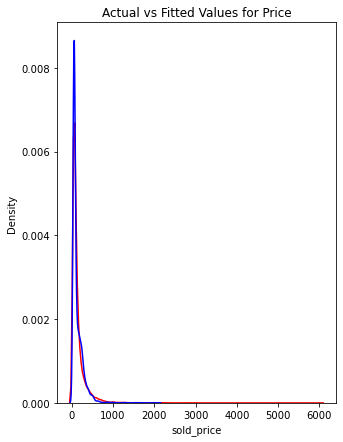

In [38]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')


plt.show()
plt.close()

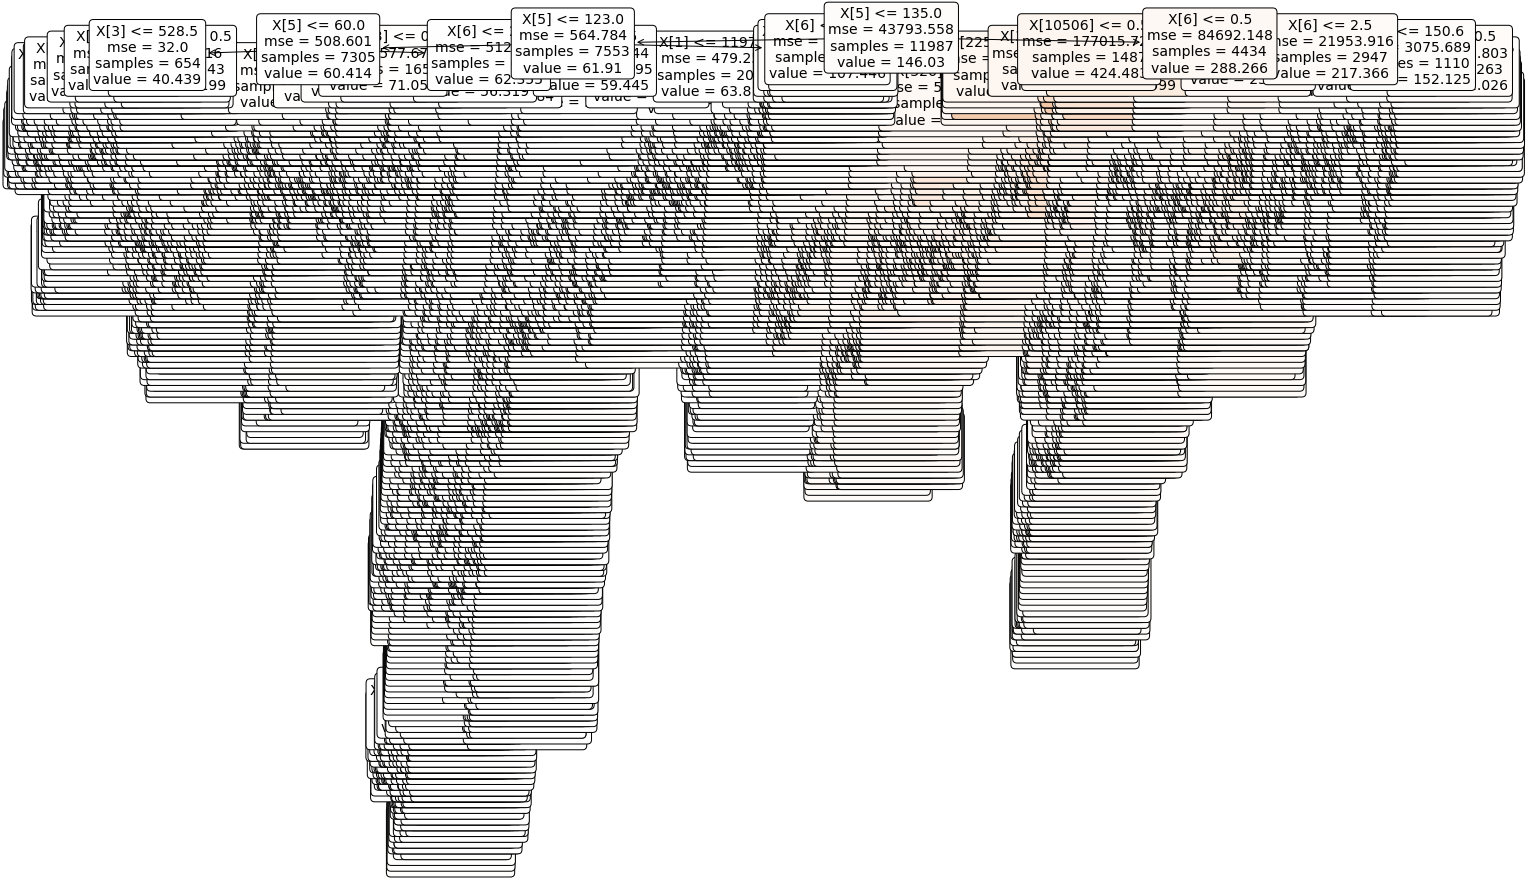

In [39]:

# Pull out one tree from the forest
Tree = regressor.estimators_[5]
# Export the image to a dot file
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(Tree,filled=True, 
              rounded=True, 
              fontsize=14);

In [45]:
categoricals_features = df.select_dtypes(object)
categoricals_features = categoricals_features.drop(columns = ['description', 'sub_title', 'condition', 'brand_a', 'brand_b', 'color', 'genda'])
## 

# get dummies pandas
categoricals_features=pd.get_dummies(categoricals_features, drop_first=True)

In [46]:
categoricals_features

category_2_Drkhdw Top  category_2_Footwear  \
0                         0                    0   
1                         0                    0   
2                         0                    0   
3                         0                    0   
4                         0                    0   
...                     ...                  ...   
5497                      0                    1   
5498                      0                    1   
5499                      0                    1   
5500                      0                    1   
5501                      0                    1   

      category_2_Le Grande Bleu (L.G.B.) Top  category_2_Mill Bottom  \
0                                          0                       0   
1                                          0                       0   
2                                          0                       0   
3                                          0                       0   
4                                          0                       0   
...                                      ...                     ...   
5497                                       0                       0   
5498                                       0                       0   
5499                                       0                       0   
5500                                       0                       0   
5501                                       0                       0   

      category_2_Number (N)ine Bottom  category_2_Number (N)ine Footwear  \
0                                   0                                  0   
1                                   0                                  0   
2                                   0                                  0   
3                                   0                                  0   
4                                   0                                  0   
...                               ...                                ...   
5497                                0                                  0   
5498                                0                                  0   
5499                                0                                  0   
5500                                0                                  0   
5501                                0                                  0   

      category_2_Number (N)ine Top  category_2_Prorum Bottom  \
0                                0                         0   
1                                0                         0   
2                                0                         0   
3                                0                         0   
4                                0                         0   
...                            ...                       ...   
5497                             0                         0   
5498                             0                         0   
5499                             0                         0   
5500                             0                         0   
5501                             0                         0   

      category_2_Prorum Top  category_2_Shirt Top  category_2_Top  \
0                         0                     0               1   
1                         0                     0               1   
2                         0                     0               1   
3                         0                     0               1   
4                         0                     0               1   
...                     ...                   ...             ...   
5497                      0                     0               0   
5498                      0                     0               0   
5499                      0                     0               0   
5500                      0                     0               0   
5501                      0                     0               0   

     

In [47]:
from sklearn.preprocessing import StandardScaler

numericals_features =df._get_numeric_data()
#numericals_features_scaled=StandardScaler().fit_transform(numericals_features)
#numericals_features_scaled = pd.DataFrame(numericals_features_scaled, index= numericals_features.index, columns= numericals_features.columns)


In [48]:
numericals_features.corr()

sold_price  score  transaction  image_count  \
sold_price           1.000000    NaN    -0.049252     0.181378   
score                     NaN    NaN          NaN          NaN   
transaction         -0.049252    NaN     1.000000     0.014201   
image_count          0.181378    NaN     0.014201     1.000000   
feedback_count      -0.022350    NaN     0.980257     0.023232   
condition_encoded   -0.184462    NaN     0.002580     0.113399   
product_class        0.425066    NaN    -0.052133     0.141664   
brand_value         -0.408932    NaN     0.062990    -0.094024   

                   feedback_count  condition_encoded  product_class  \
sold_price              -0.022350          -0.184462       0.425066   
score                         NaN                NaN            NaN   
transaction              0.980257           0.002580      -0.052133   
image_count              0.023232           0.113399       0.141664   
feedback_count           1.000000          -0.020284      -0.024675   
condition_encoded       -0.020284           1.000000      -0.134000   
product_class           -0.024675          -0.134000       1.000000   
brand_value              0.033111           0.129003      -0.361179   

                   brand_value  
sold_price           -0.408932  
score                      NaN  
transaction           0.062990  
image_count          -0.094024  
feedback_count        0.033111  
condition_encoded     0.129003  
product_class        -0.361179  
brand_value           1.000000

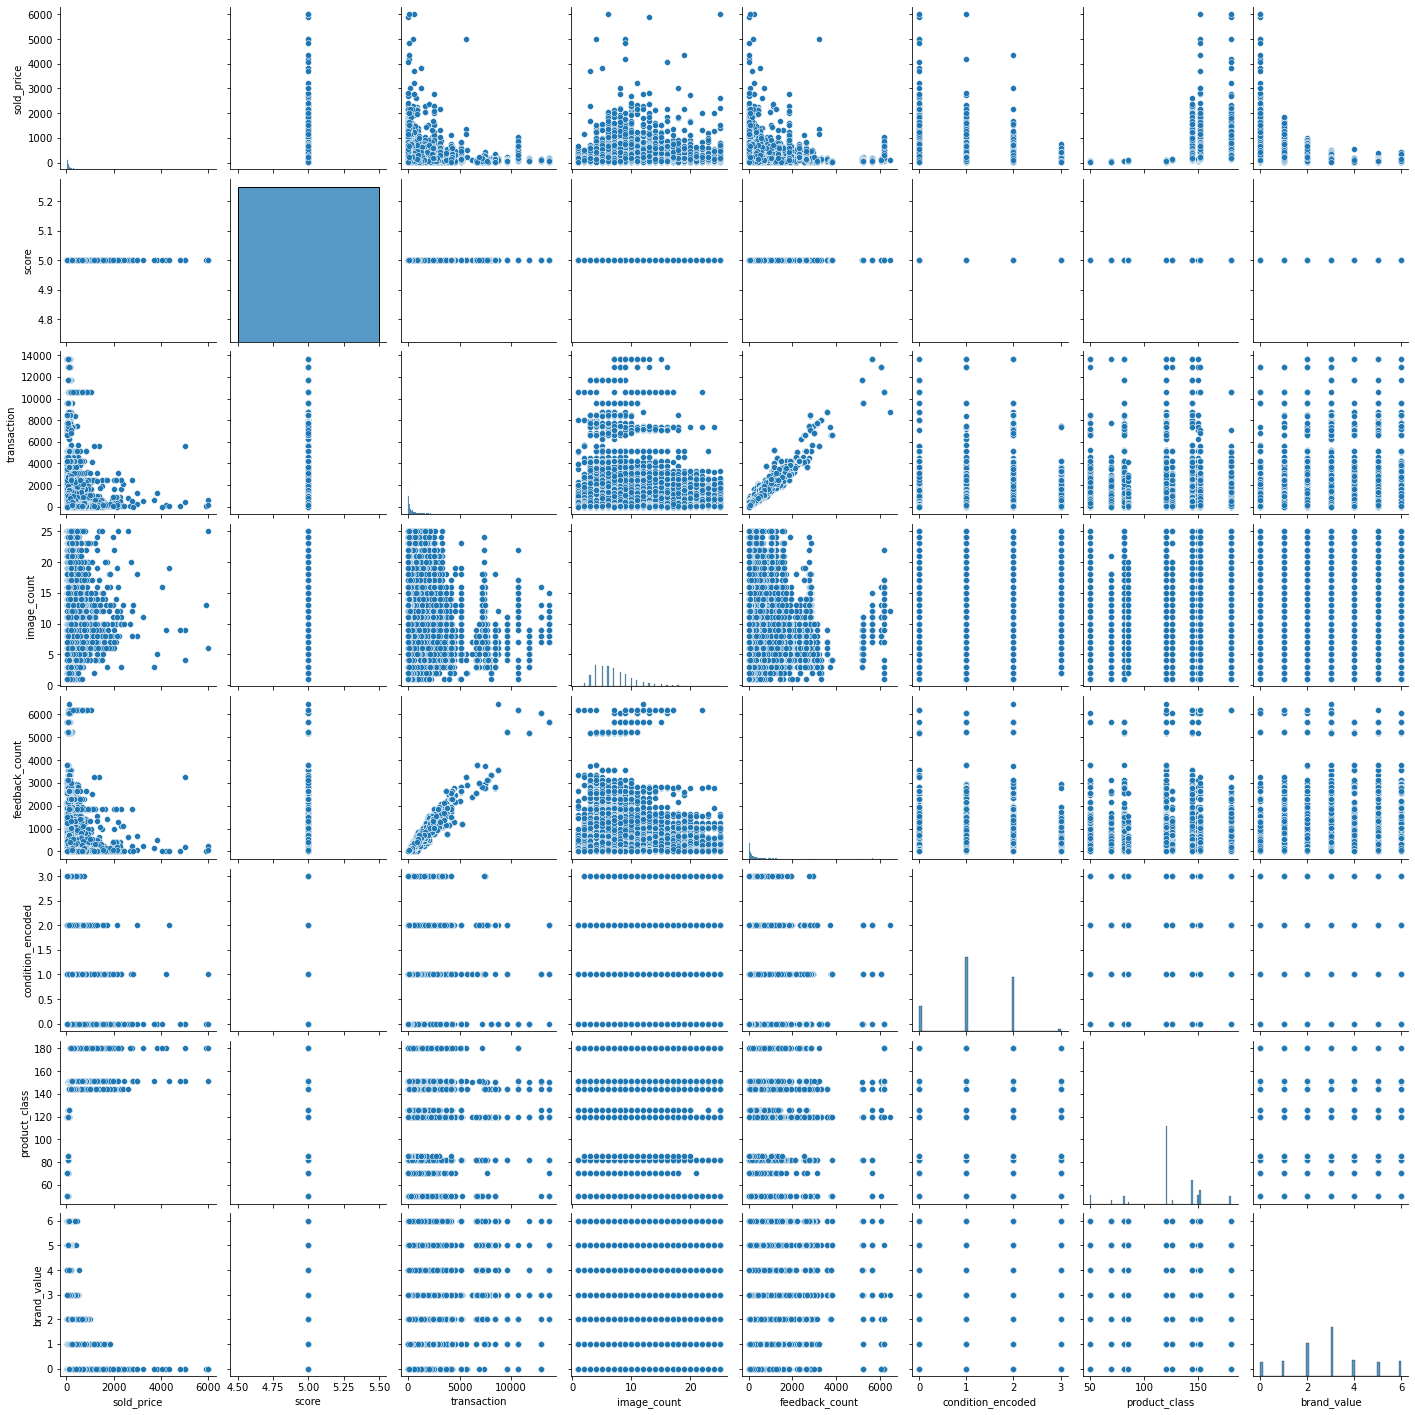

In [49]:
sns.pairplot(df)
plt.show()

In [50]:
all_features=pd.concat([numericals_features, categoricals_features], axis=1) # concat numerical and categorical transformations
all_features
all_features.corr()

sold_price  score  \
sold_price                                          1.000000    NaN   
score                                                    NaN    NaN   
transaction                                        -0.049252    NaN   
image_count                                         0.181378    NaN   
feedback_count                                     -0.022350    NaN   
condition_encoded                                  -0.184462    NaN   
product_class                                       0.425066    NaN   
brand_value                                        -0.408932    NaN   
category_2_Drkhdw Top                               0.001973    NaN   
category_2_Footwear                                 0.276230    NaN   
category_2_Le Grande Bleu (L.G.B.) Top             -0.000304    NaN   
category_2_Mill Bottom                             -0.002694    NaN   
category_2_Number (N)ine Bottom                     0.011583    NaN   
category_2_Number (N)ine Footwear                   0.004289    NaN   
category_2_Number (N)ine Top                        0.012547    NaN   
category_2_Prorum Bottom                           -0.001822    NaN   
category_2_Prorum Top                              -0.004476    NaN   
category_2_Shirt Top                               -0.003532    NaN   
category_2_Top                                     -0.211361    NaN   
category_3_Bodyuit                                  0.001584    NaN   
category_3_Boot                                     0.196964    NaN   
category_3_ButtoUp                                 -0.015276    NaN   
category_3_Caual  Shoe                              0.033109    NaN   
category_3_Caual Pant                              -0.011467    NaN   
category_3_Crop Top                                -0.002002    NaN   
category_3_Cropped Pant                             0.007556    NaN   
category_3_Denim                                    0.030182    NaN   
category_3_Drkhdw Sweathirt Hoodie                  0.001973    NaN   
category_3_Flat                                     0.008192    NaN   
category_3_Formal Shoe                              0.040613    NaN   
category_3_Heel                                     0.034387    NaN   
category_3_Hi Top Sneaker                           0.110131    NaN   
category_3_Hoodie                                  -0.007484    NaN   
category_3_Jean                                    -0.009405    NaN   
category_3_Jerey                                   -0.064422    NaN   
category_3_Jogger                                  -0.004018    NaN   
category_3_Jumpuit                                  0.000869    NaN   
category_3_Le Grande Bleu (L.G.B.) Long Sleeve T   -0.000304    NaN   
category_3_Legging                                 -0.003425    NaN   
category_3_Long Sleeve T                           -0.039025    NaN   
category_3_Low Top Sneaker                          0.166641    NaN   
category_3_Maxi rt                                  0.010639    NaN   
category_3_Midi rt                                  0.000299    NaN   
category_3_Mill Short                              -0.002694    NaN   
category_3_Mini rt                                 -0.004816    NaN   
category_3_Mule                                     0.012353    NaN   
category_3_Number (N)ine Boot                       0.006612    NaN   
category_3_Number (N)ine ButtoUp                   -0.001092    NaN   
category_3_Number (N)ine Caual  Shoe                0.000539    NaN   
category_3_Number (N)ine Caual Pant                 0.003945    NaN   
category_3_Number (N)ine Cropped Pant              -0.000164    NaN   
category_3_Number (N)ine Denim                      0.010165    NaN   
category_3_Number (N)ine Hi Top Sneaker            -0.001007    NaN   
category_3_Number (N)ine Long Sleeve T             -0.003988    NaN   
category_3_Number (N)ine Low Top Sneaker           -0.001027    NaN   
category_3_Number (N)ine Short                      0.005155    NaN   
cat

In [51]:
X = all_features.drop(columns=['sold_price'], axis = 1)
y= all_features.sold_price

In [53]:
X

score  transaction  image_count  feedback_count  condition_encoded  \
0       5.0       2240.0            7           798.0                  0   
1       5.0        148.0            3            80.0                  1   
2       5.0         12.0           10             1.0                  2   
3       5.0        106.0            5            40.0                  1   
4       5.0        381.0           10           134.0                  1   
...     ...          ...          ...             ...                ...   
5497    5.0        213.0            6           109.0                  1   
5498    5.0         49.0            5            25.0                  1   
5499    5.0         79.0            4            41.0                  1   
5500    5.0          7.0            7             4.0                  0   
5501    5.0        150.0            6            70.0                  1   

      product_class  brand_value  category_2_Drkhdw Top  category_2_Footwear  \
0             120.0            3                      0                    0   
1             120.0            3                      0                    0   
2             120.0            3                      0                    0   
3             120.0            3                      0                    0   
4             120.0            3                      0                    0   
...             ...          ...                    ...                  ...   
5497           70.0            3                      0                    1   
5498           70.0            3                      0                    1   
5499          126.0            3                      0                    1   
5500           70.0            3                      0                    1   
5501          151.2            2                      0                    1   

      category_2_Le Grande Bleu (L.G.B.) Top  category_2_Mill Bottom  \
0                                          0                       0   
1                                          0                       0   
2                                          0                       0   
3                                          0                       0   
4                                          0                       0   
...                                      ...                     ...   
5497                                       0                       0   
5498                                       0                       0   
5499                                       0                       0   
5500                                       0                       0   
5501                                       0                       0   

      category_2_Number (N)ine Bottom  category_2_Number (N)ine Footwear  \
0                                   0                                  0   
1                                   0                                  0   
2                                   0                                  0   
3                                   0                                  0   
4                                   0                                  0   
...                               ...                                ...   
5497                                0                                  0   
5498                                0                                  0   
5499                                0                                  0   
5500                                0                                  0   
5501                                0                                  0   

      category_2_Number (N)ine Top  category_2_Prorum Bottom  \
0                                0                         0   
1                                0                         0   
2                                0                         0   
3                                0                         0   
4                                0

In [54]:
y

0        51.0
1       114.0
2        90.0
3        69.0
4        50.0
        ...  
5497     70.0
5498     44.0
5499    125.0
5500     40.0
5501    234.0
Name: sold_price, Length: 39613, dtype: float64

In [55]:
from scipy import stats
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle


In [56]:
def model_performance(y_train, y_pred_train, y_test, y_pred_test):

    ME_train = np.mean(y_train-y_pred_train)
    ME_test  = np.mean(y_test-y_pred_test)

    MAE_train = mean_absolute_error(y_train,y_pred_train)
    MAE_test  = mean_absolute_error(y_test,y_pred_test)

    MSE_train = mean_squared_error(y_train,y_pred_train)
    MSE_test  = mean_squared_error(y_test,y_pred_test)

    RMSE_train = np.sqrt(MSE_train)
    RMSE_test  = np.sqrt(MSE_test)

    MAPE_train = np.mean((np.abs(y_train-y_pred_train) / y_train)* 100.)
    MAPE_test  = np.mean((np.abs(y_test-y_pred_test) / y_test)* 100.)

    R2_train = r2_score(y_train,y_pred_train)
    R2_test  = r2_score(y_test,y_pred_test)

    performance = pd.DataFrame({'Error_metric': ['Mean error','Mean absolute error','Mean squared error',
                                             'Root mean squared error','Mean absolute percentual error',
                                             'R2'],
                            'Train': [ME_train, MAE_train, MSE_train, RMSE_train, MAPE_train, R2_train],
                            'Test' : [ME_test, MAE_test , MSE_test, RMSE_test, MAPE_test, R2_test]})

    pd.options.display.float_format = '{:.2f}'.format

    df_train = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train})
    df_test  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test})

    return performance, df_train, df_test

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# training datasets to DataFrame again to manipulate them
X_train = pd.DataFrame(X_train, columns= X.columns)
X_test = pd.DataFrame(X_test, columns= X.columns)

In [58]:
#model = linear, ridge, lasso, knn
def regression_gen(regression, num, X_train, X_test, y_train, y_test):
    if regression == 'linear':
        model = LinearRegression()
    elif regression == 'ridge':
        model = Ridge(alpha= num)
    elif regression == 'lasso':
        model = linear_model.Lasso(alpha= num)
    elif regression == 'knn':
        model = KNeighborsRegressor(n_neighbors= num)
        
    trans = PowerTransformer()
    trans.fit(X_train)

    X_train = trans.transform(X_train)
    X_test  = trans.transform(X_test)

    X_train = pd.DataFrame(X_train, columns = X.columns)
    X_test  = pd.DataFrame(X_test,  columns = X.columns)

# model
    model.fit(X_train, y_train)

    y_pred_train_model = model.predict(X_train)
    y_pred_test_model  = model.predict(X_test)
    performance_lm, _, _ = model_performance(y_train, y_pred_train_model, y_test, y_pred_test_model)
    return performance_lm


In [59]:
regression_gen('knn', 9, X_train, X_test, y_train, y_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Error_metric    Train     Test
0                      Mean error     2.93     6.24
1             Mean absolute error    44.95    51.67
2              Mean squared error 15926.73 18933.19
3         Root mean squared error   126.20   137.60
4  Mean absolute percentual error    32.53    36.60
5                              R2     0.50     0.41

In [60]:
full = pd.DataFrame()
for k in range(1,21):
    b = regression_gen('knn',k, X_train, X_test, y_train, y_test)
    b["k"]= [k]*6
    full = pd.concat([full,b], axis=0)
    
full

/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning:

Error_metric    Train     Test   k
0                      Mean error     0.09     3.69   1
1             Mean absolute error     0.65    58.23   1
2              Mean squared error    88.60 26610.01   1
3         Root mean squared error     9.41   163.13   1
4  Mean absolute percentual error     0.55    40.25   1
5                              R2     1.00     0.17   1
0                      Mean error     0.71     3.72   2
1             Mean absolute error    29.60    53.78   2
2              Mean squared error  7753.52 20290.56   2
3         Root mean squared error    88.05   142.44   2
4  Mean absolute percentual error    20.70    37.23   2
5                              R2     0.76     0.37   2
0                      Mean error     1.12     4.23   3
1             Mean absolute error    36.34    52.69   3
2              Mean squared error 10954.45 19696.03   3
3         Root mean squared error   104.66   140.34   3
4  Mean absolute percentual error    25.55    36.46   3
5                              R2     0.66     0.39   3
0                      Mean error     1.55     4.53   4
1             Mean absolute error    39.58    52.45   4
2              Mean squared error 12767.93 19420.35   4
3         Root mean squared error   113.00   139.36   4
4  Mean absolute percentual error    27.97    36.44   4
5                              R2     0.60     0.40   4
0                      Mean error     1.91     5.26   5
1             Mean absolute error    41.49    52.10   5
2              Mean squared error 13777.03 19021.09   5
3         Root mean squared error   117.38   137.92   5
4  Mean absolute percentual error    29.47    36.35   5
5                              R2     0.57     0.41   5
0                      Mean error     2.19     5.47   6
1             Mean absolute error    42.72    51.96   6
2              Mean squared error 14527.63 19054.46   6
3         Root mean squared error   120.53   138.04   6
4  Mean absolute percentual error    30.42    36.20   6
5                              R2     0.54     0.41   6
0                      Mean error     2.40     5.71   7
1             Mean absolute error    43.64    52.02   7
2              Mean squared error 15128.87 19069.40   7
3         Root mean squared error   123.00   138.09   7
4  Mean absolute percentual error    31.26    36.41   7
5                              R2     0.52     0.41   7
0                      Mean error     2.64     5.98   8
1             Mean absolute error    44.37    51.95   8
2              Mean squared error 15618.28 19086.98   8
3         Root mean squared error   124.97   138.16   8
4  Mean absolute percentual error    31.97    36.53   8
5                              R2     0.51     0.41   8
0                      Mean error     2.93     6.24   9
1             Mean absolute error    44.95    51.67   9
2              Mean squared error 15926.73 18933.19   9
3         Root mean squared error   126.20   137.60   9
4  Mean absolute percentual error    32.53    36.60   9
5                              R2     0.50     0.41   9
0                      Mean error     3.01     6.29  10
1             Mean absolute error    45.48    51.64  10
2              Mean squared error 16221.46 18859.55  10
3         Root mean squared error   127.36   137.33  10
4  Mean absolute percentual error    33.08    36.79  10
5                              R2     0.49     0.41  10
0                      Mean error     3.24     6.33  11
1             Mean absolute error    45.84    51.67  11
2              Mean squared error 16376.48 18909.92  11
3         Root mean squared error   127.97   137.51  11
4  Mean absolute percentual error    33.47    36.96  11
5                              R2     0.49     0.41  11
0                      Mean error     3.52     6.23  12
1             Mean absolute error    46.26    51.81  12
2              Mean squared error 16629.70 18989.12  12
3         Root mean squared error   128.96   137.80  12
4  Mean absolute percentual error    33.90   

In [61]:
full[full['Error_metric'] == 'R2']

Error_metric  Train  Test   k
5           R2   1.00  0.17   1
5           R2   0.76  0.37   2
5           R2   0.66  0.39   3
5           R2   0.60  0.40   4
5           R2   0.57  0.41   5
5           R2   0.54  0.41   6
5           R2   0.52  0.41   7
5           R2   0.51  0.41   8
5           R2   0.50  0.41   9
5           R2   0.49  0.41  10
5           R2   0.49  0.41  11
5           R2   0.48  0.41  12
5           R2   0.47  0.41  13
5           R2   0.47  0.41  14
5           R2   0.46  0.41  15
5           R2   0.46  0.41  16
5           R2   0.45  0.41  17
5           R2   0.45  0.41  18
5           R2   0.45  0.41  19
5           R2   0.44  0.41  20

In [62]:
full2 = full.melt(id_vars=['k','Error_metric'])

In [63]:
IPython_default = plt.rcParams.copy()
from matplotlib import cycler
plt.rcParams.update({'text.color' : "white",
                     'axes.labelcolor' : "white",
                     'xtick.color' : 'white',
                     'ytick.color' : 'white'
                    })

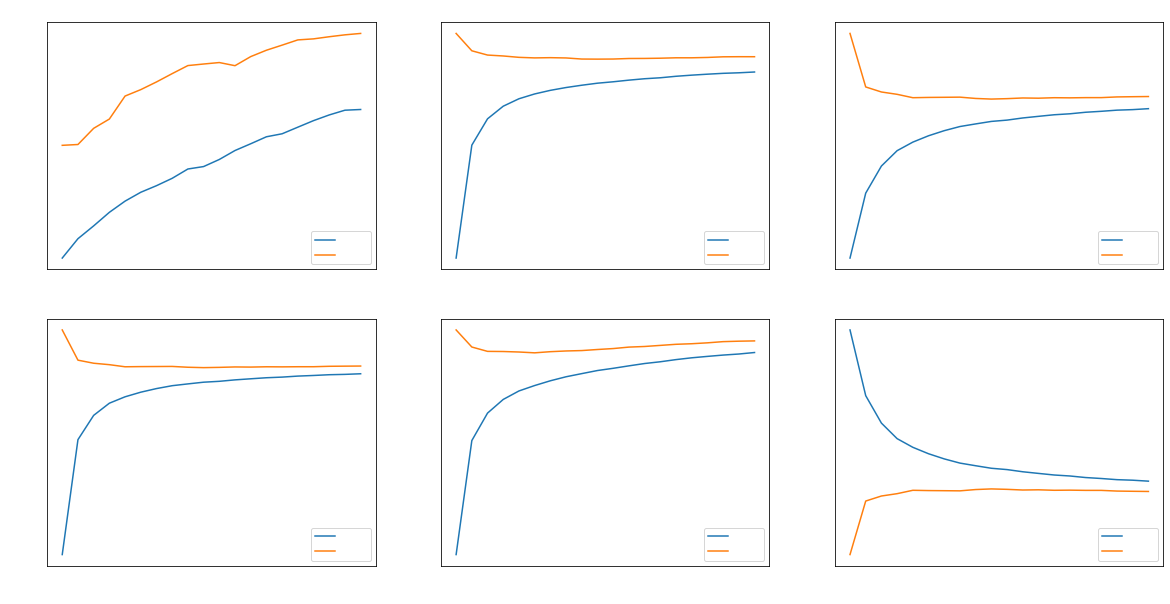

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#metrics = ['Mean error',]'Mean absolute error',...]

fig, ax = plt.subplots(2,3, figsize=(20,10))
sns.lineplot(x = 'k', y = 'value', data = full2[full2['Error_metric'] == 'Mean error'], hue = 'variable', ax = ax[0,0])
ax[0,0].set_xticks(range(2,21))
ax[0,0].set_title("Mean error")
ax[0,0].legend(loc='lower right')
sns.lineplot(x = 'k', y = 'value', data = full2[full2['Error_metric'] == 'Mean absolute error'], hue = 'variable', ax = ax[0,1])
ax[0,1].set_xticks(range(2,21))
ax[0,1].set_title("Mean absolute error")
ax[0,1].legend(loc='lower right')
sns.lineplot(x = 'k', y = 'value', data = full2[full2['Error_metric'] == 'Mean squared error'], hue = 'variable', ax = ax[0,2])
ax[0,2].set_xticks(range(2,21))
ax[0,2].set_title("Mean squared error")
ax[0,2].legend(loc='lower right')
sns.lineplot(x = 'k', y = 'value', data = full2[full2['Error_metric'] == 'Root mean squared error'], hue = 'variable', ax = ax[1,0])
ax[1,0].set_xticks(range(2,21))
ax[1,0].set_title("Root mean squared error")
ax[1,0].legend(loc='lower right')
sns.lineplot(x = 'k', y = 'value', data = full2[full2['Error_metric'] == 'Mean absolute percentual error'], hue = 'variable', ax = ax[1,1])
ax[1,1].set_xticks(range(2,21))
ax[1,1].set_title("Mean absolute percentual error")
ax[1,1].legend(loc='lower right')
sns.lineplot(x = 'k', y = 'value', data = full2[full2['Error_metric'] == 'R2'], hue = 'variable', ax = ax[1,2])
ax[1,2].set_xticks(range(2,21))
ax[1,2].set_title("R2")
ax[1,2].legend(loc='lower right')

In [65]:
regression_gen('lasso', 0.1, X_train, X_test, y_train, y_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Error_metric    Train     Test
0                      Mean error    -0.00     1.58
1             Mean absolute error    65.20    66.07
2              Mean squared error 20881.15 20663.25
3         Root mean squared error   144.50   143.75
4  Mean absolute percentual error    65.08    63.97
5                              R2     0.34     0.36

In [66]:
full = pd.DataFrame()
for k in range(0,21):
    b = regression_gen('lasso',k, X_train, X_test, y_train, y_test)
    b["k"]= [k]*6
    full = pd.concat([full,b], axis=0)
    
full

/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
<ipython-input-58-63411d92a4ae>:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(X_train, y_train)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 289479309.5749066, tolerance: 88220.83635598831
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning:

Error_metric    Train     Test   k
0                      Mean error    -0.00     1.57   0
1             Mean absolute error    65.27    66.18   0
2              Mean squared error 20879.17 20671.90   0
3         Root mean squared error   144.50   143.78   0
4  Mean absolute percentual error    65.19    64.10   0
5                              R2     0.34     0.36   0
0                      Mean error    -0.00     1.56   1
1             Mean absolute error    64.82    65.61   1
2              Mean squared error 20951.98 20678.35   1
3         Root mean squared error   144.75   143.80   1
4  Mean absolute percentual error    64.48    63.43   1
5                              R2     0.34     0.36   1
0                      Mean error     0.00     1.53   2
1             Mean absolute error    64.52    65.33   2
2              Mean squared error 21029.89 20730.30   2
3         Root mean squared error   145.02   143.98   2
4  Mean absolute percentual error    64.08    63.10   2
5                              R2     0.34     0.36   2
0                      Mean error    -0.00     1.51   3
1             Mean absolute error    64.30    65.16   3
2              Mean squared error 21101.19 20789.09   3
3         Root mean squared error   145.26   144.18   3
4  Mean absolute percentual error    63.88    62.97   3
5                              R2     0.34     0.35   3
0                      Mean error    -0.00     1.47   4
1             Mean absolute error    64.07    64.98   4
2              Mean squared error 21165.94 20849.47   4
3         Root mean squared error   145.49   144.39   4
4  Mean absolute percentual error    63.63    62.77   4
5                              R2     0.33     0.35   4
0                      Mean error    -0.00     1.46   5
1             Mean absolute error    63.81    64.77   5
2              Mean squared error 21216.56 20905.58   5
3         Root mean squared error   145.66   144.59   5
4  Mean absolute percentual error    63.36    62.55   5
5                              R2     0.33     0.35   5
0                      Mean error    -0.00     1.45   6
1             Mean absolute error    63.58    64.60   6
2              Mean squared error 21270.71 20971.09   6
3         Root mean squared error   145.84   144.81   6
4  Mean absolute percentual error    63.14    62.39   6
5                              R2     0.33     0.35   6
0                      Mean error    -0.00     1.44   7
1             Mean absolute error    63.39    64.46   7
2              Mean squared error 21325.47 21044.81   7
3         Root mean squared error   146.03   145.07   7
4  Mean absolute percentual error    62.96    62.27   7
5                              R2     0.33     0.35   7
0                      Mean error    -0.00     1.44   8
1             Mean absolute error    63.22    64.35   8
2              Mean squared error 21388.65 21127.26   8
3         Root mean squared error   146.25   145.35   8
4  Mean absolute percentual error    62.84    62.20   8
5                              R2     0.33     0.34   8
0                      Mean error    -0.00     1.44   9
1             Mean absolute error    63.11    64.28   9
2              Mean squared error 21460.25 21218.46   9
3         Root mean squared error   146.49   145.67   9
4  Mean absolute percentual error    62.78    62.18   9
5                              R2     0.33     0.34   9
0                      Mean error    -0.00     1.44  10
1             Mean absolute error    63.02    64.24  10
2              Mean squared error 21540.28 21318.42  10
3         Root mean squared error   146.77   146.01  10
4  Mean absolute percentual error    62.77    62.22  10
5                              R2     0.32     0.34  10
0                      Mean error    -0.00     1.44  11
1             Mean absolute error    62.96    64.23  11
2              Mean squared error 21625.40 21423.52  11
3         Root mean squared error   147.06   146.37  11
4  Mean absolute percentual error    62.81   

In [67]:
full[full['Error_metric'] == 'R2']

Error_metric  Train  Test   k
5           R2   0.34  0.36   0
5           R2   0.34  0.36   1
5           R2   0.34  0.36   2
5           R2   0.34  0.35   3
5           R2   0.33  0.35   4
5           R2   0.33  0.35   5
5           R2   0.33  0.35   6
5           R2   0.33  0.35   7
5           R2   0.33  0.34   8
5           R2   0.33  0.34   9
5           R2   0.32  0.34  10
5           R2   0.32  0.33  11
5           R2   0.32  0.33  12
5           R2   0.31  0.33  13
5           R2   0.31  0.32  14
5           R2   0.31  0.32  15
5           R2   0.30  0.32  16
5           R2   0.30  0.31  17
5           R2   0.30  0.31  18
5           R2   0.29  0.30  19
5           R2   0.29  0.30  20

In [68]:
regression_gen('ridge', 10, X_train, X_test, y_train, y_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Error_metric    Train     Test
0                      Mean error    -0.00     1.57
1             Mean absolute error    65.26    66.17
2              Mean squared error 20879.17 20671.46
3         Root mean squared error   144.50   143.78
4  Mean absolute percentual error    65.18    64.09
5                              R2     0.34     0.36

In [69]:
full = pd.DataFrame()
for k in range(1,21):
    b = regression_gen('ridge',k, X_train, X_test, y_train, y_test)
    b["k"]= [k]*6
    full = pd.concat([full,b], axis=0)
    
full

/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning:

Error_metric    Train     Test   k
0                      Mean error    -0.00     1.56   1
1             Mean absolute error    65.27    66.17   1
2              Mean squared error 20878.97 20671.93   1
3         Root mean squared error   144.50   143.78   1
4  Mean absolute percentual error    65.19    64.10   1
5                              R2     0.34     0.36   1
0                      Mean error    -0.00     1.56   2
1             Mean absolute error    65.27    66.17   2
2              Mean squared error 20879.03 20671.68   2
3         Root mean squared error   144.50   143.78   2
4  Mean absolute percentual error    65.19    64.10   2
5                              R2     0.34     0.36   2
0                      Mean error    -0.00     1.56   3
1             Mean absolute error    65.27    66.17   3
2              Mean squared error 20879.07 20671.60   3
3         Root mean squared error   144.50   143.78   3
4  Mean absolute percentual error    65.19    64.10   3
5                              R2     0.34     0.36   3
0                      Mean error    -0.00     1.57   4
1             Mean absolute error    65.27    66.17   4
2              Mean squared error 20879.09 20671.56   4
3         Root mean squared error   144.50   143.78   4
4  Mean absolute percentual error    65.19    64.10   4
5                              R2     0.34     0.36   4
0                      Mean error    -0.00     1.57   5
1             Mean absolute error    65.27    66.17   5
2              Mean squared error 20879.11 20671.54   5
3         Root mean squared error   144.50   143.78   5
4  Mean absolute percentual error    65.19    64.10   5
5                              R2     0.34     0.36   5
0                      Mean error    -0.00     1.57   6
1             Mean absolute error    65.27    66.17   6
2              Mean squared error 20879.13 20671.53   6
3         Root mean squared error   144.50   143.78   6
4  Mean absolute percentual error    65.19    64.09   6
5                              R2     0.34     0.36   6
0                      Mean error     0.00     1.57   7
1             Mean absolute error    65.27    66.17   7
2              Mean squared error 20879.14 20671.51   7
3         Root mean squared error   144.50   143.78   7
4  Mean absolute percentual error    65.19    64.09   7
5                              R2     0.34     0.36   7
0                      Mean error     0.00     1.57   8
1             Mean absolute error    65.26    66.17   8
2              Mean squared error 20879.15 20671.50   8
3         Root mean squared error   144.50   143.78   8
4  Mean absolute percentual error    65.19    64.09   8
5                              R2     0.34     0.36   8
0                      Mean error    -0.00     1.57   9
1             Mean absolute error    65.26    66.17   9
2              Mean squared error 20879.16 20671.48   9
3         Root mean squared error   144.50   143.78   9
4  Mean absolute percentual error    65.18    64.09   9
5                              R2     0.34     0.36   9
0                      Mean error    -0.00     1.57  10
1             Mean absolute error    65.26    66.17  10
2              Mean squared error 20879.17 20671.46  10
3         Root mean squared error   144.50   143.78  10
4  Mean absolute percentual error    65.18    64.09  10
5                              R2     0.34     0.36  10
0                      Mean error     0.00     1.57  11
1             Mean absolute error    65.26    66.17  11
2              Mean squared error 20879.17 20671.45  11
3         Root mean squared error   144.50   143.78  11
4  Mean absolute percentual error    65.18    64.09  11
5                              R2     0.34     0.36  11
0                      Mean error    -0.00     1.57  12
1             Mean absolute error    65.26    66.17  12
2              Mean squared error 20879.18 20671.43  12
3         Root mean squared error   144.50   143.78  12
4  Mean absolute percentual error    65.18   

In [70]:
full[full['Error_metric'] == 'R2']

Error_metric  Train  Test   k
5           R2   0.34  0.36   1
5           R2   0.34  0.36   2
5           R2   0.34  0.36   3
5           R2   0.34  0.36   4
5           R2   0.34  0.36   5
5           R2   0.34  0.36   6
5           R2   0.34  0.36   7
5           R2   0.34  0.36   8
5           R2   0.34  0.36   9
5           R2   0.34  0.36  10
5           R2   0.34  0.36  11
5           R2   0.34  0.36  12
5           R2   0.34  0.36  13
5           R2   0.34  0.36  14
5           R2   0.34  0.36  15
5           R2   0.34  0.36  16
5           R2   0.34  0.36  17
5           R2   0.34  0.36  18
5           R2   0.34  0.36  19
5           R2   0.34  0.36  20

In [71]:
regression_gen('linear',np.nan, X_train, X_test, y_train, y_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Error_metric    Train                             Test
0                      Mean error    -0.08                 2454562463029.69
1             Mean absolute error    65.42                 2454562463094.47
2              Mean squared error 20883.60 24453852057013331866941390848.00
3         Root mean squared error   144.51               156377274746087.50
4  Mean absolute percentual error    65.32                 2007169464387.46
5                              R2     0.34     -759298998680670500290560.00

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

c = abs(all_features.corr())
#c

#fig, ax = plt.subplots(figsize=(14,14))
#sns.heatmap(c, annot=True);

#c['SalePrice']
c_last = c['sold_price'].sort_values(ascending=False)
#c_last
c_thr = .05
cols_to_keep = list(c_last[c_last > c_thr].index)[1:] + [list(c_last[c_last > c_thr].index)[0]]
print(cols_to_keep)

all_features[cols_to_keep]

['product_class', 'brand_value', 'category_2_Footwear', 'category_2_Top', 'category_3_Boot', 'condition_encoded', 'image_count', 'category_3_Low Top Sneaker', 'category_3_Short Sleeve T', 'category_3_Hi Top Sneaker', 'category_3_Jerey', 'size_xl', "size_Women's / US 7 / IT 37", 'sold_price']


product_class  brand_value  category_2_Footwear  category_2_Top  \
0            120.00            3                    0               1   
1            120.00            3                    0               1   
2            120.00            3                    0               1   
3            120.00            3                    0               1   
4            120.00            3                    0               1   
...             ...          ...                  ...             ...   
5497          70.00            3                    1               0   
5498          70.00            3                    1               0   
5499         126.00            3                    1               0   
5500          70.00            3                    1               0   
5501         151.20            2                    1               0   

      category_3_Boot  condition_encoded  image_count  \
0                   0                  0            7   
1                   0                  1            3   
2                   0                  2           10   
3                   0                  1            5   
4                   0                  1           10   
...               ...                ...          ...   
5497                0                  1            6   
5498                0                  1            5   
5499                0                  1            4   
5500                0                  0            7   
5501                1                  1            6   

      category_3_Low Top Sneaker  category_3_Short Sleeve T  \
0                              0                          1   
1                              0                          1   
2                              0                          0   
3                              0                          1   
4                              0                          0   
...                          ...                        ...   
5497                           0                          0   
5498                           0                          0   
5499                           1                          0   
5500                           0                          0   
5501                           0                          0   

      category_3_Hi Top Sneaker  category_3_Jerey  size_xl  \
0                             0                 0        0   
1                             0                 0        0   
2                             0                 0        0   
3                             0                 0        0   
4                             0                 0        1   
...                         ...               ...      ...   
5497                          0                 0        0   
5498                          0                 0        0   
5499                          0                 0        0   
5500                          1                 0        0   
5501                          0                 0        0   

      size_Women's / US 7 / IT 37  sold_price  
0                               0       51.00  
1                               0      114.00  
2                               0       90.00  
3                               0       69.00  
4                               0       50.00  
...                           ...         ...  
5497                            0       70.00  
5498                            0       44.00  
5499                            0      125.00  
5500                            0       40.00  
5501                            0      234.00  

[39613 rows x 14 columns]

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE


#X_train.isna().sum()
nulls = pd.DataFrame(X_train.isna().sum()).reset_index()
#nulls.head()
nulls.columns = ['Column','nas']
#nulls.head()
#nulls[nulls['nas'] > 0].head()
cols_to_drop = nulls[nulls['nas'] > 0]['Column'] # Too drastic, but made on pourpose for quick filtering (don't do this in production!!)

X_train.drop(columns=cols_to_drop, axis=1, inplace = True)
X_test.drop(columns=cols_to_drop, axis=1, inplace = True)

#display(X_train)
knn = KNeighborsRegressor()

lm = LinearRegression()

selector = RFE(knn, n_features_to_select= 8, step = 1, verbose = 1) # Step is how many features to add or drop everytime
selector.fit(X_train, y_train)

kept_features = selector.get_support(indices = True) #returns an array of integers corresponding to nonremoved features
kept_features = list(X_train.iloc[:,kept_features].columns)

X_train = selector.transform(X_train)
X_test  = selector.transform(X_test)

X_train = pd.DataFrame(X_train, columns=kept_features)
X_test  = pd.DataFrame(X_test, columns=kept_features)

print("Final selected features: ")
display(X_train)

Fitting estimator with 112 features.


ValueError: when `importance_getter=='auto'`, the underlying estimator KNeighborsRegressor should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.

In [ ]:
    if regression == 'linear':
        model = LinearRegression()
    elif regression == 'ridge':
        model = Ridge(alpha= num)
    elif regression == 'lasso':
        model = linear_model.Lasso(alpha= num)
    elif regression == 'knn':
        model = KNeighborsRegressor(n_neighbors= num)

In [ ]:
model=KNeighborsRegressor(n_neighbors= 9)    # model
model.fit(X_train.to_numpy(), y_train)   # model train

In [ ]:
y_pred=model.predict(X_test.to_numpy())   # model prediction


y_pred_train=model.predict(X_train.to_numpy())

In [ ]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(2,2,figsize=(10,10))
ax[0,0].plot(y_pred, y_test, 'o')
ax[0,0].set_xlabel("y_test")
ax[0,0].set_ylabel("y_pred")
ax[0,0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[0,1].hist(y_test - y_pred)
ax[0,1].set_xlabel("Test y-y_pred")
ax[0,1].set_title("Test Set Residual histogram")

ax[1,0].plot(y_pred_train, y_train, 'o')
ax[1,0].set_xlabel("y_train")
ax[1,0].set_ylabel("y_pred_train")
ax[1,0].set_title("Train set Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1,1].hist(y_train - y_pred_train)
ax[1,1].set_xlabel("Train y-y_pred")
ax[1,1].set_title("Train Residual histogram")

In [ ]:
train_mse=mse(y_train,model.predict(X_train.to_numpy()))
test_mse=mse(y_test,model.predict(X_test.to_numpy()))

print ('train MSE: {} -- test MSE: {}'.format(train_mse, test_mse))

In [ ]:
print ('train RMSE: {} -- test RMSE: {}'.format(train_mse**.5, test_mse**.5))

In [ ]:
train_mae=mae(y_train,model.predict(X_train.to_numpy()))
test_mae=mae(y_test,model.predict(X_test.to_numpy()))

print ('train MAE: {} -- test MAE: {}'.format(train_mse, test_mse))

In [ ]:
r2= model.score(X_test.to_numpy(), y_test)
print (r2)

print(r2_score(y_test,model.predict(X_test.to_numpy())))

In [ ]:
N=X_train.shape[0]
p=36
x = (1-r2)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

In [ ]:
X_train_const = sm.add_constant(X_train) # adding a constant

model = sm.OLS(y_train, X_train_const).fit()
predictions_train = model.predict(X_train_const) 

X_test_const = sm.add_constant(X_test) # adding a constant
predictions_test = model.predict(X_test_const) 
print_model = model.summary()
print(print_model)